### 출처 : [[과학] 월간 데이콘 2 천체 유형 분류](https://dacon.io/competitions/official/235573/overview/)

# 1. 필요한 모듈과 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 해결

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.options.display.max_columns = 30

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train.head()

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340
1,1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314
2,2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928
3,3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855
4,4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655


In [5]:
test.head()

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
0,199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,17.434384,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474
1,199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,20.030078,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372
2,199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,17.538164,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748
3,199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,20.277472,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909
4,199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,18.591749,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368


# 2. 데이터 탐색 및 전처리 

### 1. 데이터 shape와 column명, 자료형 살펴보기 

In [6]:
print("train 데이터 shape : ", train.shape)
print("test 데이터 shape : ", test.shape)

train 데이터 shape :  (199991, 23)
test 데이터 shape :  (10009, 22)


In [7]:
train.columns

Index(['id', 'type', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z'],
      dtype='object')

In [8]:
test.columns

Index(['id', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199991 entries, 0 to 199990
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          199991 non-null  int64  
 1   type        199991 non-null  object 
 2   fiberID     199991 non-null  int64  
 3   psfMag_u    199991 non-null  float64
 4   psfMag_g    199991 non-null  float64
 5   psfMag_r    199991 non-null  float64
 6   psfMag_i    199991 non-null  float64
 7   psfMag_z    199991 non-null  float64
 8   fiberMag_u  199991 non-null  float64
 9   fiberMag_g  199991 non-null  float64
 10  fiberMag_r  199991 non-null  float64
 11  fiberMag_i  199991 non-null  float64
 12  fiberMag_z  199991 non-null  float64
 13  petroMag_u  199991 non-null  float64
 14  petroMag_g  199991 non-null  float64
 15  petroMag_r  199991 non-null  float64
 16  petroMag_i  199991 non-null  float64
 17  petroMag_z  199991 non-null  float64
 18  modelMag_u  199991 non-null  float64
 19  mo

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10009 non-null  int64  
 1   fiberID     10009 non-null  int64  
 2   psfMag_u    10009 non-null  float64
 3   psfMag_g    10009 non-null  float64
 4   psfMag_r    10009 non-null  float64
 5   psfMag_i    10009 non-null  float64
 6   psfMag_z    10009 non-null  float64
 7   fiberMag_u  10009 non-null  float64
 8   fiberMag_g  10009 non-null  float64
 9   fiberMag_r  10009 non-null  float64
 10  fiberMag_i  10009 non-null  float64
 11  fiberMag_z  10009 non-null  float64
 12  petroMag_u  10009 non-null  float64
 13  petroMag_g  10009 non-null  float64
 14  petroMag_r  10009 non-null  float64
 15  petroMag_i  10009 non-null  float64
 16  petroMag_z  10009 non-null  float64
 17  modelMag_u  10009 non-null  float64
 18  modelMag_g  10009 non-null  float64
 19  modelMag_r  10009 non-nul

### 2. 데이터 결측치 확인

In [11]:
train.isnull().sum()[train.isnull().sum() > 0] # 결측치가 있는 컬럼만 출력

Series([], dtype: int64)

In [12]:
test.isnull().sum()[test.isnull().sum() > 0]

Series([], dtype: int64)

- 결측치 데이터는 없습니다.

### 3. 컬럼별 분석

In [13]:
train.describe()

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.00000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,99995.00000,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,57732.57318,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,0.00000,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,49997.50000,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,99995.00000,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,149992.50000,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,199990.00000,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


#### fiberID(관측에 사용된 광섬유의 구분자) 데이터 분석

In [14]:
len(train['fiberID'].unique())

1000

전체 데이터 수는 199991개지만, fiberID의 중복되지 않는 값의 개수는 1000개입니다.  type별로 fiberID 개수의 분포를 알아보겠습니다.

In [15]:
train.groupby('type').count()['fiberID']

type
GALAXY                 37347
QSO                    49680
REDDEN_STD             14618
ROSAT_D                 6580
SERENDIPITY_BLUE       21760
SERENDIPITY_DISTANT     4654
SERENDIPITY_FIRST       7132
SERENDIPITY_MANUAL        61
SERENDIPITY_RED         2562
SKY                      127
SPECTROPHOTO_STD       14630
STAR_BHB               13500
STAR_BROWN_DWARF         500
STAR_CARBON             3257
STAR_CATY_VAR           6506
STAR_PN                   13
STAR_RED_DWARF         13750
STAR_SUB_DWARF          1154
STAR_WHITE_DWARF        2160
Name: fiberID, dtype: int64

In [16]:
type_list =list(train.groupby('type').count()['fiberID'].sort_values(ascending=False).index)

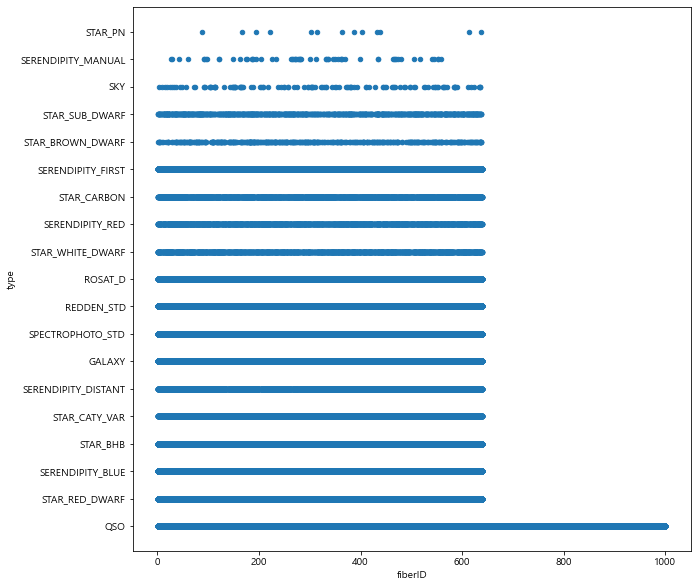

In [17]:
train.plot(y='type', x='fiberID', kind='scatter', figsize=(10, 10))

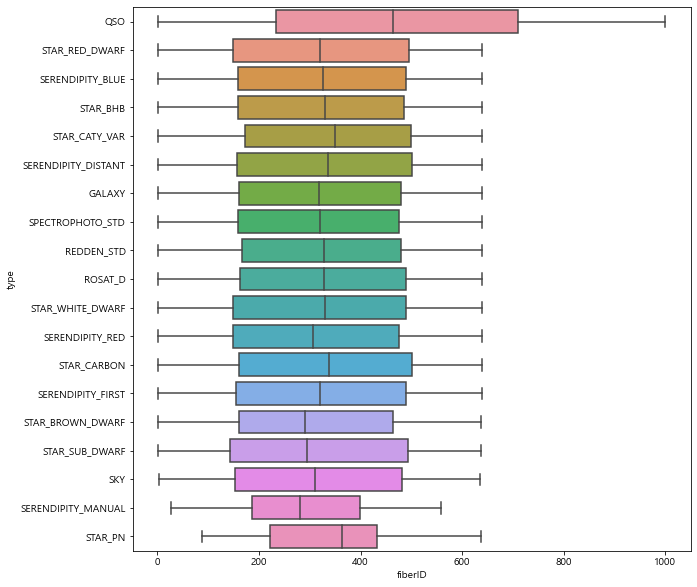

In [18]:
plt.figure(figsize=(10,10))
#plt.xticks(rotation=75)
sns.boxplot(data=train, y='type', x='fiberID')

1. fiberID가 특정 숫자 이상일 경우에는 type이 'QSO'만 있습니다.
2. type이 'STAR_PN'인 경우는 fiberID의 종류가 다른 type에 비해 한정되어 있습니다.
3. 그밖의 다른 type들은 fiberID 분포가 비슷합니다.

type이 'QSO'가 아닐 때 fiberID의 최댓값을 알아보겠습니다.

In [19]:
train.loc[train['type'] != 'QSO', 'fiberID'].max()

640

'fiberID'가 641 이상일 때 True임을 나타내는 컬럼을 만들어서 향후 학습에 쓸 피처에 넣으면 도움이 될 것 같습니다.
이를 위해 is_over_640 컬럼을 만들겠습니다.

In [20]:
train['is_over_640'] = (train['fiberID'] > 640)

train.loc[train['fiberID'] > 640, ['fiberID', 'is_over_640']].head()

,fiberID,is_over_640
1,788,True
3,864,True
6,696,True
30,709,True
37,991,True


In [21]:
test['is_over_640'] = (test['fiberID'] > 640)

test.loc[test['fiberID'] > 640, ['fiberID', 'is_over_640']].head()

,fiberID,is_over_640
13,724,True
30,837,True
35,702,True
37,864,True
38,858,True


#### psfMag(먼 천체를 한 점으로 가정하여 측정한 빛의 밝기) 컬럼

psfMag 컬럼은 하나만 있는 것이 아니라 psfMag_u, psfMag_g 등과 같이 여러 컬럼이 있습니다. 해당 컬럼들의 이름을 리스트 안에 저장합니다.

In [22]:
psfMag_cols = []

for col in train.columns:
    if 'psfMag' in col:
        psfMag_cols.append(col)
        
psfMag_cols

['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z']

해당 컬럼들의 데이터 분포를 살펴봅니다.

In [23]:
for col in psfMag_cols:
    print('{0} max : {1}, {2} min : {3}'.format(col, train[col].max(), col, train[col].min()))

psfMag_u max : 18773.9190703443, psfMag_u min : -5310801.77091916
psfMag_g max : 3538.98490973182, psfMag_g min : -40022.466071371
psfMag_r max : 3048.11091277562, psfMag_r min : -27184.7957925387
psfMag_i max : 4835.21863929729, psfMag_i min : -26566.310827471094
psfMag_z max : 9823.74040737359, psfMag_z min : -24878.828279868998


In [24]:
for col in psfMag_cols:
    print('{0} max : {1}, {2} min : {3}'.format(col, test[col].max(), col, test[col].min()))

psfMag_u max : 37.68114284435, psfMag_u min : -7.248194533431902
psfMag_g max : 182.65445200016498, psfMag_g min : -42.6638711196882
psfMag_r max : 31.8837675338703, psfMag_r min : 9.13471160351667
psfMag_i max : 47.2273912464937, psfMag_i min : -22.522266231687894
psfMag_z max : 34.9460571697073, psfMag_z min : 13.3498265550101


동일한 컬럼이지만 데이터가 train이냐 test냐에 따라 최댓값, 최솟값의 차이가 매우 큽니다. train 데이터의 outlier일 수 있습니다.  
test 데이터의 최솟값, 최댓값의 범위를 초과하는 train 데이터가 얼마나 있는지 살펴봅니다.

In [25]:
train.shape[0]

199991

In [26]:
for col in psfMag_cols:
    temp_df = train[(train[col] > test[col].max()) | (train[col] < test[col].min())]
    print("{0} 컬럼의 이상치 수 : {1}"\
          .format(col, temp_df.shape[0]))
    print("{0} 컬럼의 이상치의 최댓값 : {1:.3f}, 최솟값 : {2:.3f}".format(col, temp_df[col].max(), temp_df[col].min()))
    print('')

psfMag_u 컬럼의 이상치 수 : 65
psfMag_u 컬럼의 이상치의 최댓값 : 18773.919, 최솟값 : -5310801.771

psfMag_g 컬럼의 이상치 수 : 21
psfMag_g 컬럼의 이상치의 최댓값 : 3538.985, 최솟값 : -40022.466

psfMag_r 컬럼의 이상치 수 : 57
psfMag_r 컬럼의 이상치의 최댓값 : 3048.111, 최솟값 : -27184.796

psfMag_i 컬럼의 이상치 수 : 23
psfMag_i 컬럼의 이상치의 최댓값 : 4835.219, 최솟값 : -26566.311

psfMag_z 컬럼의 이상치 수 : 65
psfMag_z 컬럼의 이상치의 최댓값 : 9823.740, 최솟값 : -24878.828



전체 데이터 수는 199991이지만 이상치의 수는 컬럼 간에 중복되지 않는다고 가정해도 231개입니다. 이상치가 전체 데이터의 약 0.1%이므로 이상치 데이터들을 제거하겠습니다.

In [27]:
for col in psfMag_cols:
    train = train[(train[col] <= test[col].max()) & (train[col] >= test[col].min())]
    
train.shape[0]

199856

'type'별로 psfMag 컬럼들의 데이터 분포를 살펴봅니다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


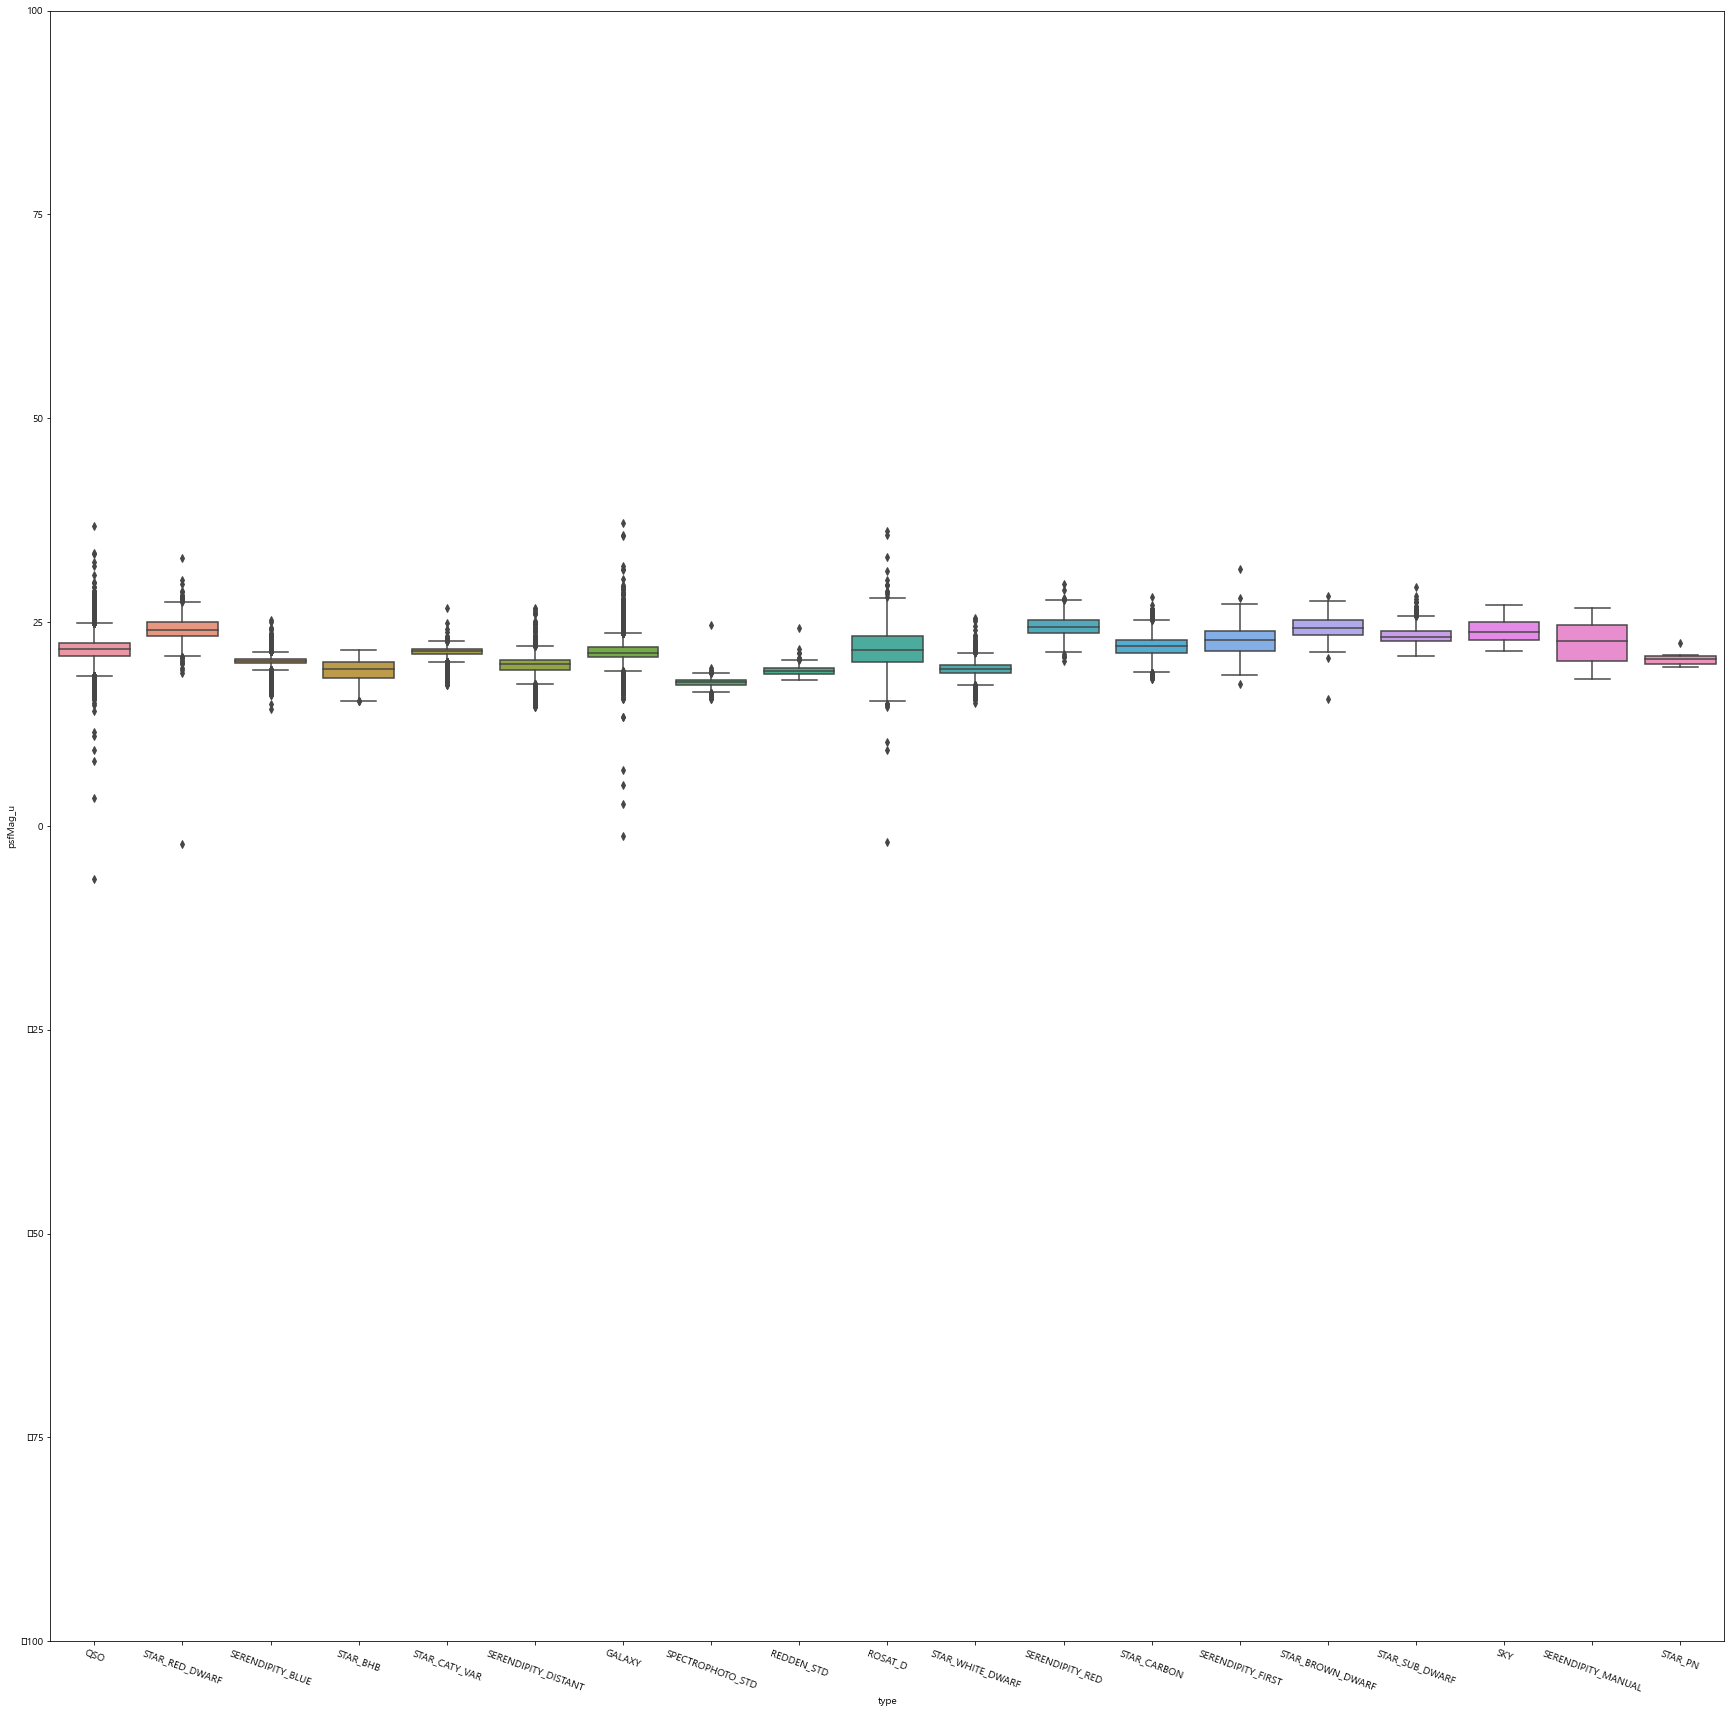

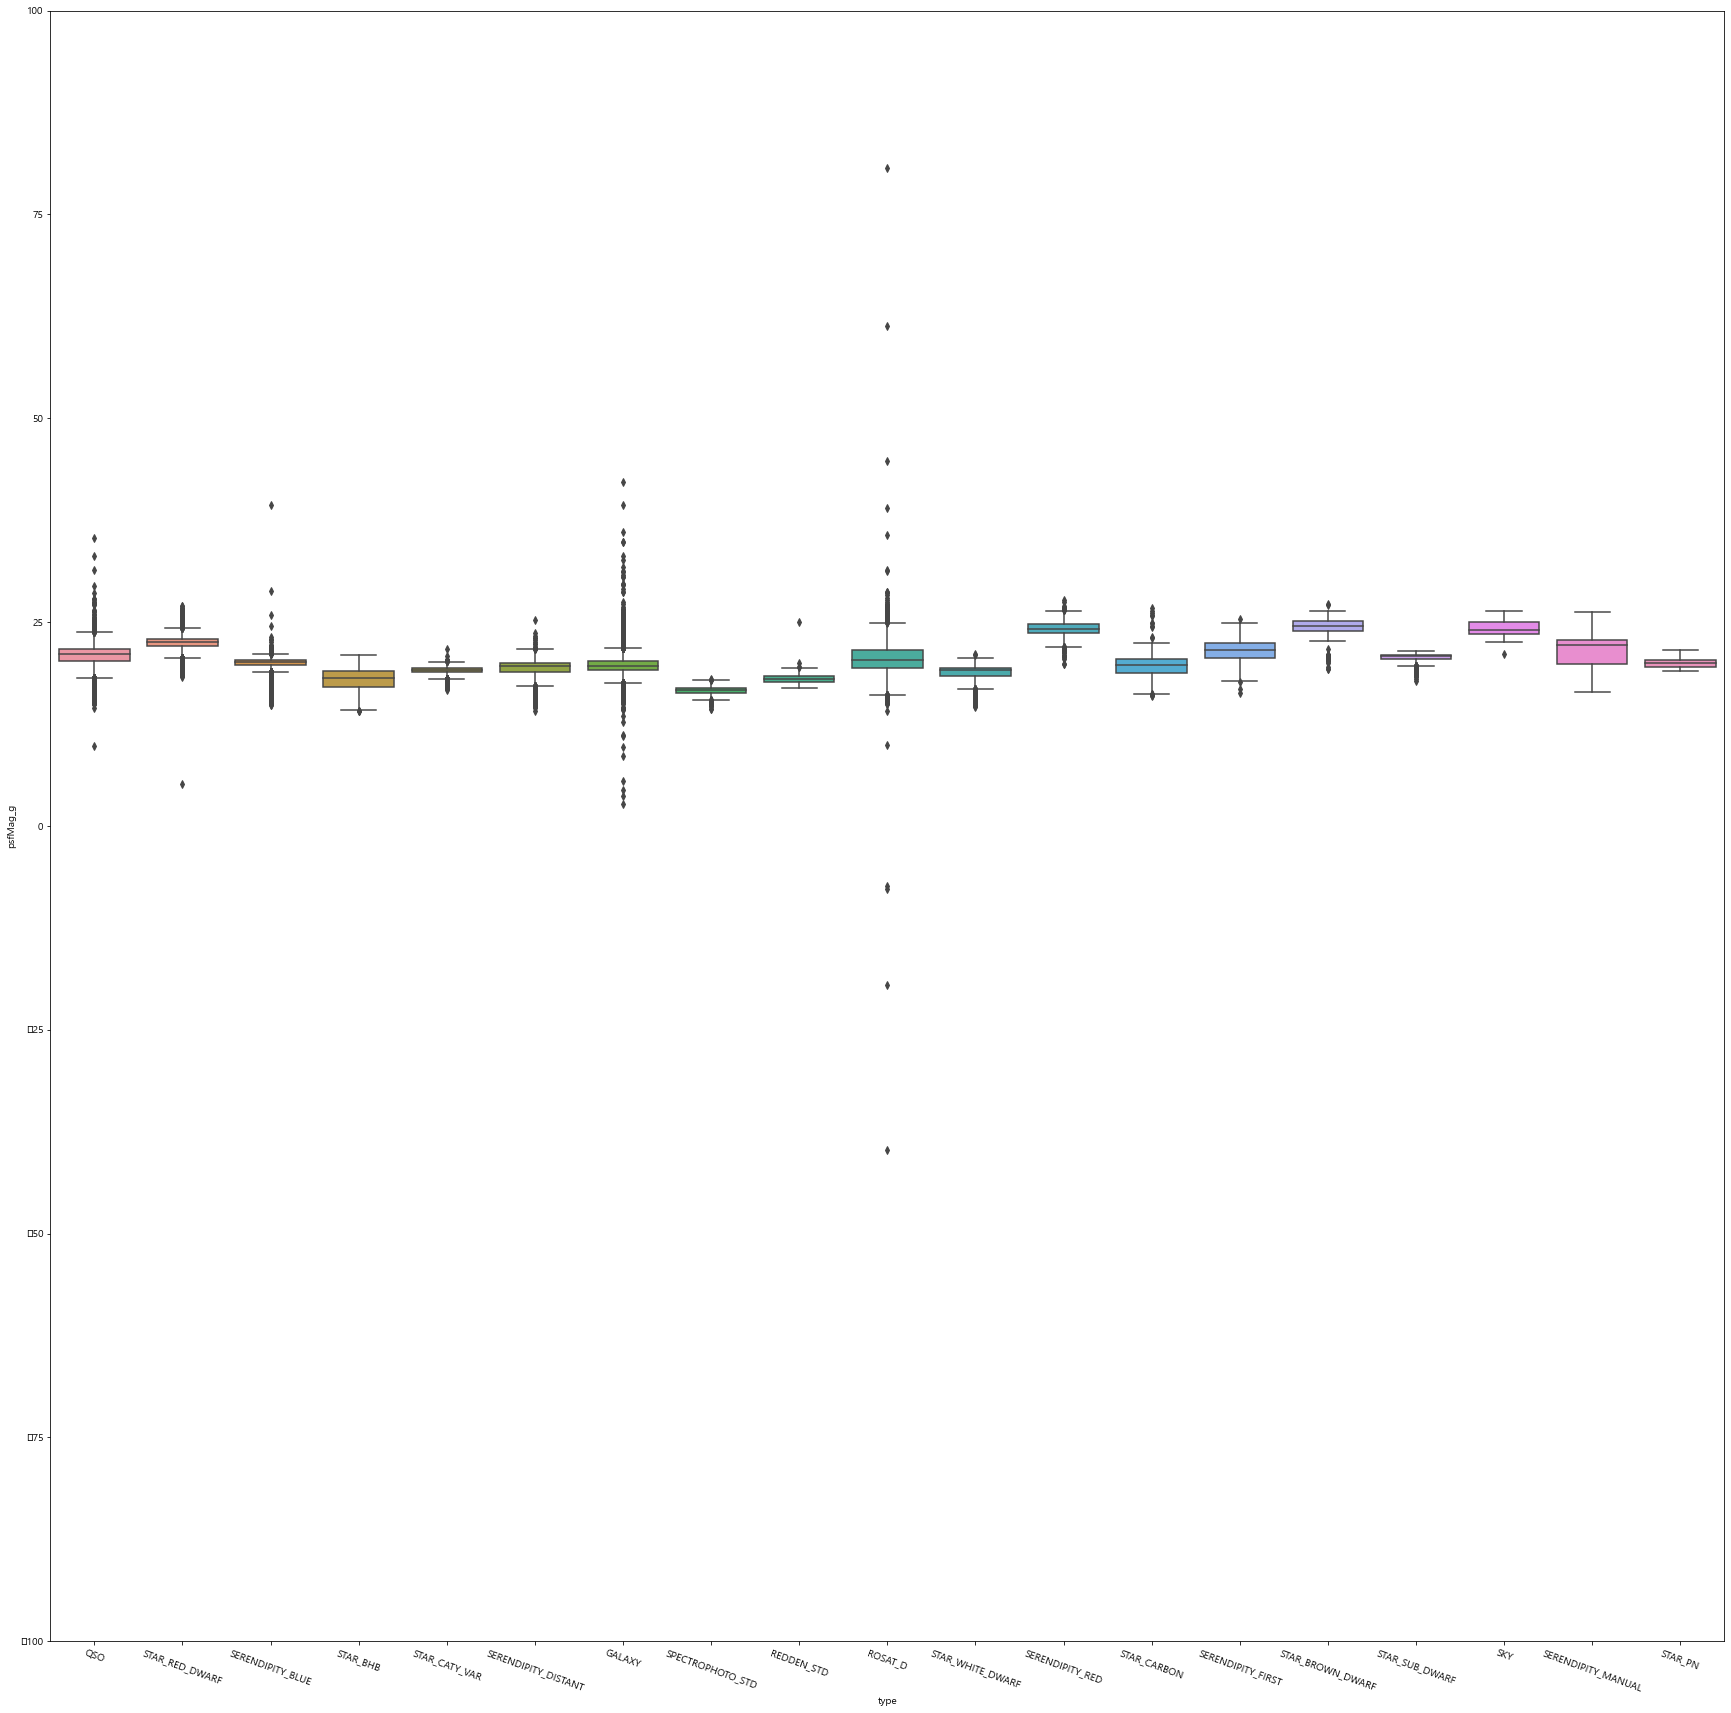

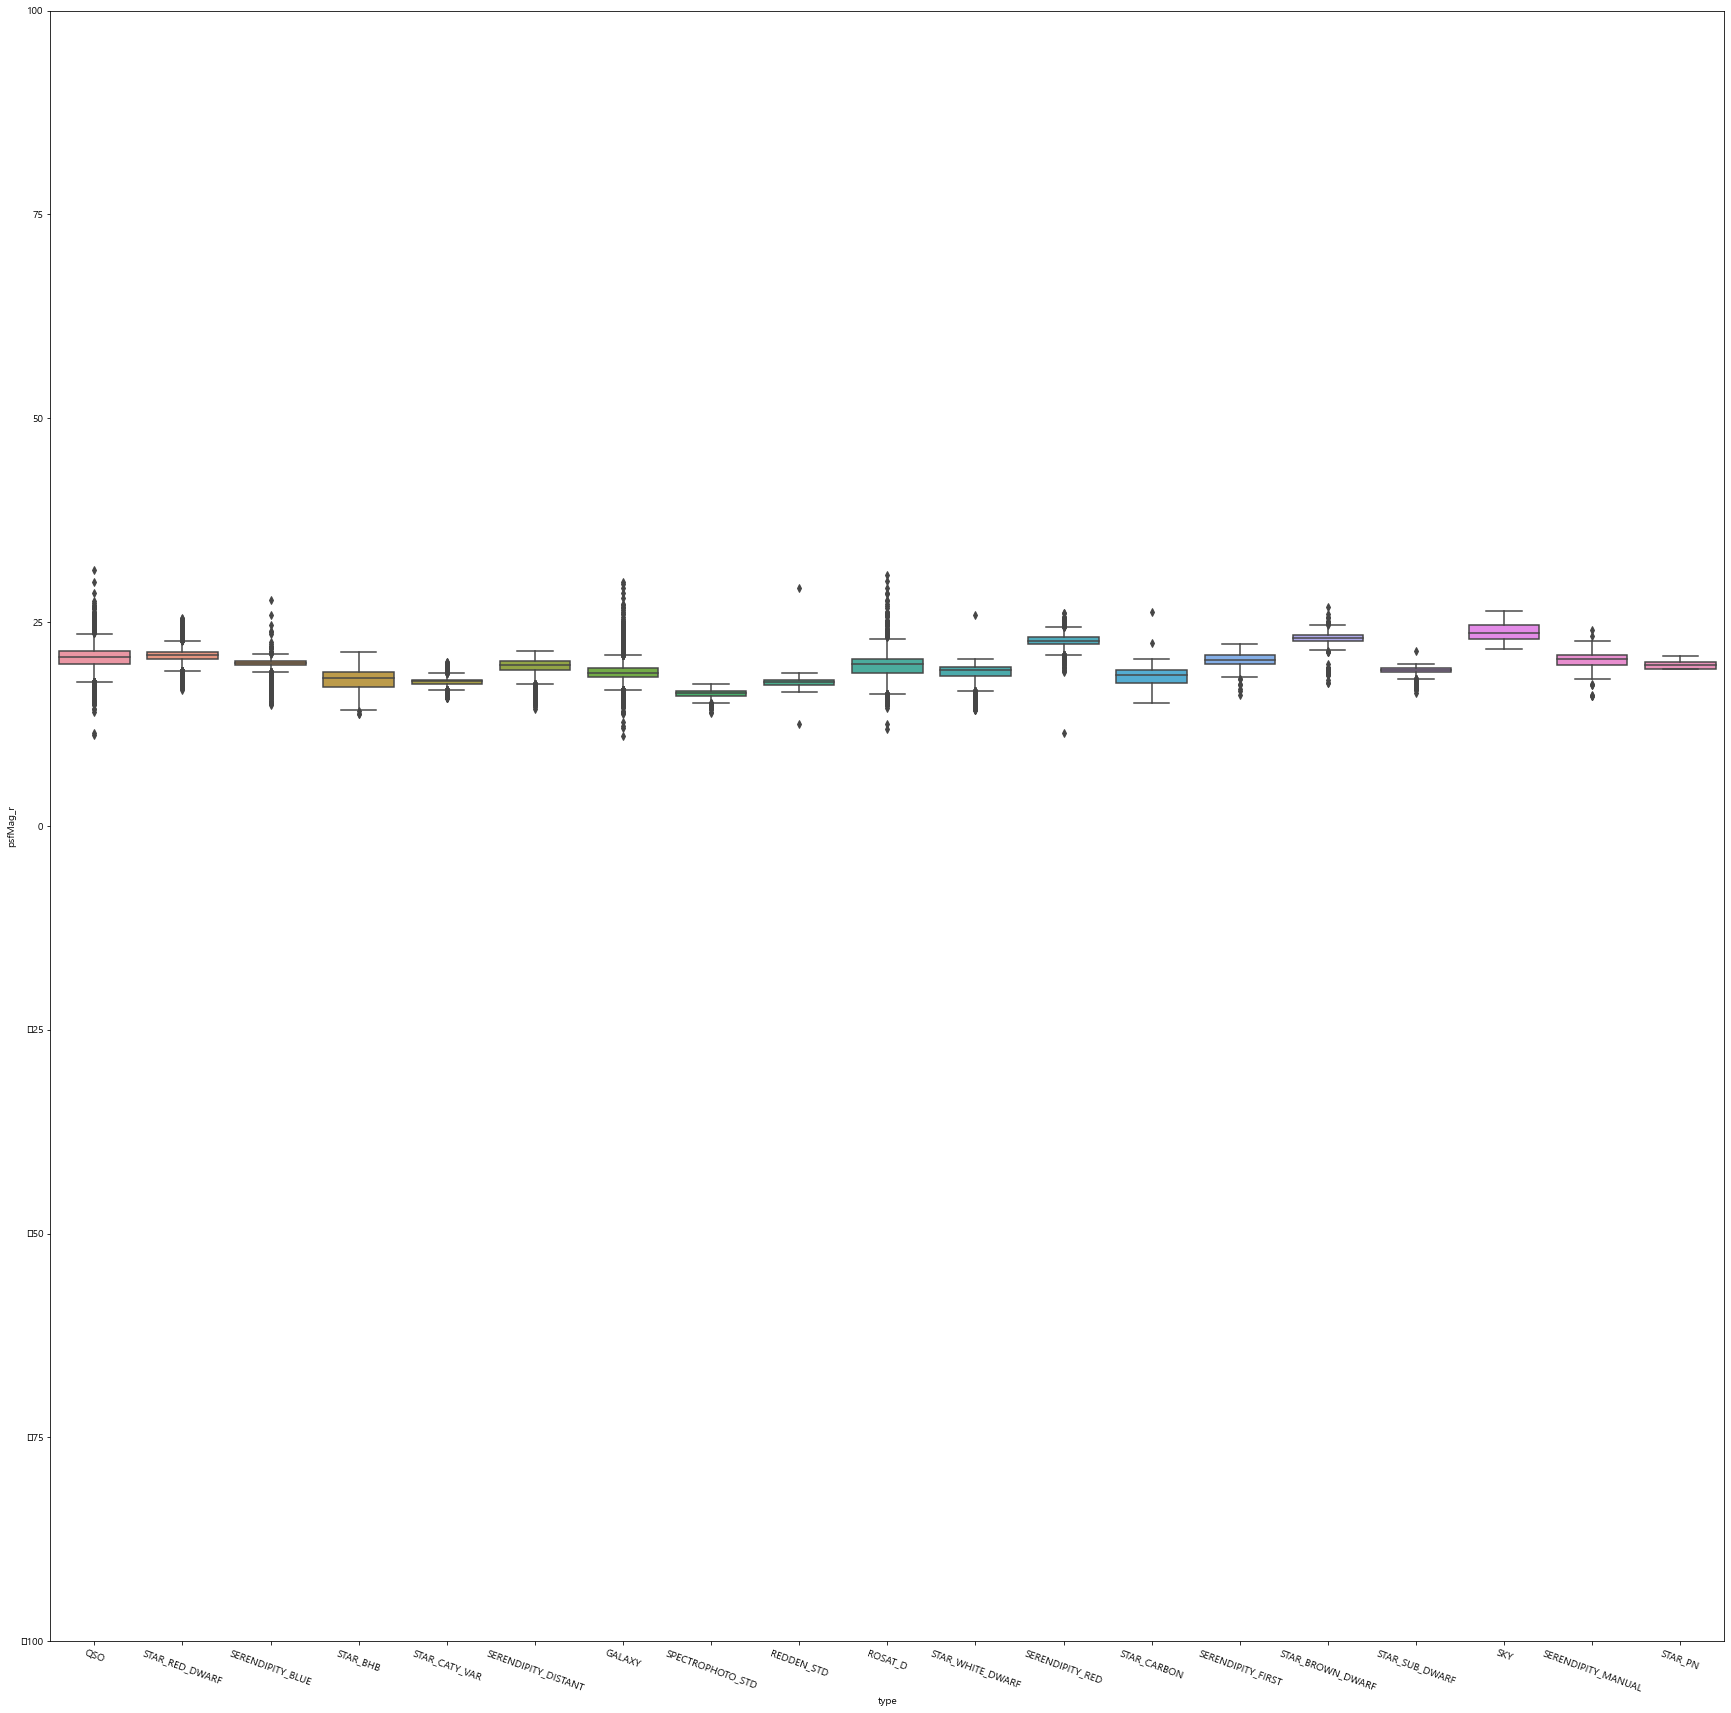

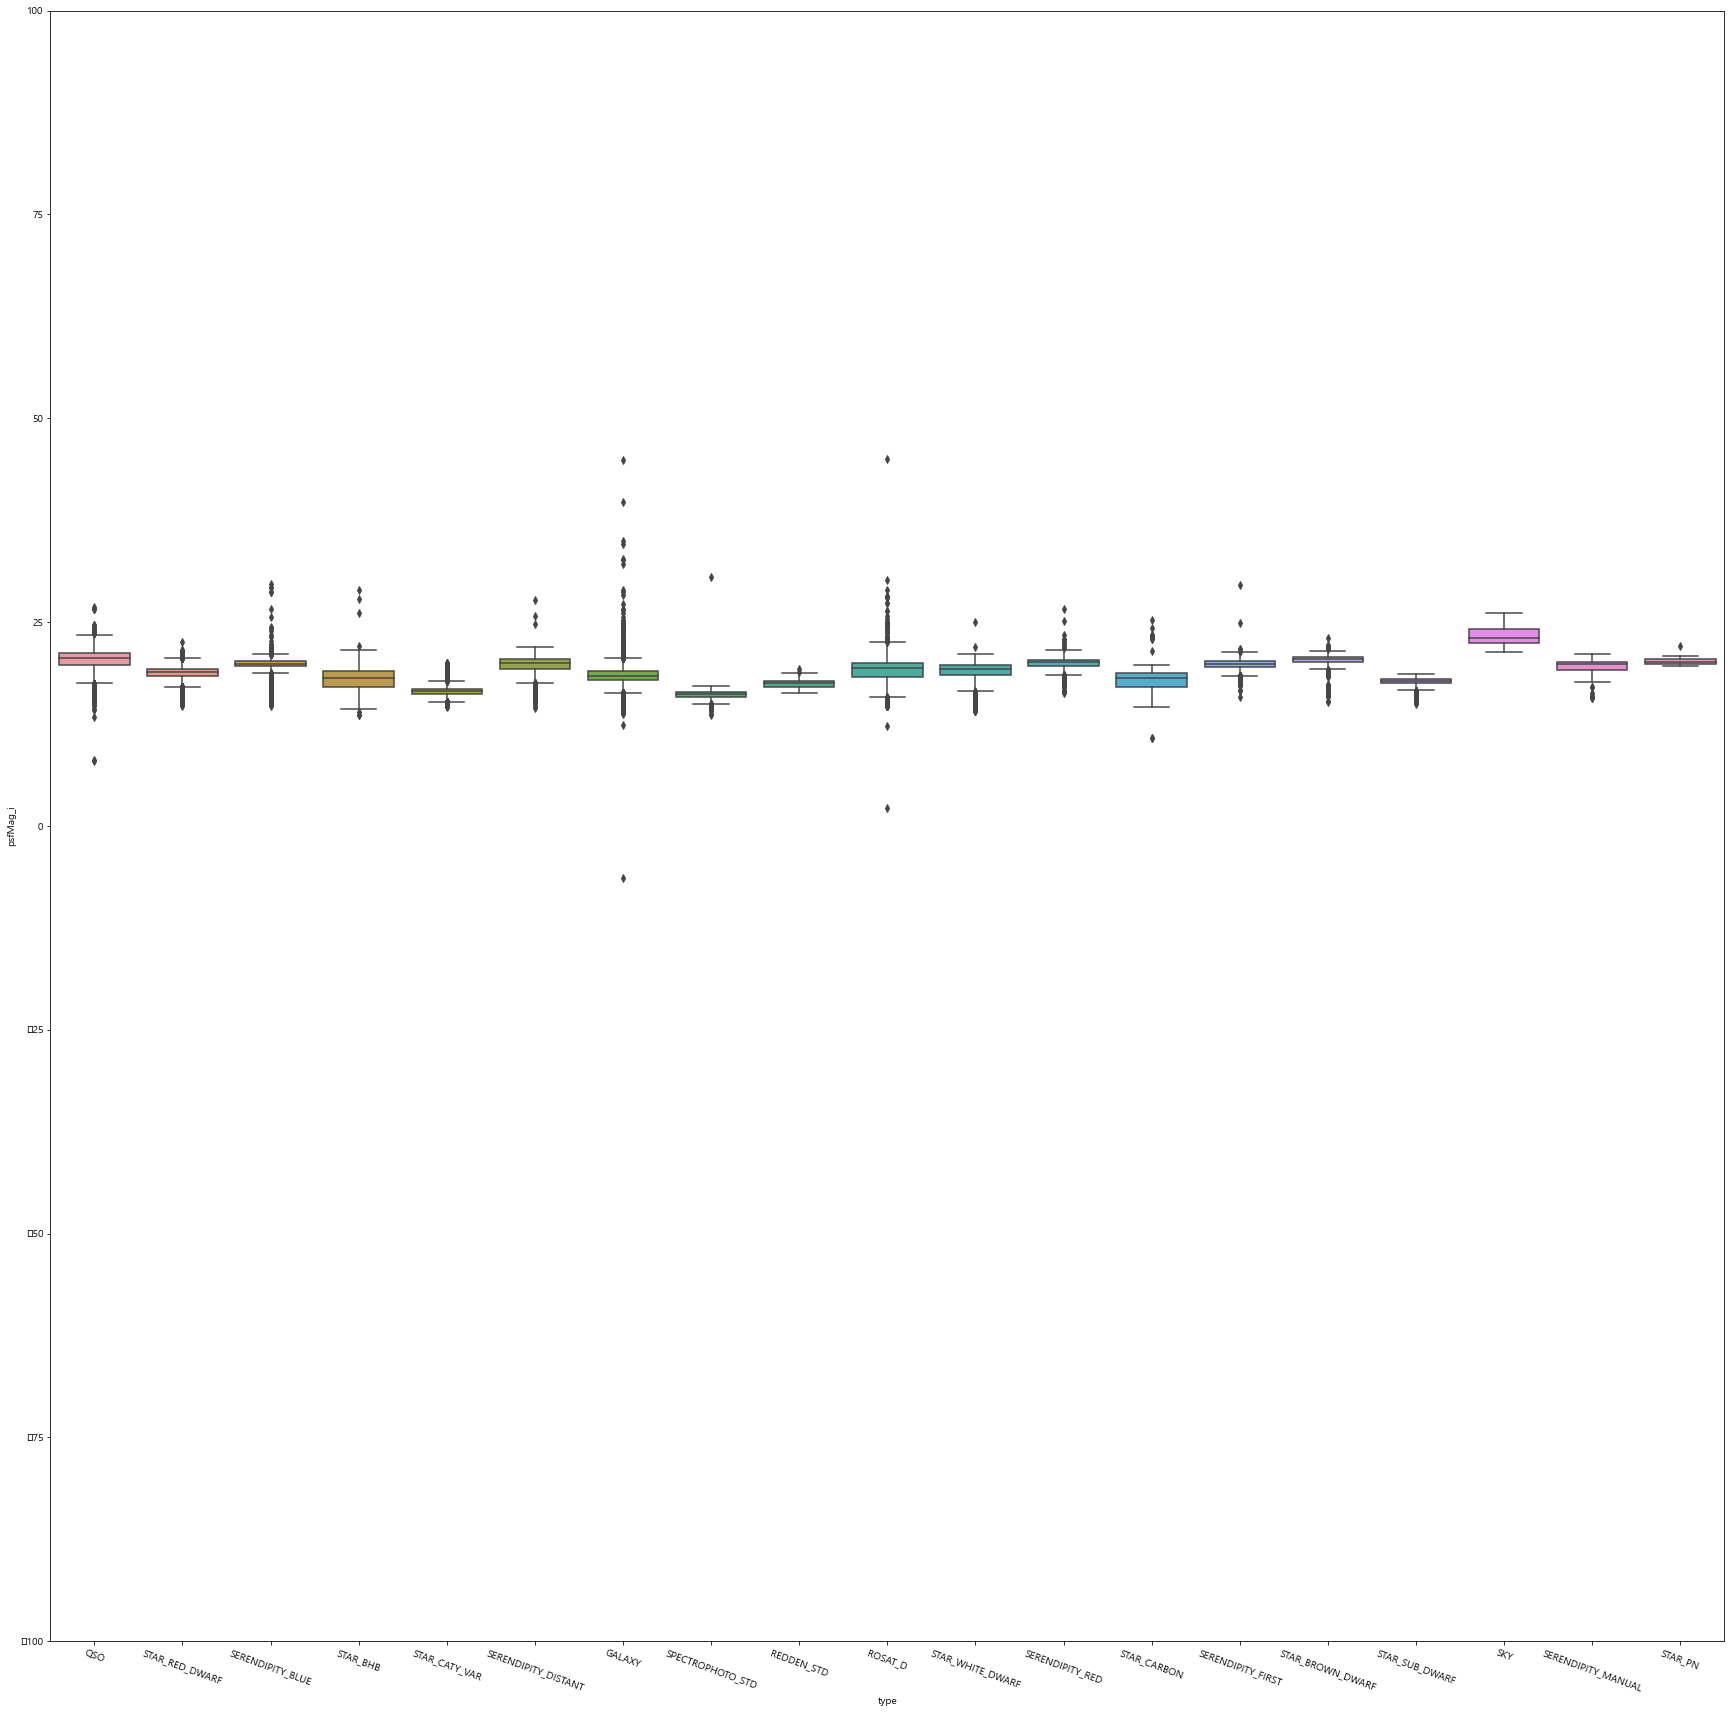

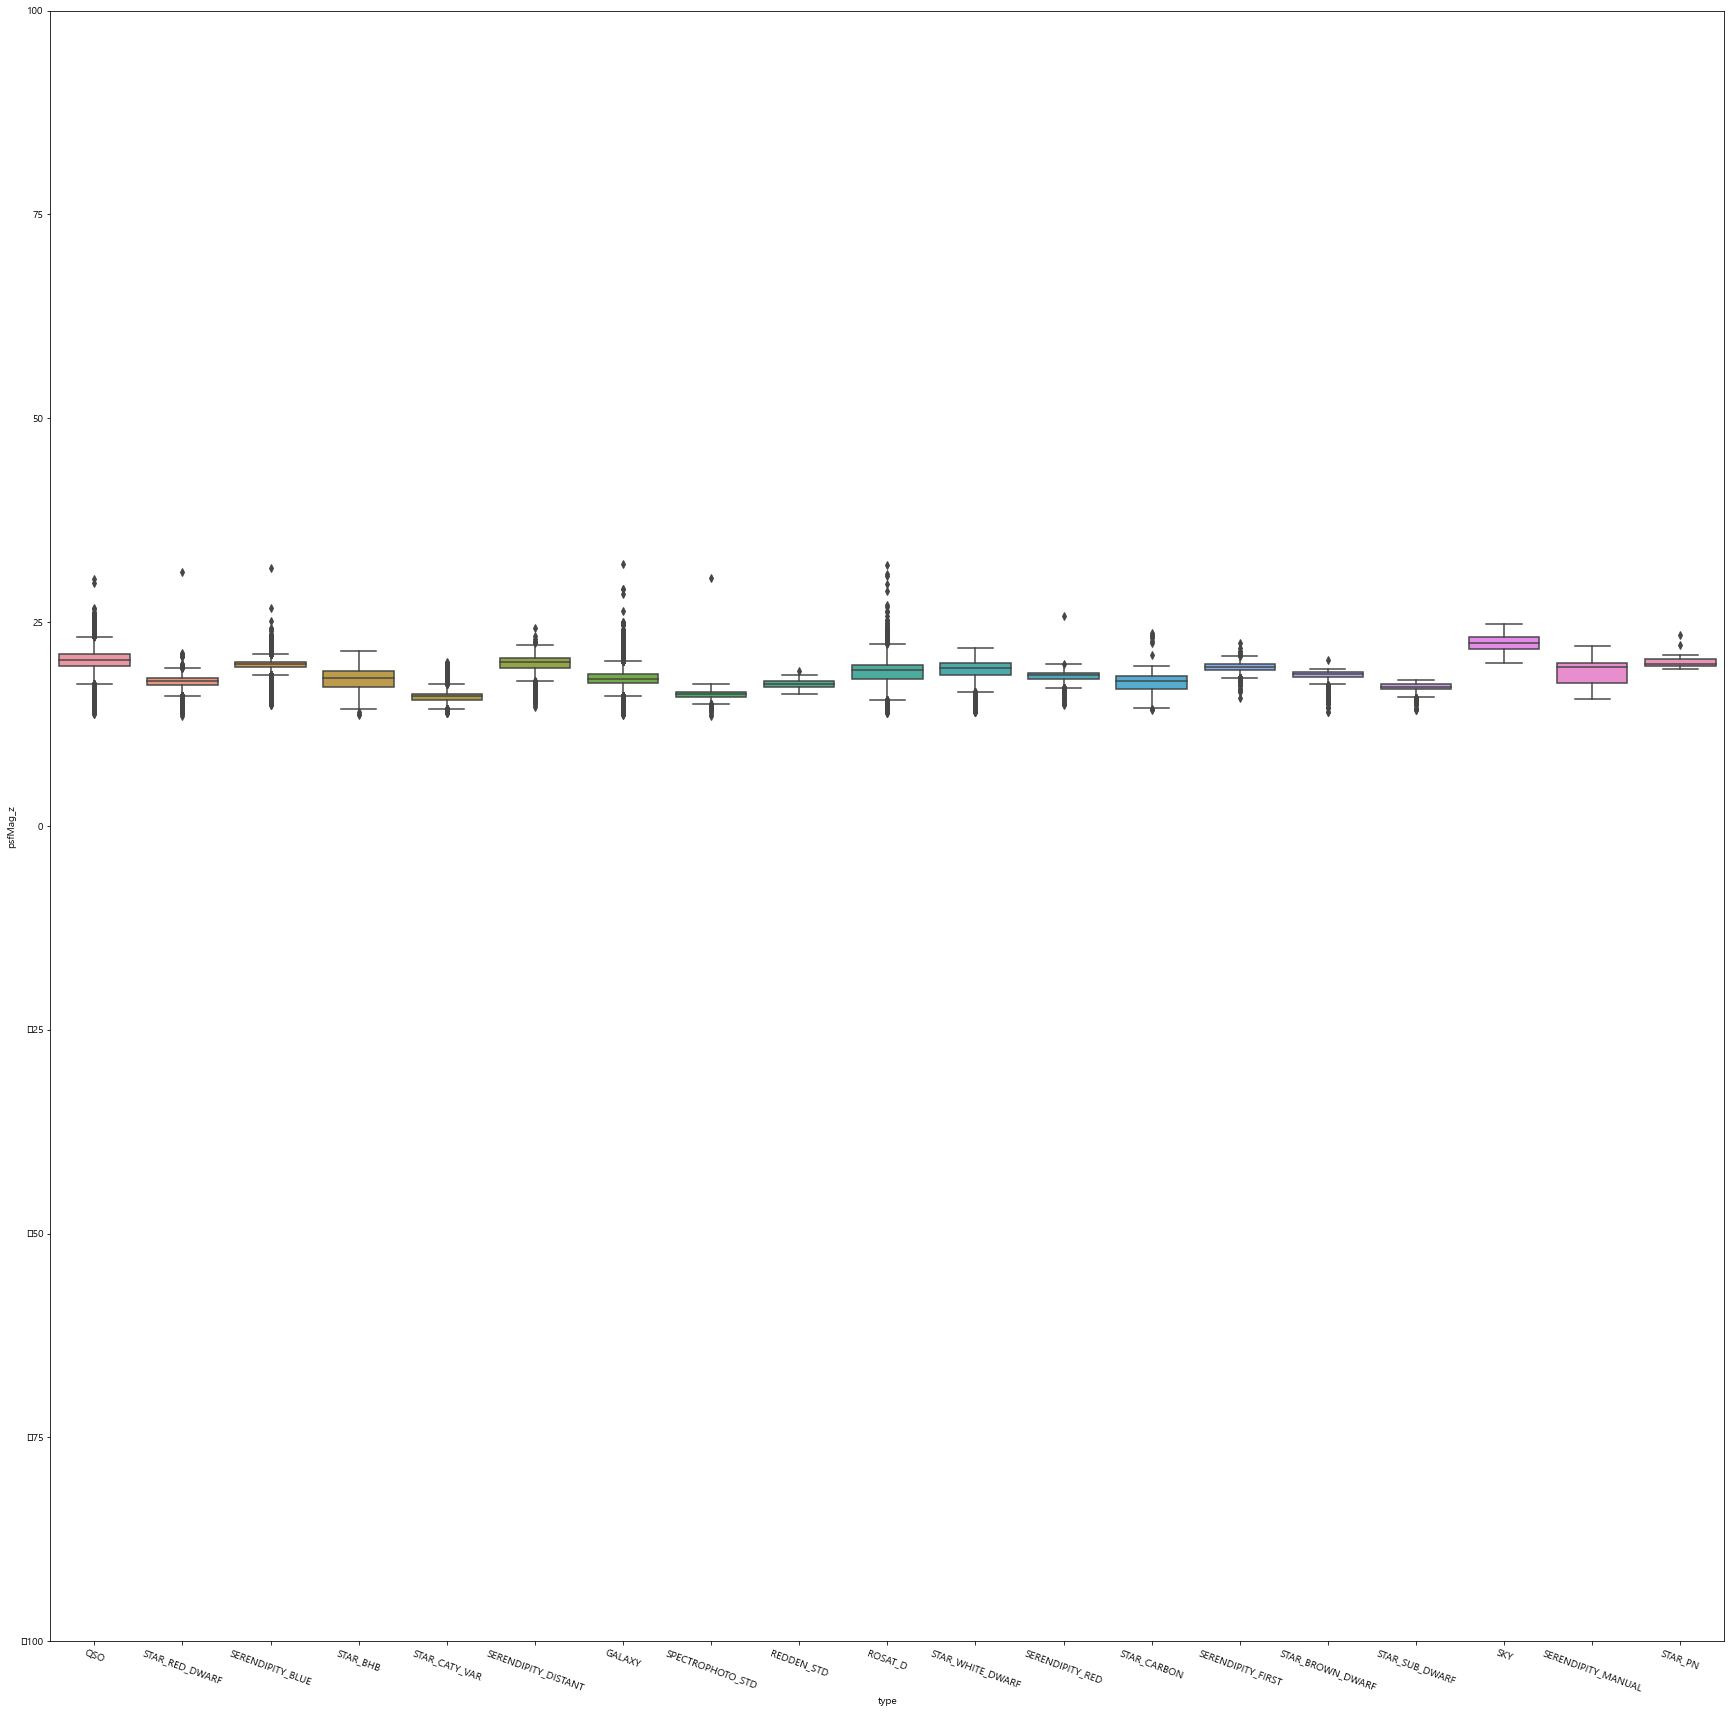

In [28]:
for col in psfMag_cols:
    plt.figure(figsize=(30, 30))
    plt.xticks(rotation=340)
    plt.ylim((-100, 100))
    sns.boxplot(data=train, x='type', y=col)

위 boxplot들을 보면 데이터 분포가 거의 비슷한 것을 알 수 있지만, 일부 outlier들이 존재합니다.  
이 outlier들은 이미 train 데이터를 필터링해서 test 데이터의 범위 안에 들어가므로 삭제하지 않습니다.

#### fiberMag, petroMag, modelMag 컬럼의 이상치 데이터 제거 및 시각화

fiberMag, petroMag, modelMag 컬럼도 여러 컬럼이 있습니다. 해당 컬럼들의 이름을 리스트 안에 저장합니다.

In [29]:
fiberMag_cols = []

for col in train.columns:
    if 'fiberMag' in col:
        fiberMag_cols.append(col)
        
fiberMag_cols

['fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z']

In [30]:
petroMag_cols = []

for col in train.columns:
    if 'petroMag' in col:
        petroMag_cols.append(col)
        
petroMag_cols

['petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z']

In [31]:
modelMag_cols = []

for col in train.columns:
    if 'modelMag' in col:
        modelMag_cols.append(col)
        
modelMag_cols

['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z']

해당 컬럼들의 데이터 분포를 살펴봅니다.

In [32]:
for col in fiberMag_cols:
    print('train - {0} max : {1}, {2} min : {3}'.format(col, train[col].max(), col, train[col].min()))
    print('test - {0} max : {1}, {2} min : {3}'.format(col, test[col].max(), col, test[col].min()))
    print('')

train - fiberMag_u max : 105.085577254757, fiberMag_u min : -39.8073748531751
test - fiberMag_u max : 41.1699910359617, fiberMag_u min : 9.390438880558301

train - fiberMag_g max : 248077.5133803, fiberMag_g min : -215882.917190915
test - fiberMag_g max : 47.1605801682119, fiberMag_g min : 8.188751626264791

train - fiberMag_r max : 30.1609566973038, fiberMag_r min : -14.6624347955676
test - fiberMag_r max : 29.266686945188397, fiberMag_r min : 12.288182554025

train - fiberMag_i max : 42.0020467656941, fiberMag_i min : -19721.1721657677
test - fiberMag_i max : 31.1467421665649, fiberMag_i min : 12.6889842900864

train - fiberMag_z max : 36.498179466165396, fiberMag_z min : 8.04984956574146
test - fiberMag_z max : 26.4785636579488, fiberMag_z min : -8.45593204783119



In [33]:
for col in petroMag_cols:
    print('train - {0} max : {1}, {2} min : {3}'.format(col, train[col].max(), col, train[col].min()))
    print('test - {0} max : {1}, {2} min : {3}'.format(col, test[col].max(), col, test[col].min()))
    print('')

train - petroMag_u max : 175257.98289139802, petroMag_u min : -1131.08133865325
test - petroMag_u max : 65.3920866638455, petroMag_u min : -98.1819752186049

train - petroMag_g max : 566.468016291871, petroMag_g min : -461.827986743038
test - petroMag_g max : 106.962571260499, petroMag_g min : -1348.06877586743

train - petroMag_r max : 181.95564415805, petroMag_r min : -130.554426043977
test - petroMag_r max : 41.850633165482, petroMag_r min : -23.9089521014095

train - petroMag_i max : 122.271335996208, petroMag_i min : -244.244090814933
test - petroMag_i max : 52.221527762065286, petroMag_i min : -8.3566541452204

train - petroMag_z max : 8647.36070904683, petroMag_z min : -789.6018384042958
test - petroMag_z max : 74.74739382327971, petroMag_z min : -64.9172928620313



In [34]:
for col in modelMag_cols:
    print('train - {0} max : {1}, {2} min : {3}'.format(col, train[col].max(), col, train[col].min()))
    print('test - {0} max : {1}, {2} min : {3}'.format(col, test[col].max(), col, test[col].min()))
    print('')

train - modelMag_u max : 49.487277237065705, modelMag_u min : 3.44444811198357
test - modelMag_u max : 32.6412395509514, modelMag_u min : 12.419765058117301

train - modelMag_g max : 59.9878418836431, modelMag_g min : 8.68669028307677
test - modelMag_g max : 28.8149768230269, modelMag_g min : 13.6175769106589

train - modelMag_r max : 35.1023115217678, modelMag_r min : 10.286916895272801
test - modelMag_r max : 27.579664198130693, modelMag_r min : 13.3828319463996

train - modelMag_i max : 45.78354964836921, modelMag_i min : 11.3374667984987
test - modelMag_i max : 26.4715549421679, modelMag_i min : 12.9551130455038

train - modelMag_z max : 61.597878868209705, modelMag_z min : 4.46008587072103
test - modelMag_z max : 24.461972962704, modelMag_z min : 12.3956946471824



이상치 데이터 수를 출력합니다.

In [35]:
for col in fiberMag_cols:
    temp_df = train[(train[col] > test[col].max()) | (train[col] < test[col].min())]
    print("{0} 컬럼의 이상치 수 : {1}"\
          .format(col, temp_df.shape[0]))
    print("{0} 컬럼의 이상치의 최댓값 : {1:.3f}, 최솟값 : {2:.3f}".format(col, temp_df[col].max(), temp_df[col].min()))
    print('')

fiberMag_u 컬럼의 이상치 수 : 14
fiberMag_u 컬럼의 이상치의 최댓값 : 105.086, 최솟값 : -39.807

fiberMag_g 컬럼의 이상치 수 : 6
fiberMag_g 컬럼의 이상치의 최댓값 : 248077.513, 최솟값 : -215882.917

fiberMag_r 컬럼의 이상치 수 : 4
fiberMag_r 컬럼의 이상치의 최댓값 : 30.161, 최솟값 : -14.662

fiberMag_i 컬럼의 이상치 수 : 6
fiberMag_i 컬럼의 이상치의 최댓값 : 42.002, 최솟값 : -19721.172

fiberMag_z 컬럼의 이상치 수 : 7
fiberMag_z 컬럼의 이상치의 최댓값 : 36.498, 최솟값 : 27.865



In [36]:
for col in petroMag_cols:
    temp_df = train[(train[col] > test[col].max()) | (train[col] < test[col].min())]
    print("{0} 컬럼의 이상치 수 : {1}"\
          .format(col, temp_df.shape[0]))
    print("{0} 컬럼의 이상치의 최댓값 : {1:.3f}, 최솟값 : {2:.3f}".format(col, temp_df[col].max(), temp_df[col].min()))
    print('')

petroMag_u 컬럼의 이상치 수 : 31
petroMag_u 컬럼의 이상치의 최댓값 : 175257.983, 최솟값 : -1131.081

petroMag_g 컬럼의 이상치 수 : 6
petroMag_g 컬럼의 이상치의 최댓값 : 566.468, 최솟값 : 114.158

petroMag_r 컬럼의 이상치 수 : 21
petroMag_r 컬럼의 이상치의 최댓값 : 181.956, 최솟값 : -130.554

petroMag_i 컬럼의 이상치 수 : 21
petroMag_i 컬럼의 이상치의 최댓값 : 122.271, 최솟값 : -244.244

petroMag_z 컬럼의 이상치 수 : 18
petroMag_z 컬럼의 이상치의 최댓값 : 8647.361, 최솟값 : -789.602



In [37]:
for col in modelMag_cols:
    temp_df = train[(train[col] > test[col].max()) | (train[col] < test[col].min())]
    print("{0} 컬럼의 이상치 수 : {1}"\
          .format(col, temp_df.shape[0]))
    print("{0} 컬럼의 이상치의 최댓값 : {1:.3f}, 최솟값 : {2:.3f}".format(col, temp_df[col].max(), temp_df[col].min()))
    print('')

modelMag_u 컬럼의 이상치 수 : 18
modelMag_u 컬럼의 이상치의 최댓값 : 49.487, 최솟값 : 3.444

modelMag_g 컬럼의 이상치 수 : 40
modelMag_g 컬럼의 이상치의 최댓값 : 59.988, 최솟값 : 8.687

modelMag_r 컬럼의 이상치 수 : 79
modelMag_r 컬럼의 이상치의 최댓값 : 35.102, 최솟값 : 10.287

modelMag_i 컬럼의 이상치 수 : 79
modelMag_i 컬럼의 이상치의 최댓값 : 45.784, 최솟값 : 11.337

modelMag_z 컬럼의 이상치 수 : 104
modelMag_z 컬럼의 이상치의 최댓값 : 61.598, 최솟값 : 4.460



이상치 데이터들을 제거합니다.

In [38]:
for col in fiberMag_cols:
    train = train[(train[col] <= test[col].max()) & (train[col] >= test[col].min())]
    
train.shape[0]

199819

In [39]:
for col in petroMag_cols:
    train = train[(train[col] <= test[col].max()) & (train[col] >= test[col].min())]
    
train.shape[0]

199735

In [40]:
for col in modelMag_cols:
    train = train[(train[col] <= test[col].max()) & (train[col] >= test[col].min())]
    
train.shape[0]

199568

'type'별로 컬럼들의 데이터 분포를 살펴봅니다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


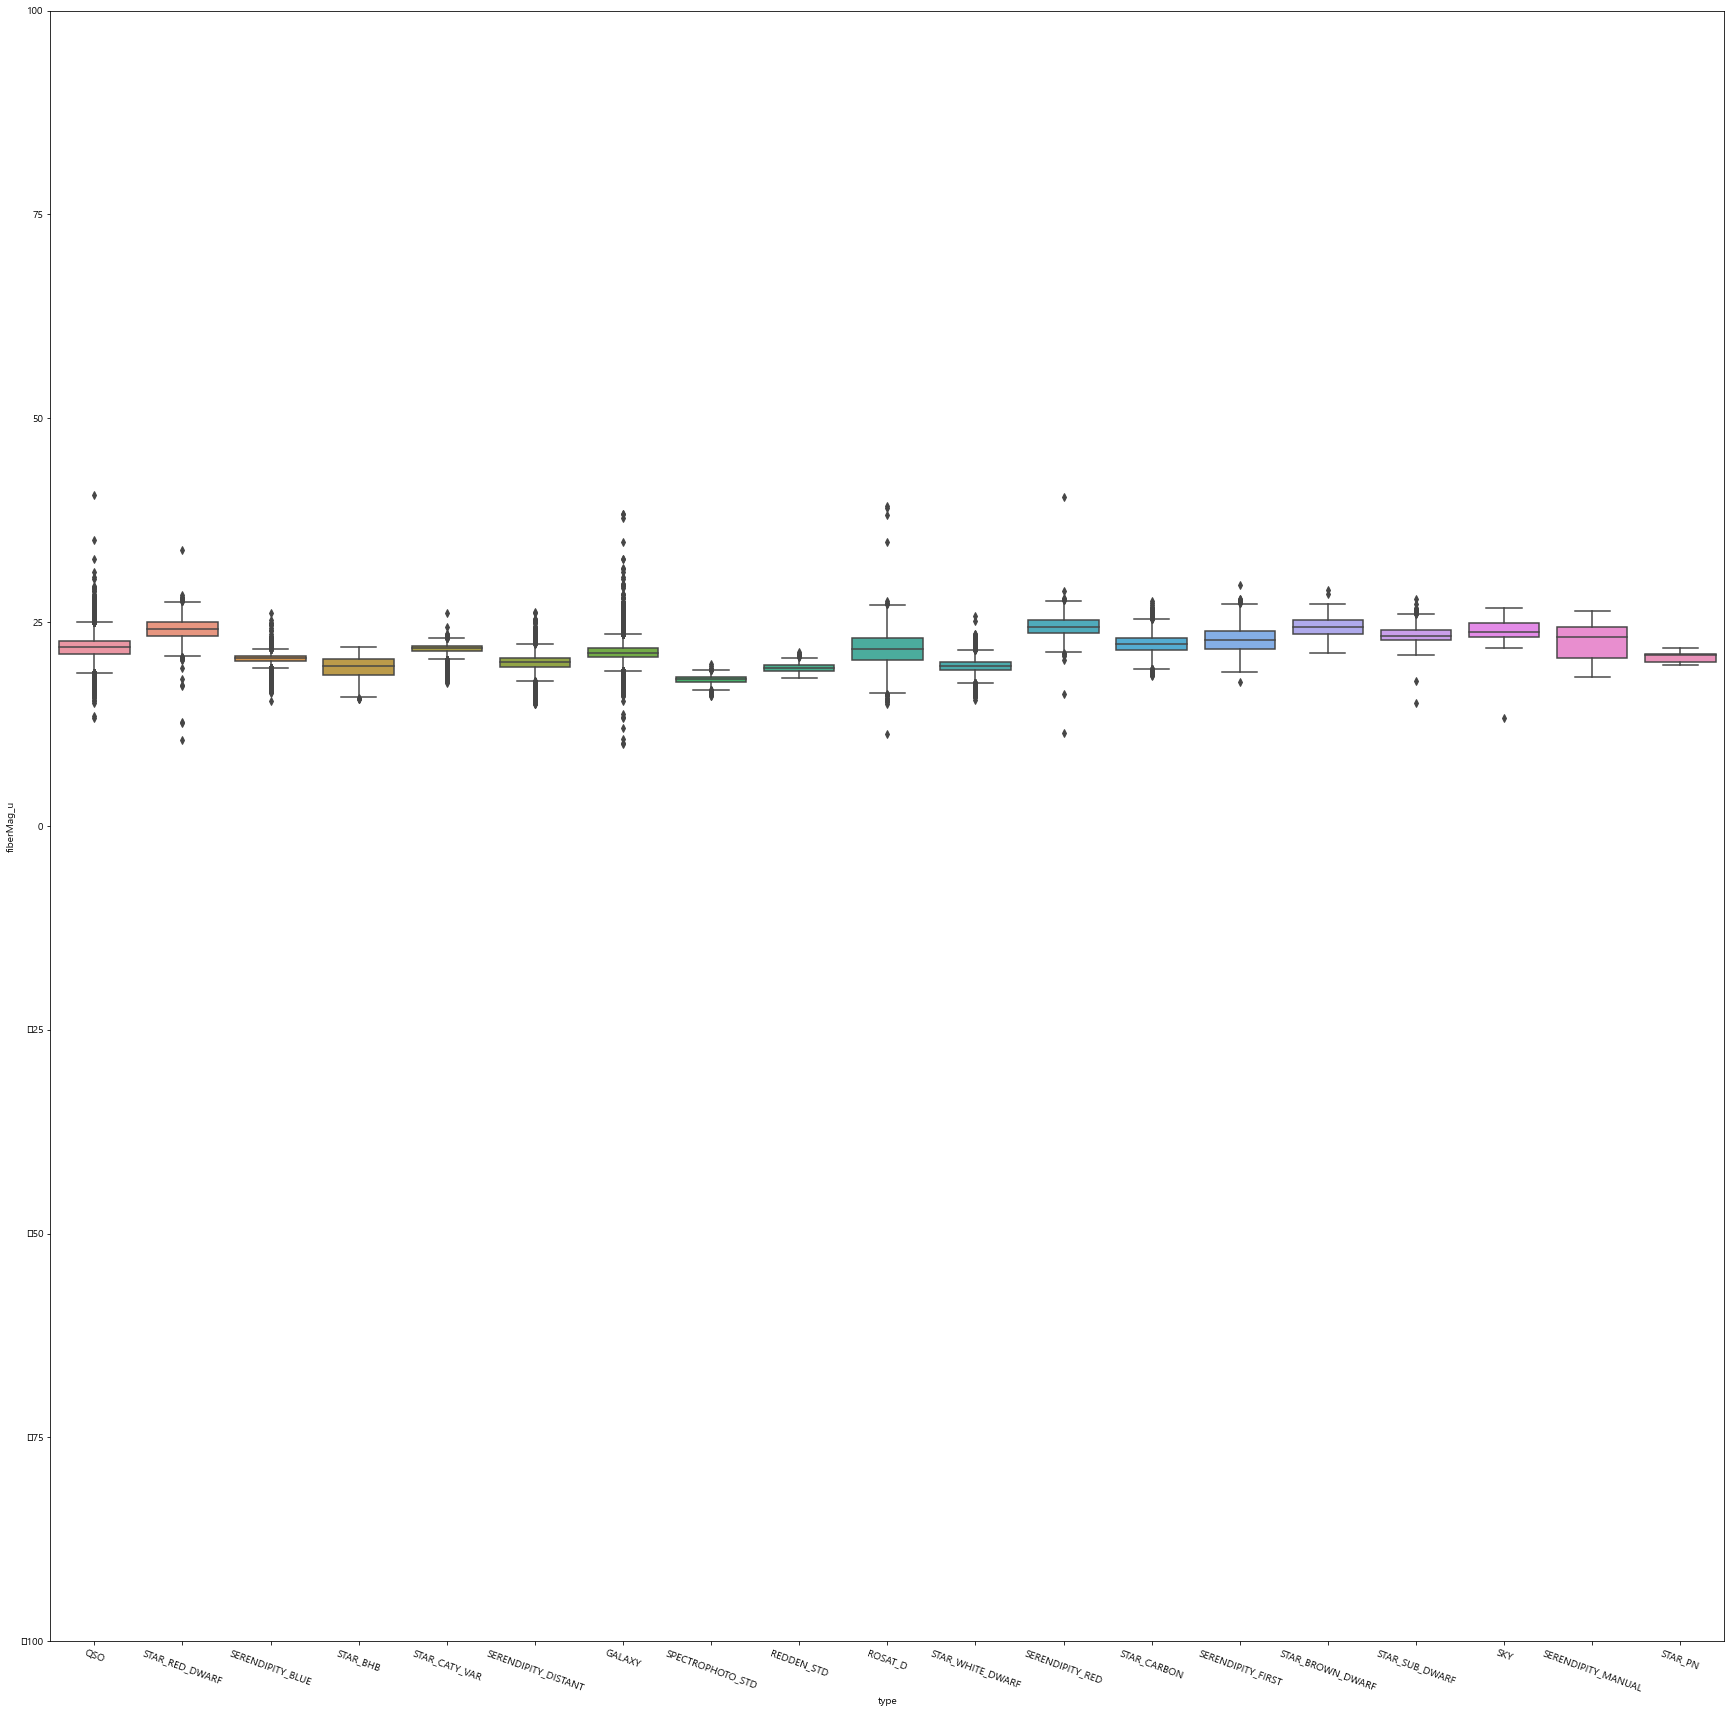

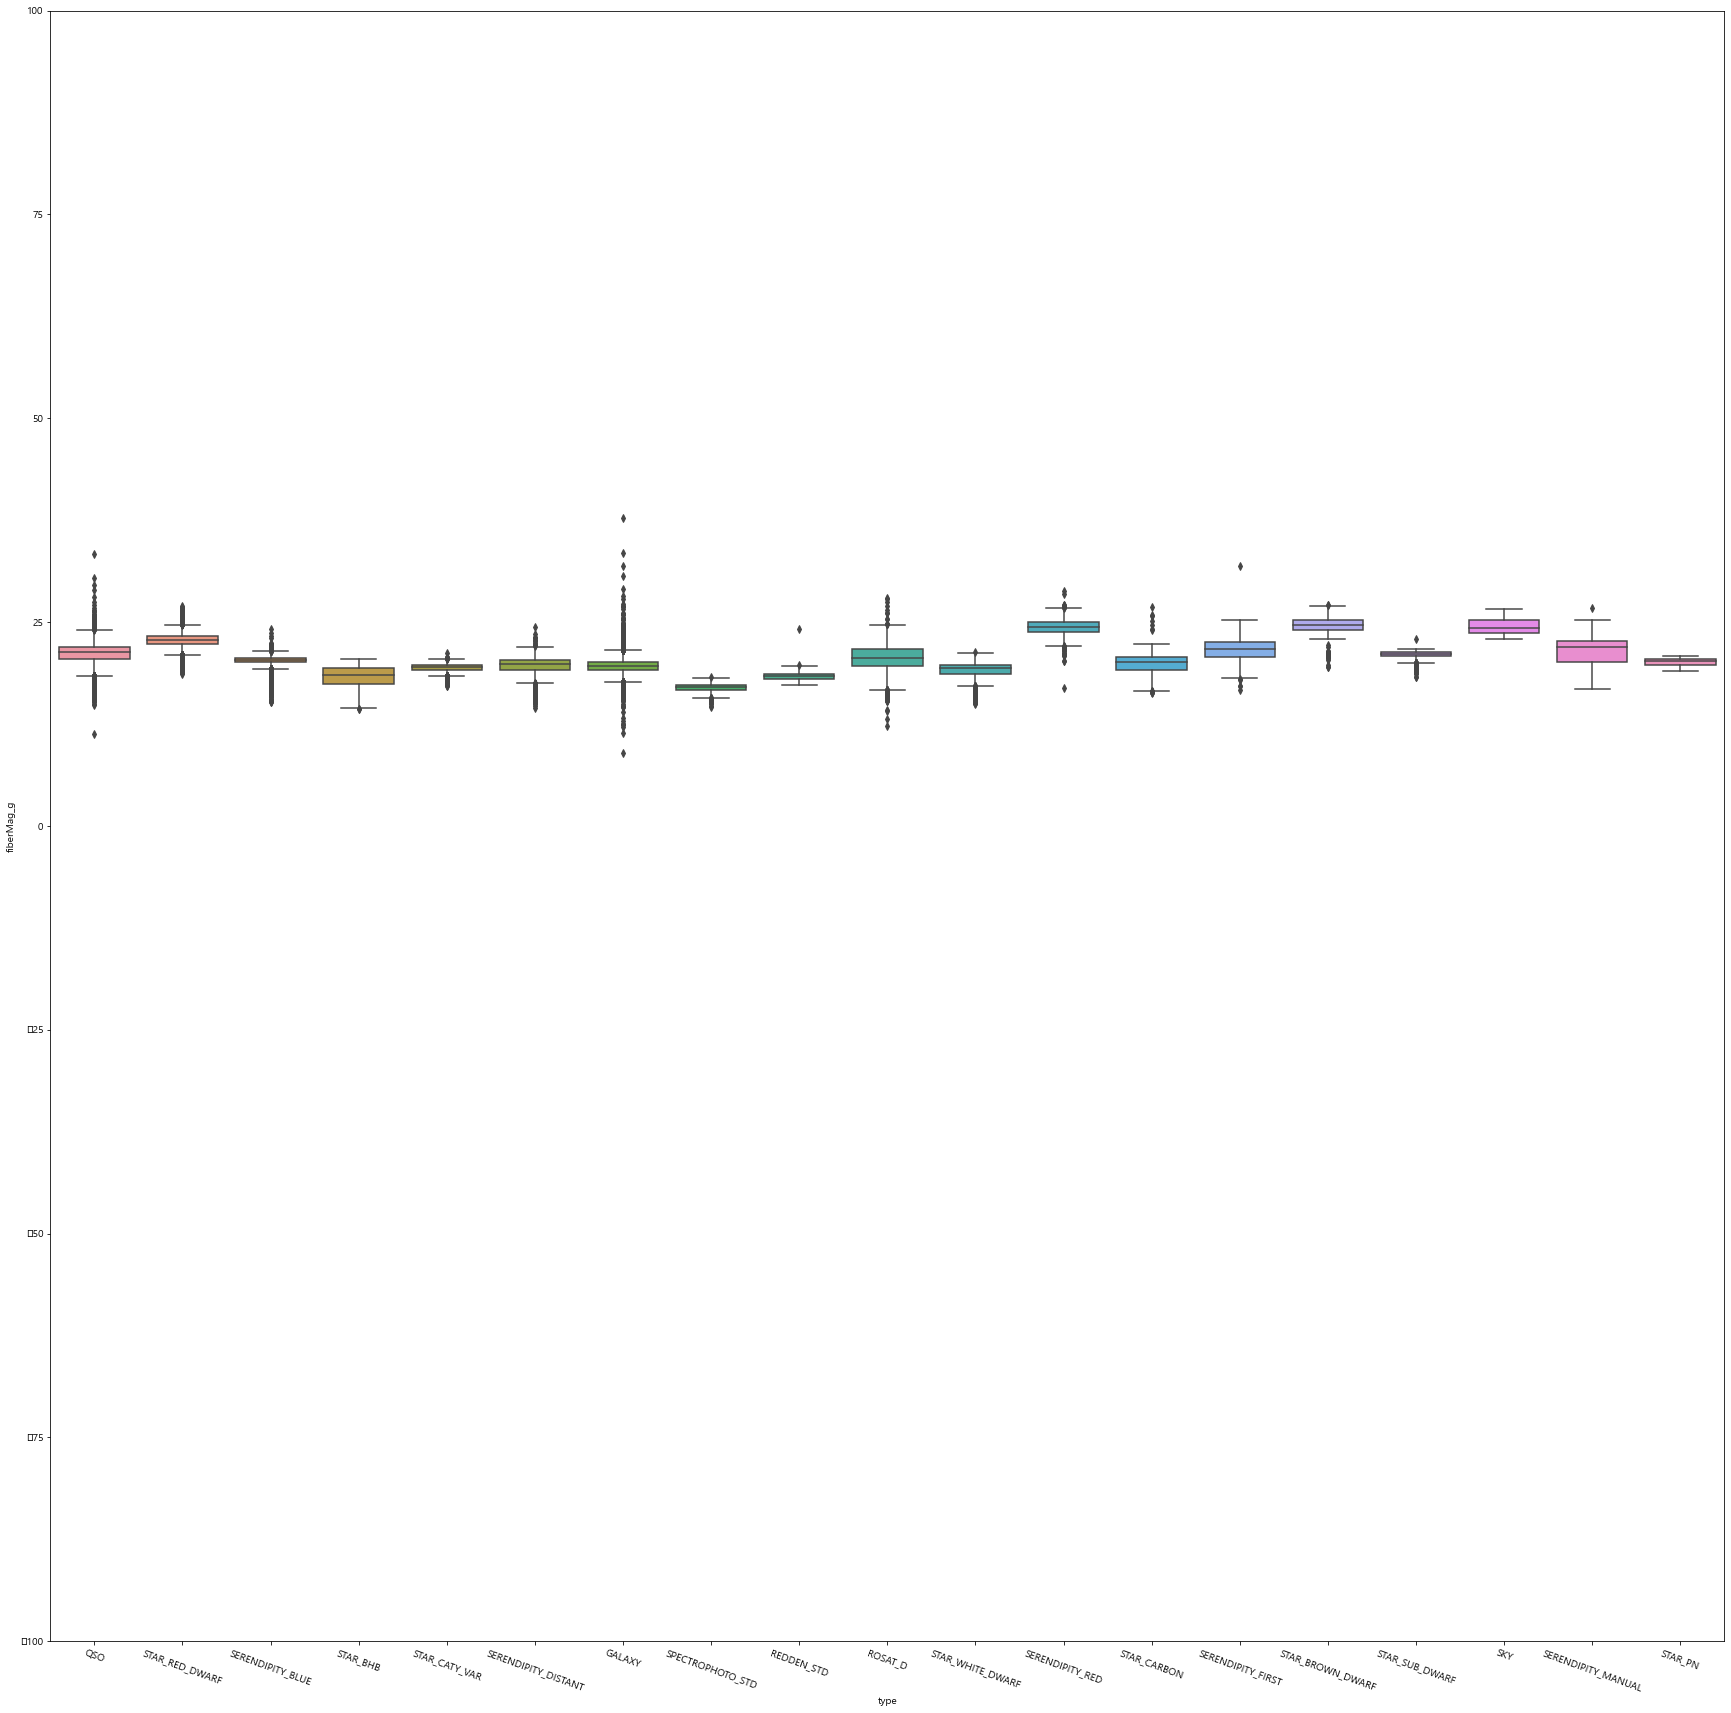

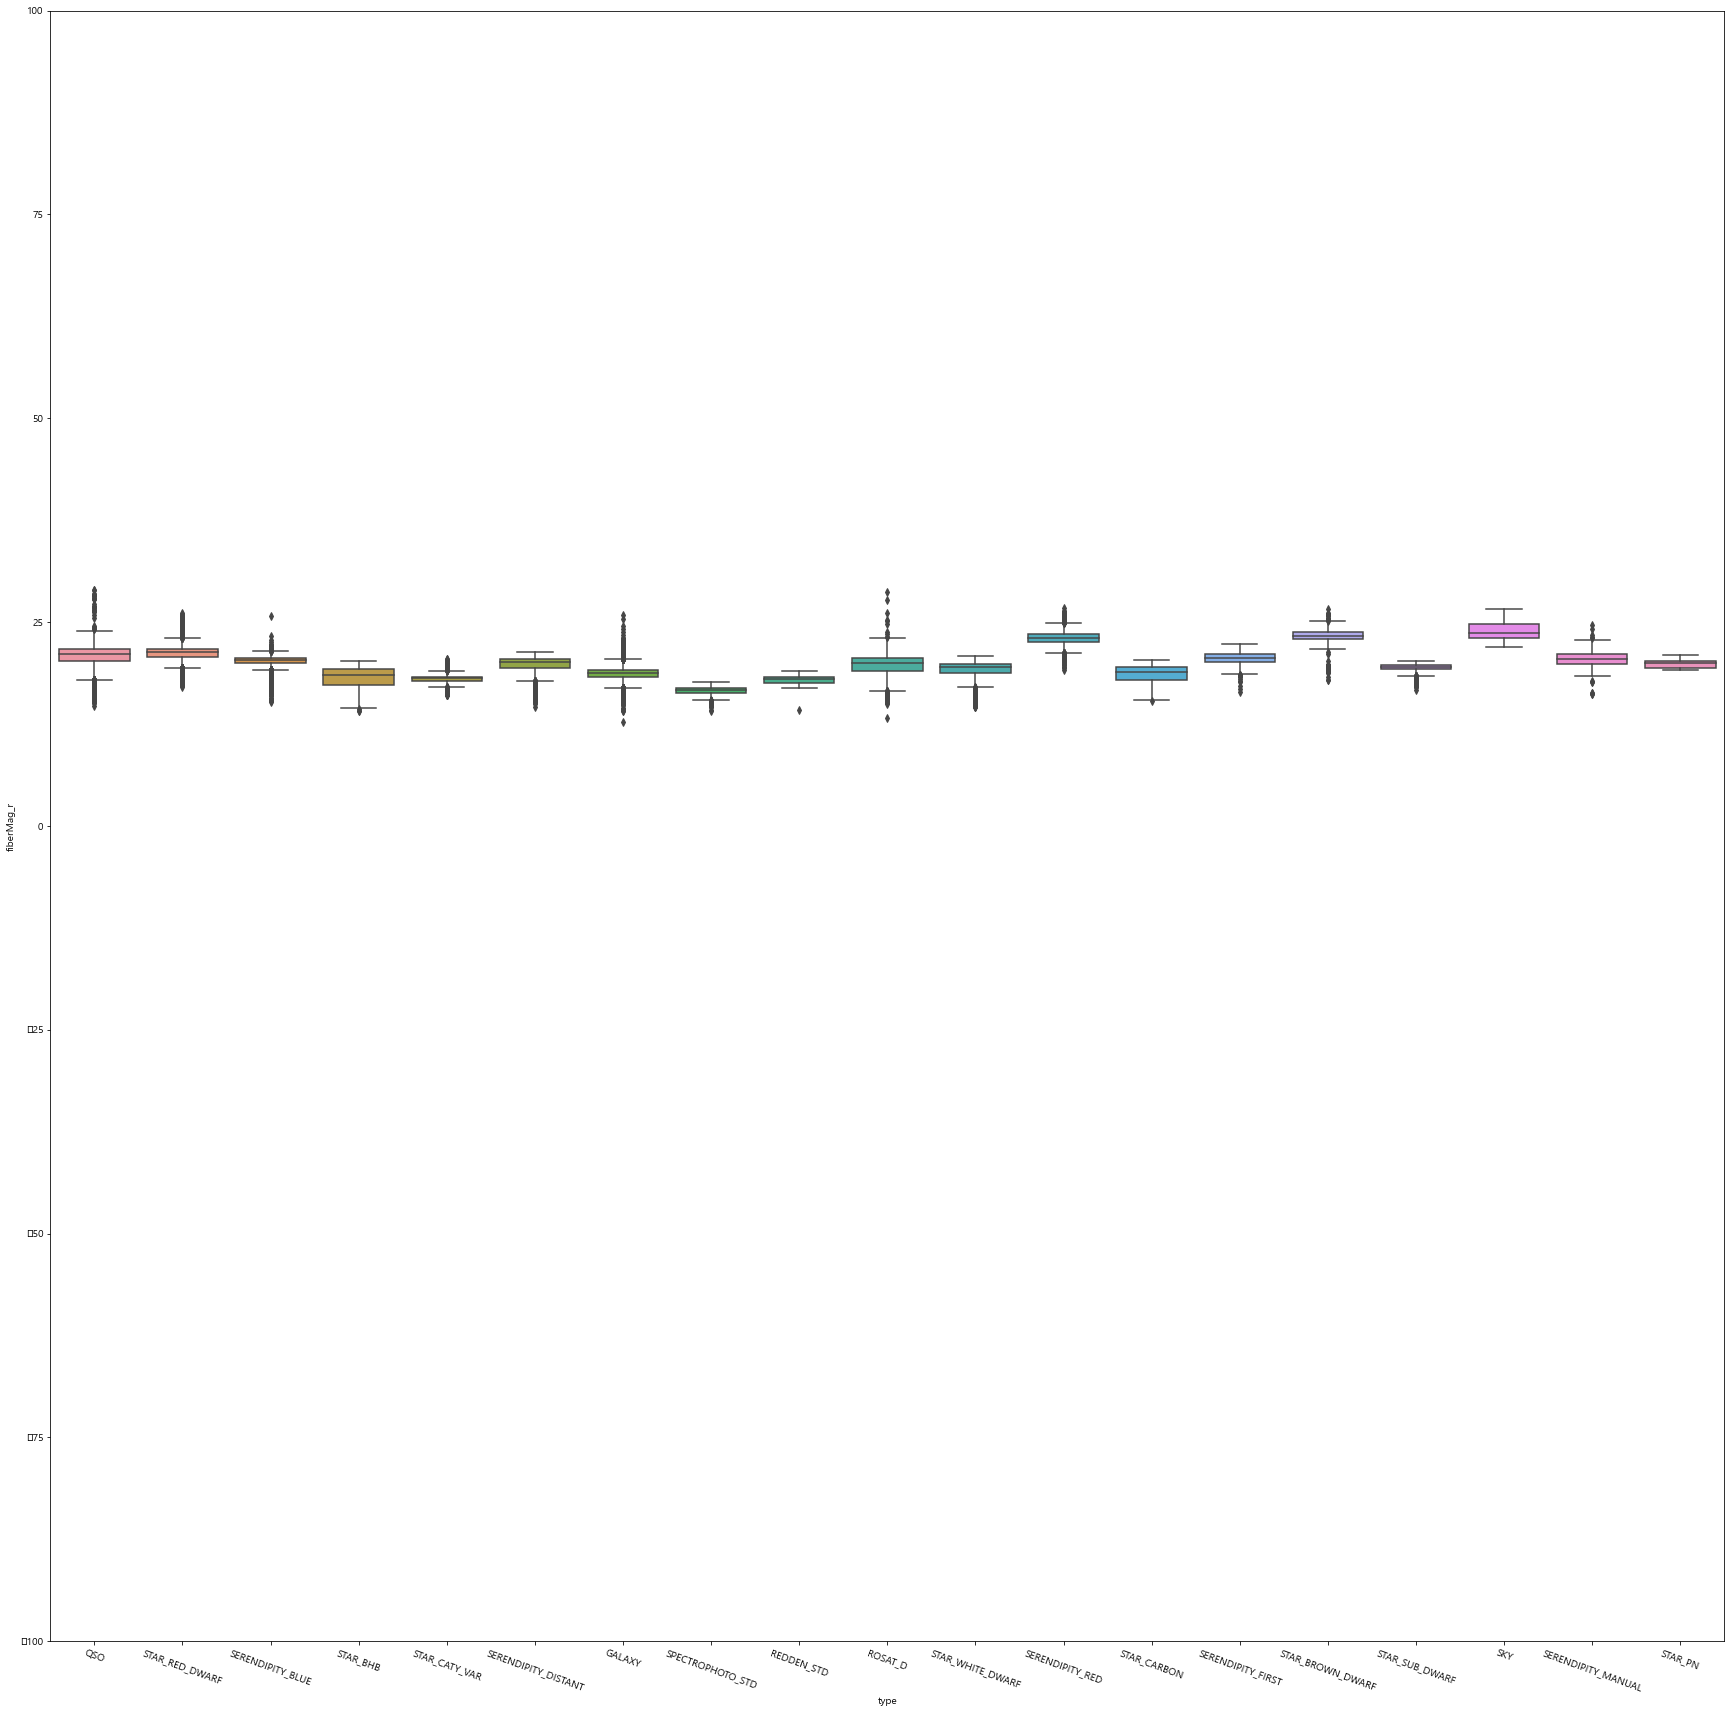

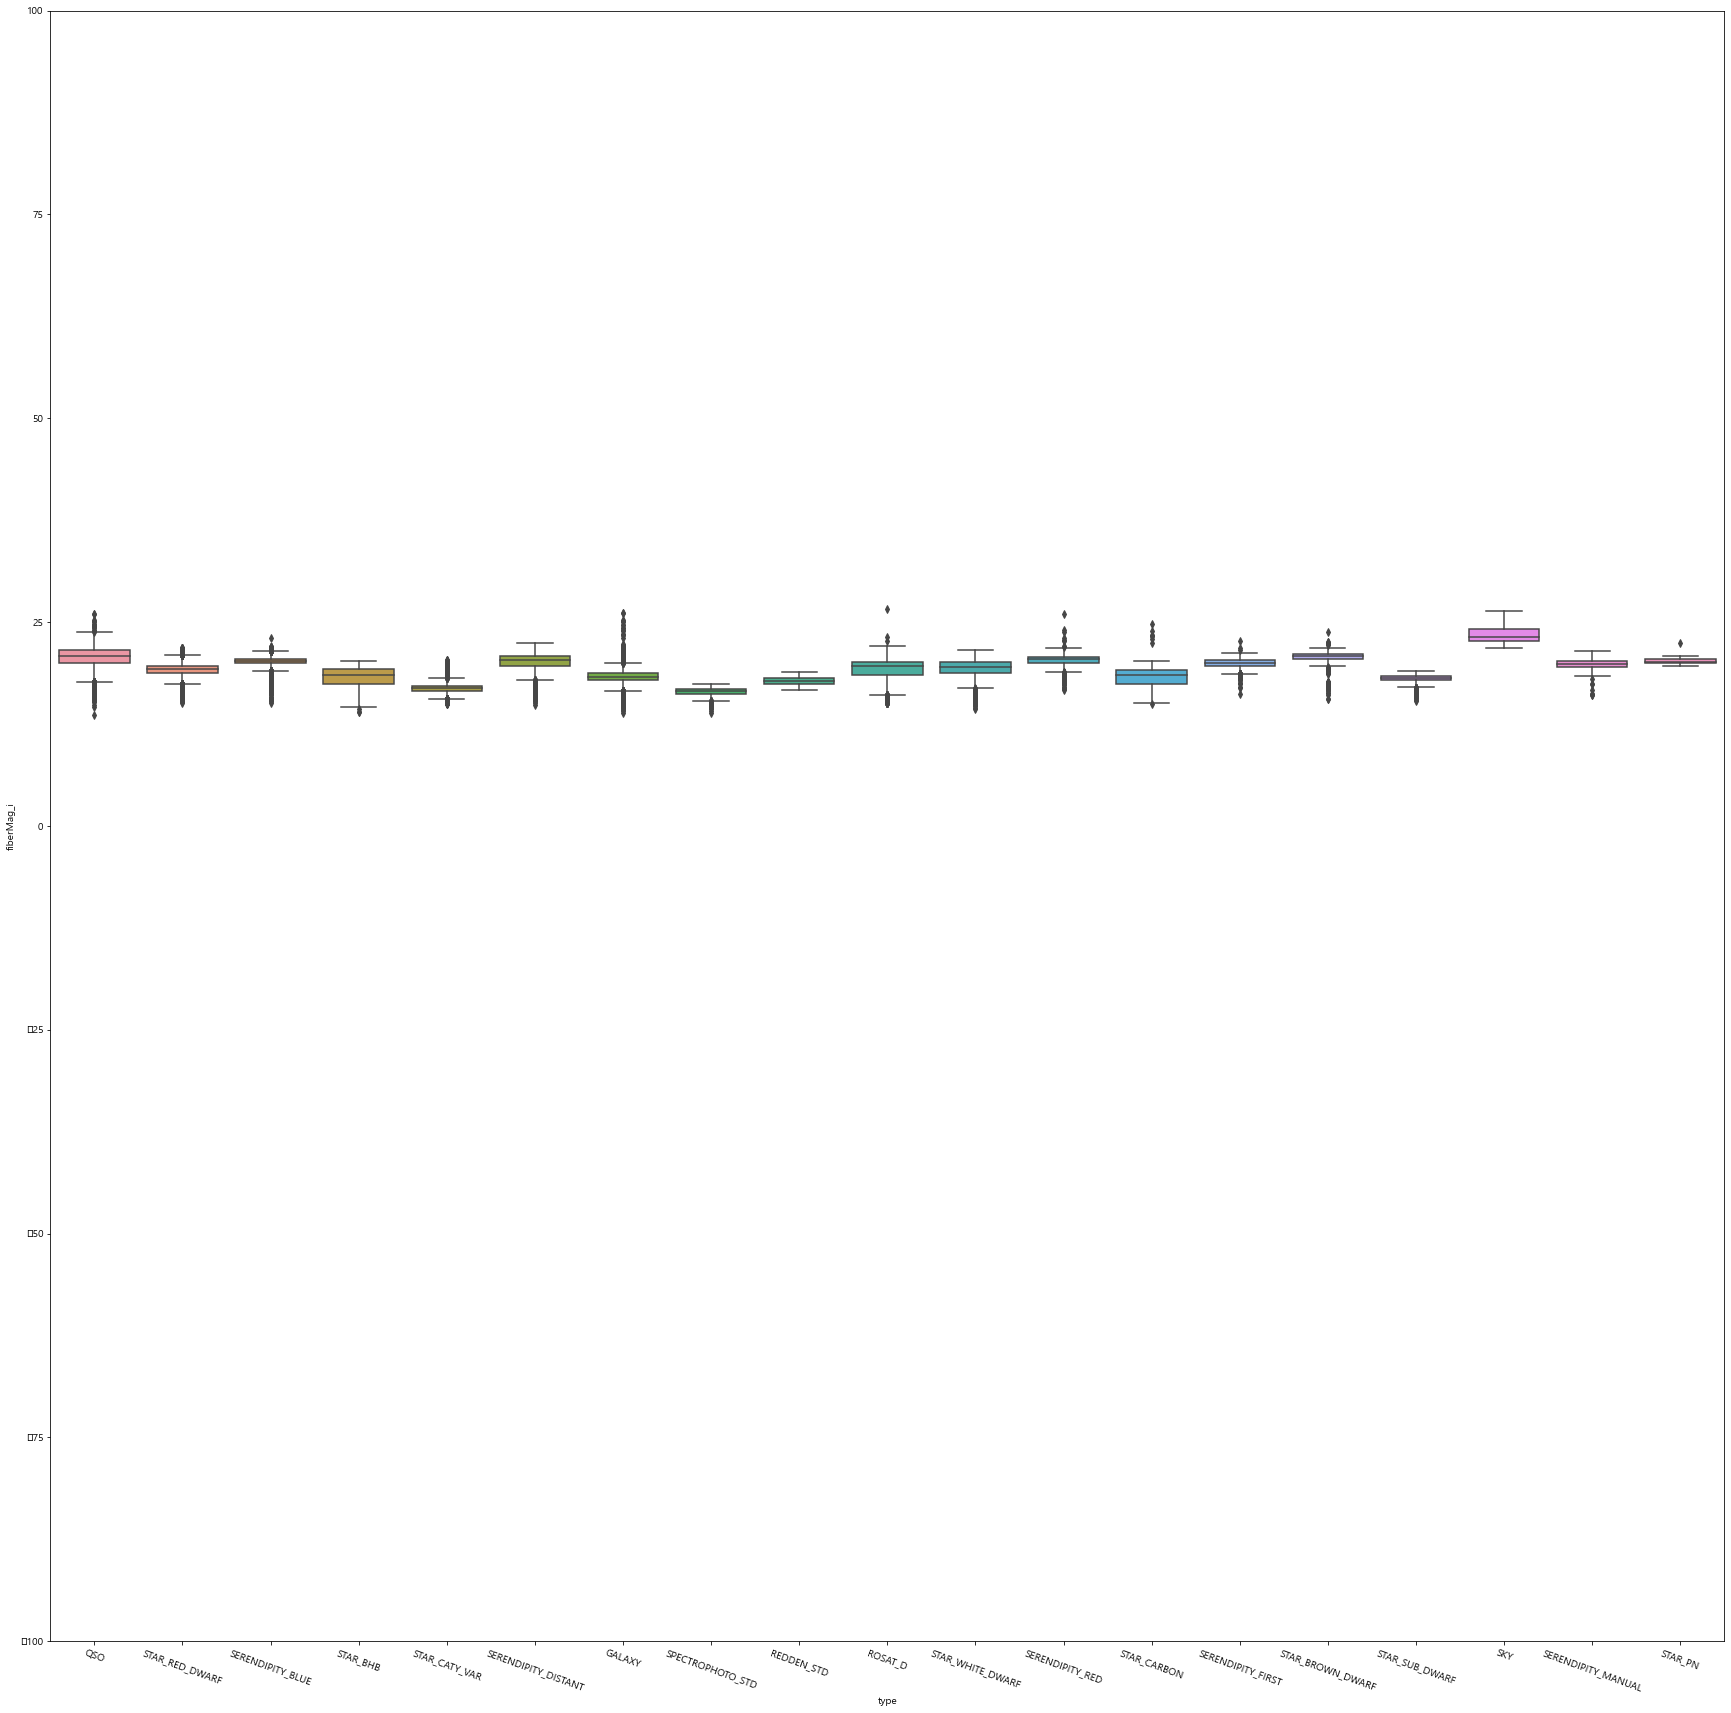

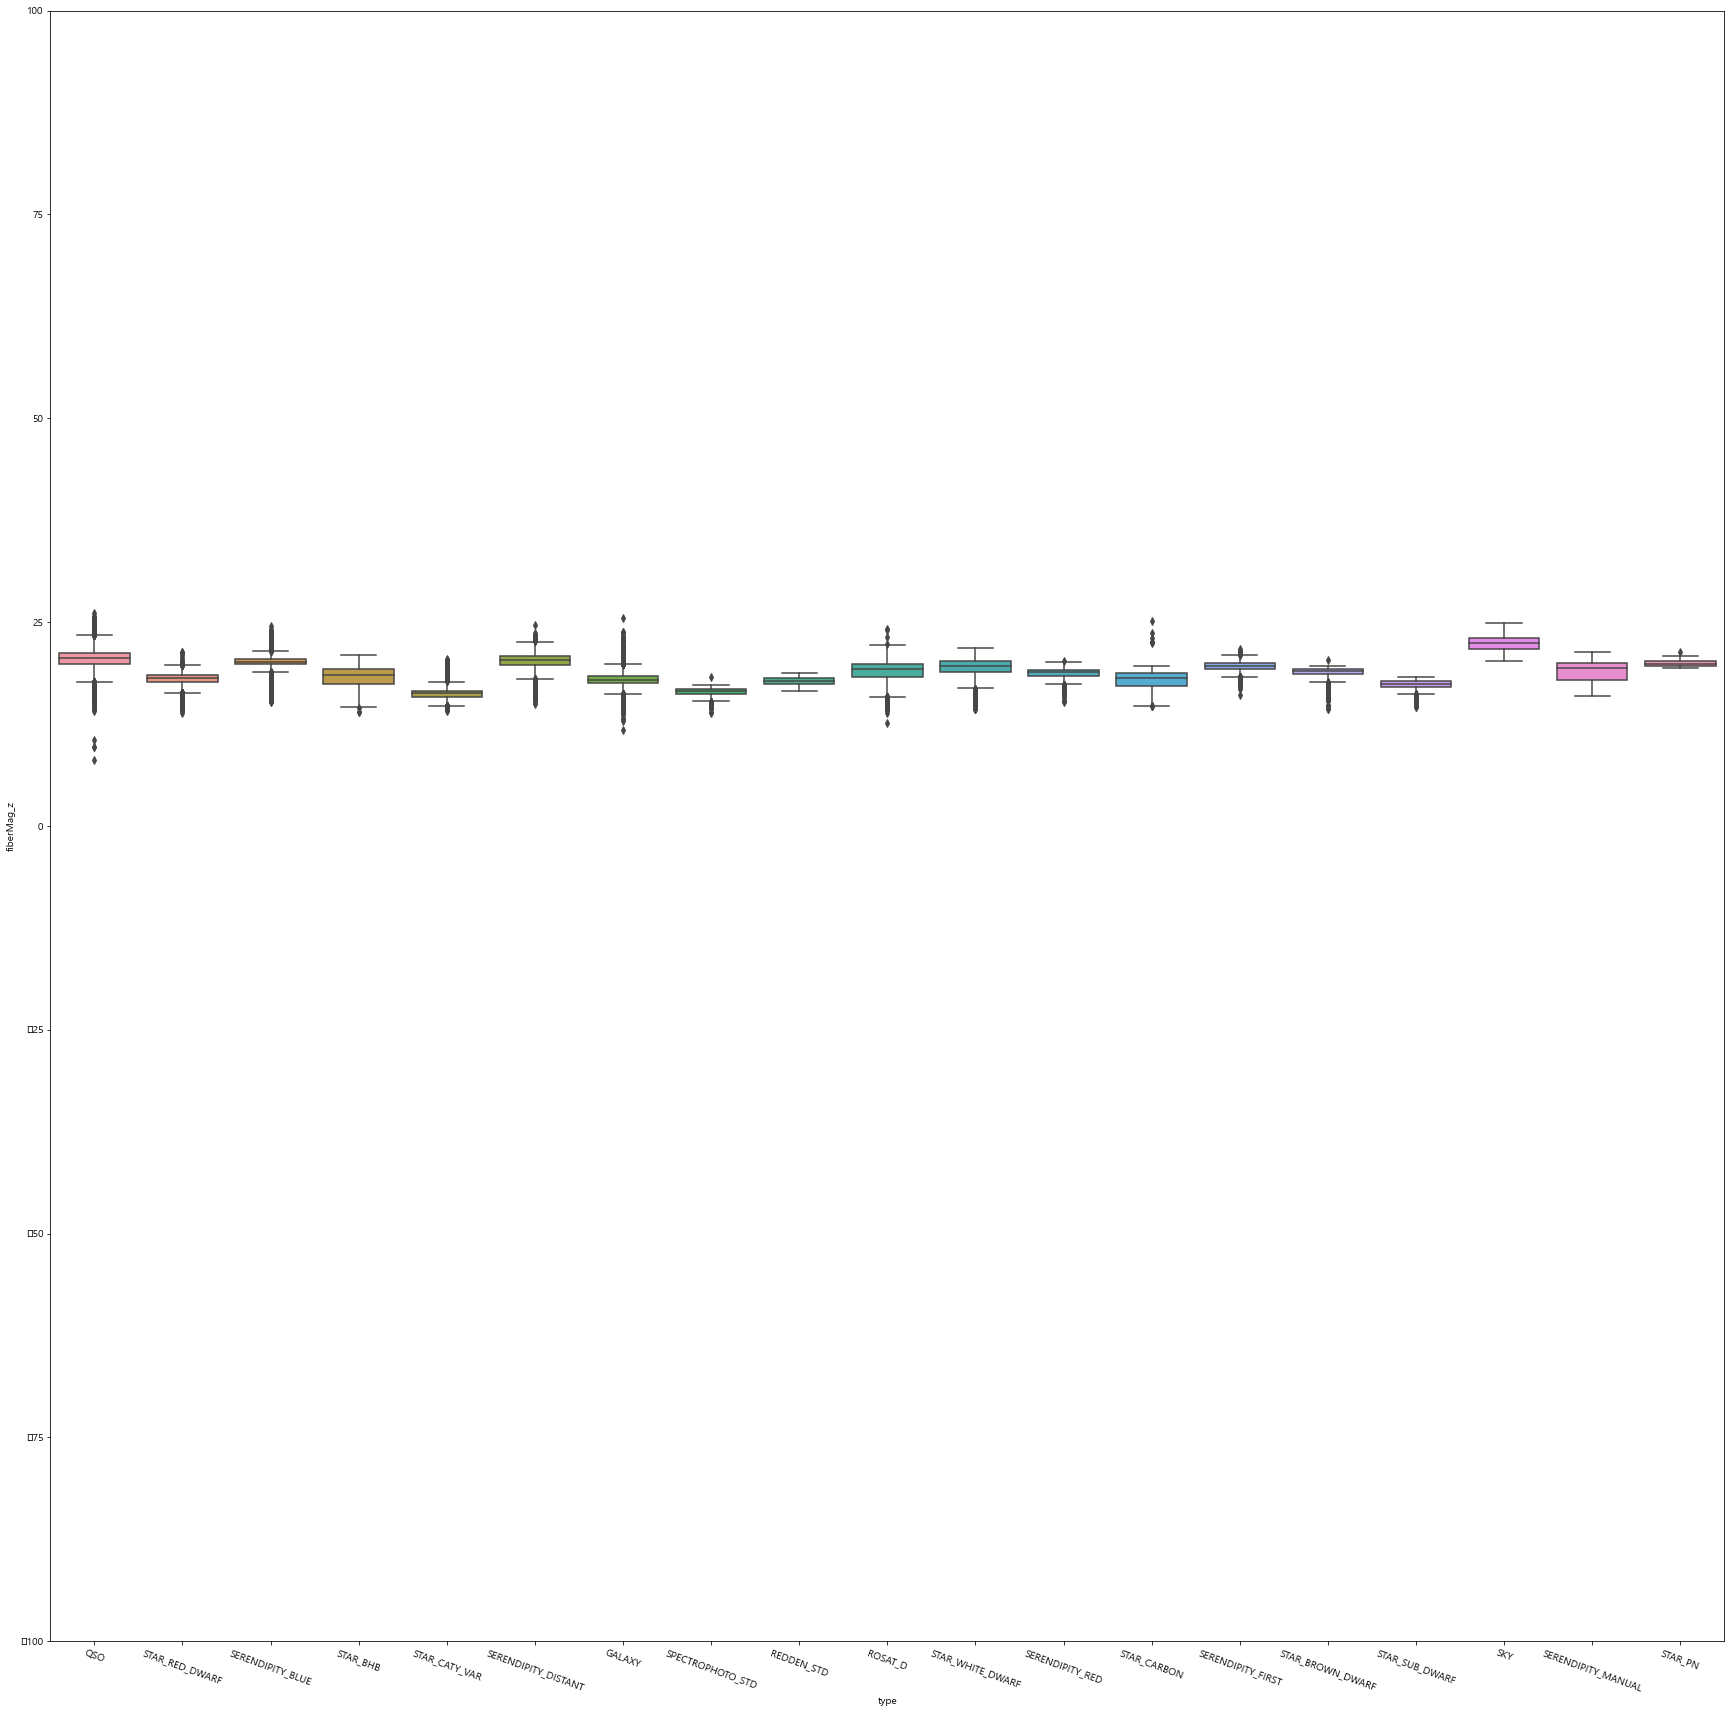

In [41]:
for col in fiberMag_cols:
    plt.figure(figsize=(30, 30))
    plt.xticks(rotation=340)
    plt.ylim((-100, 100))
    sns.boxplot(data=train, x='type', y=col)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


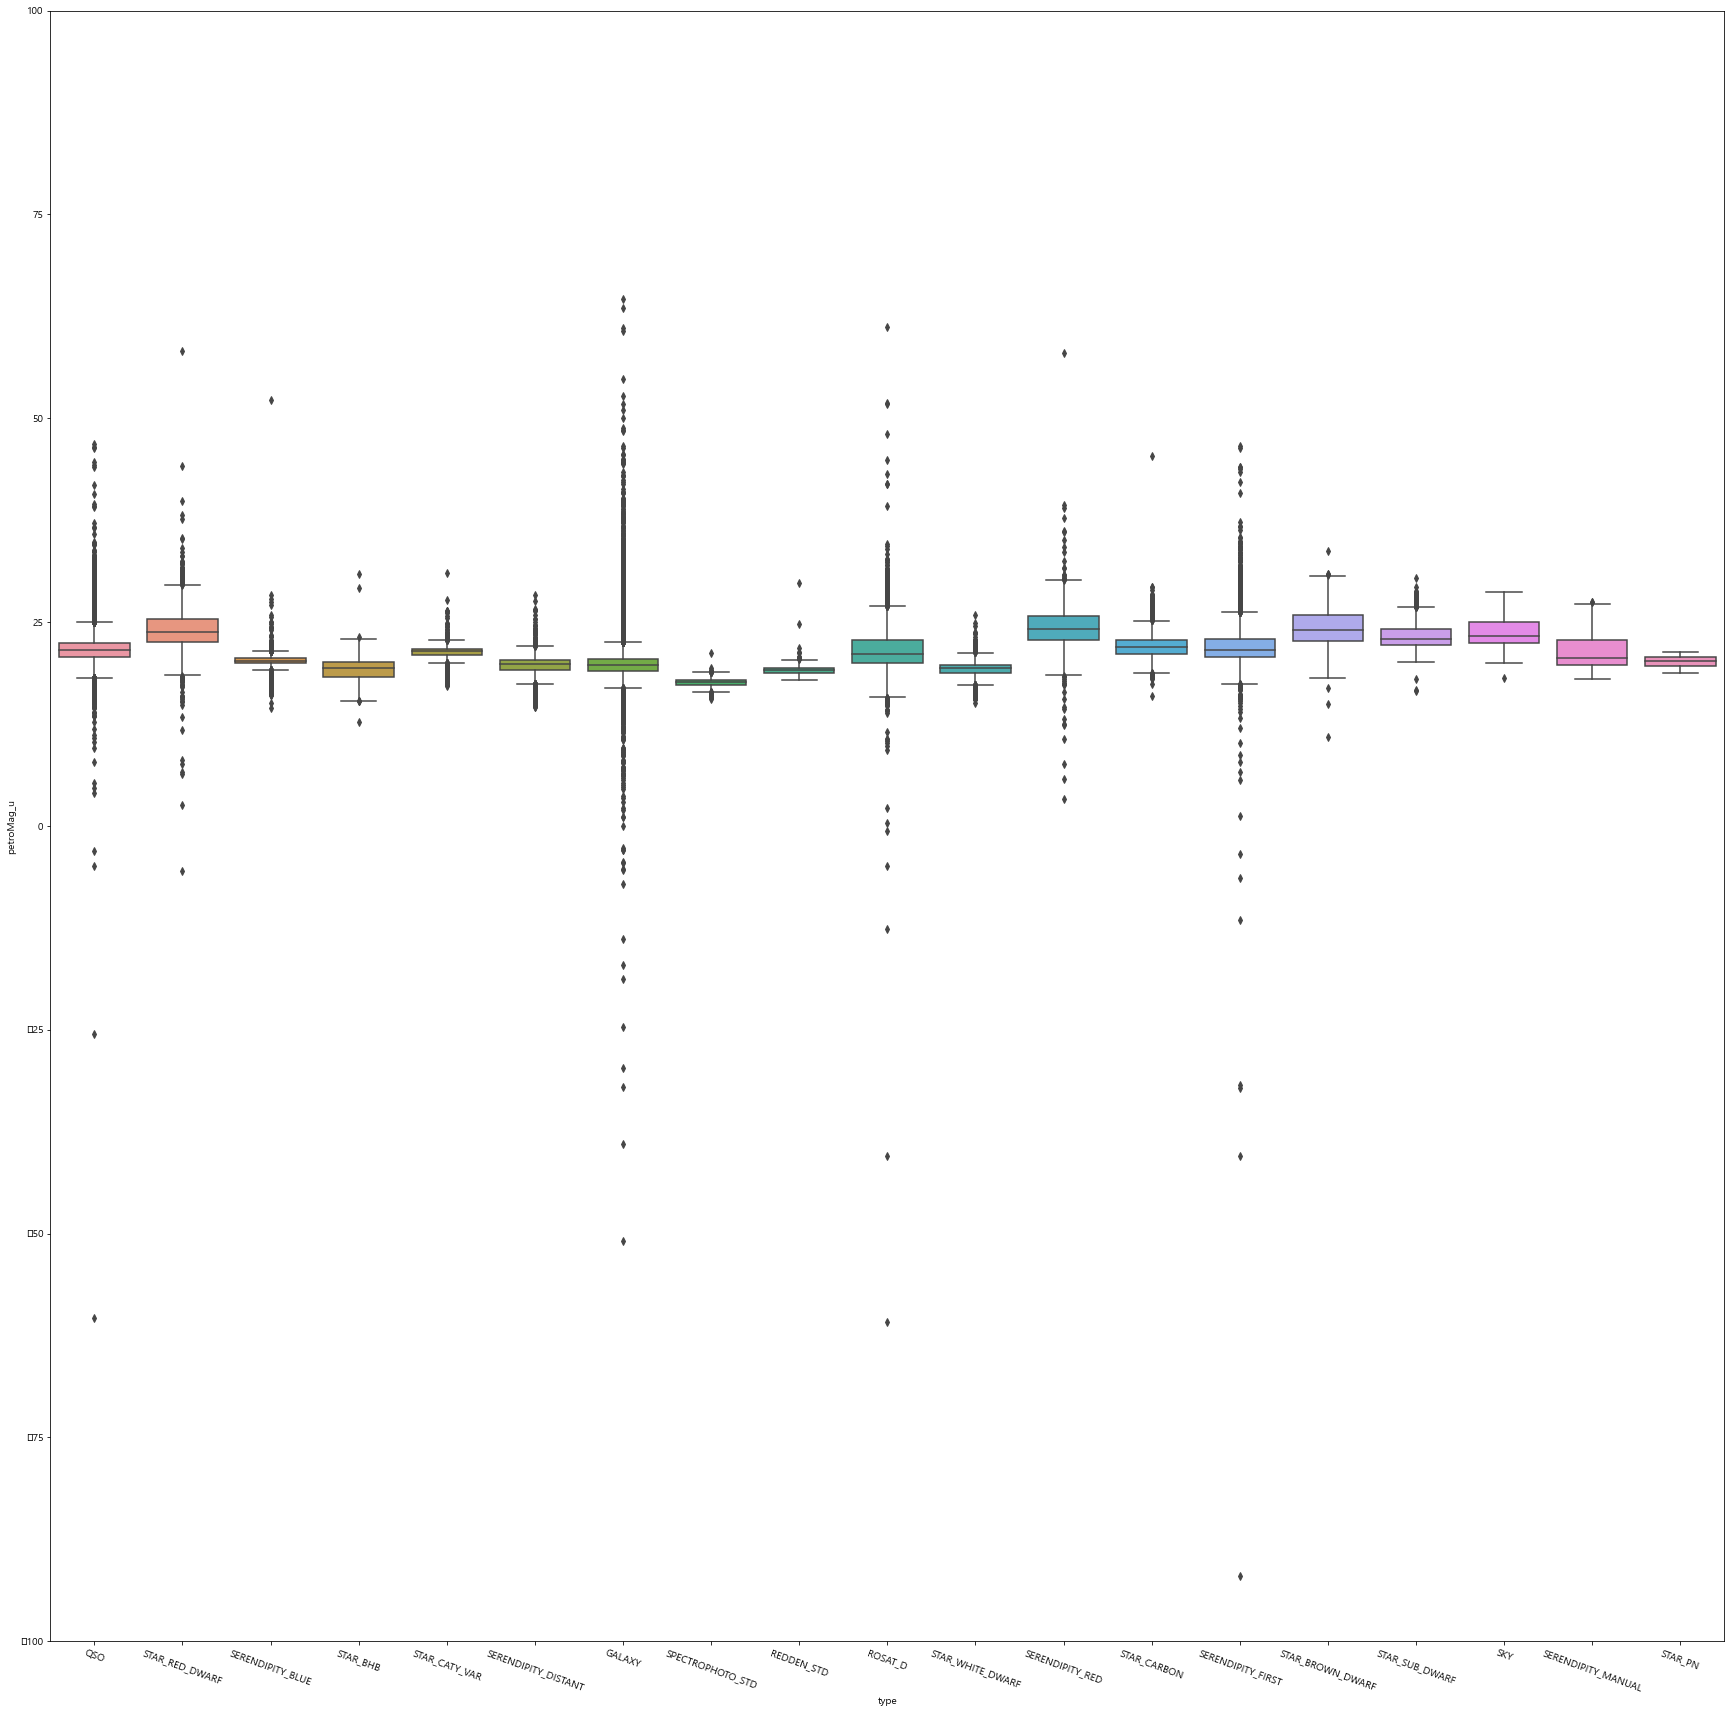

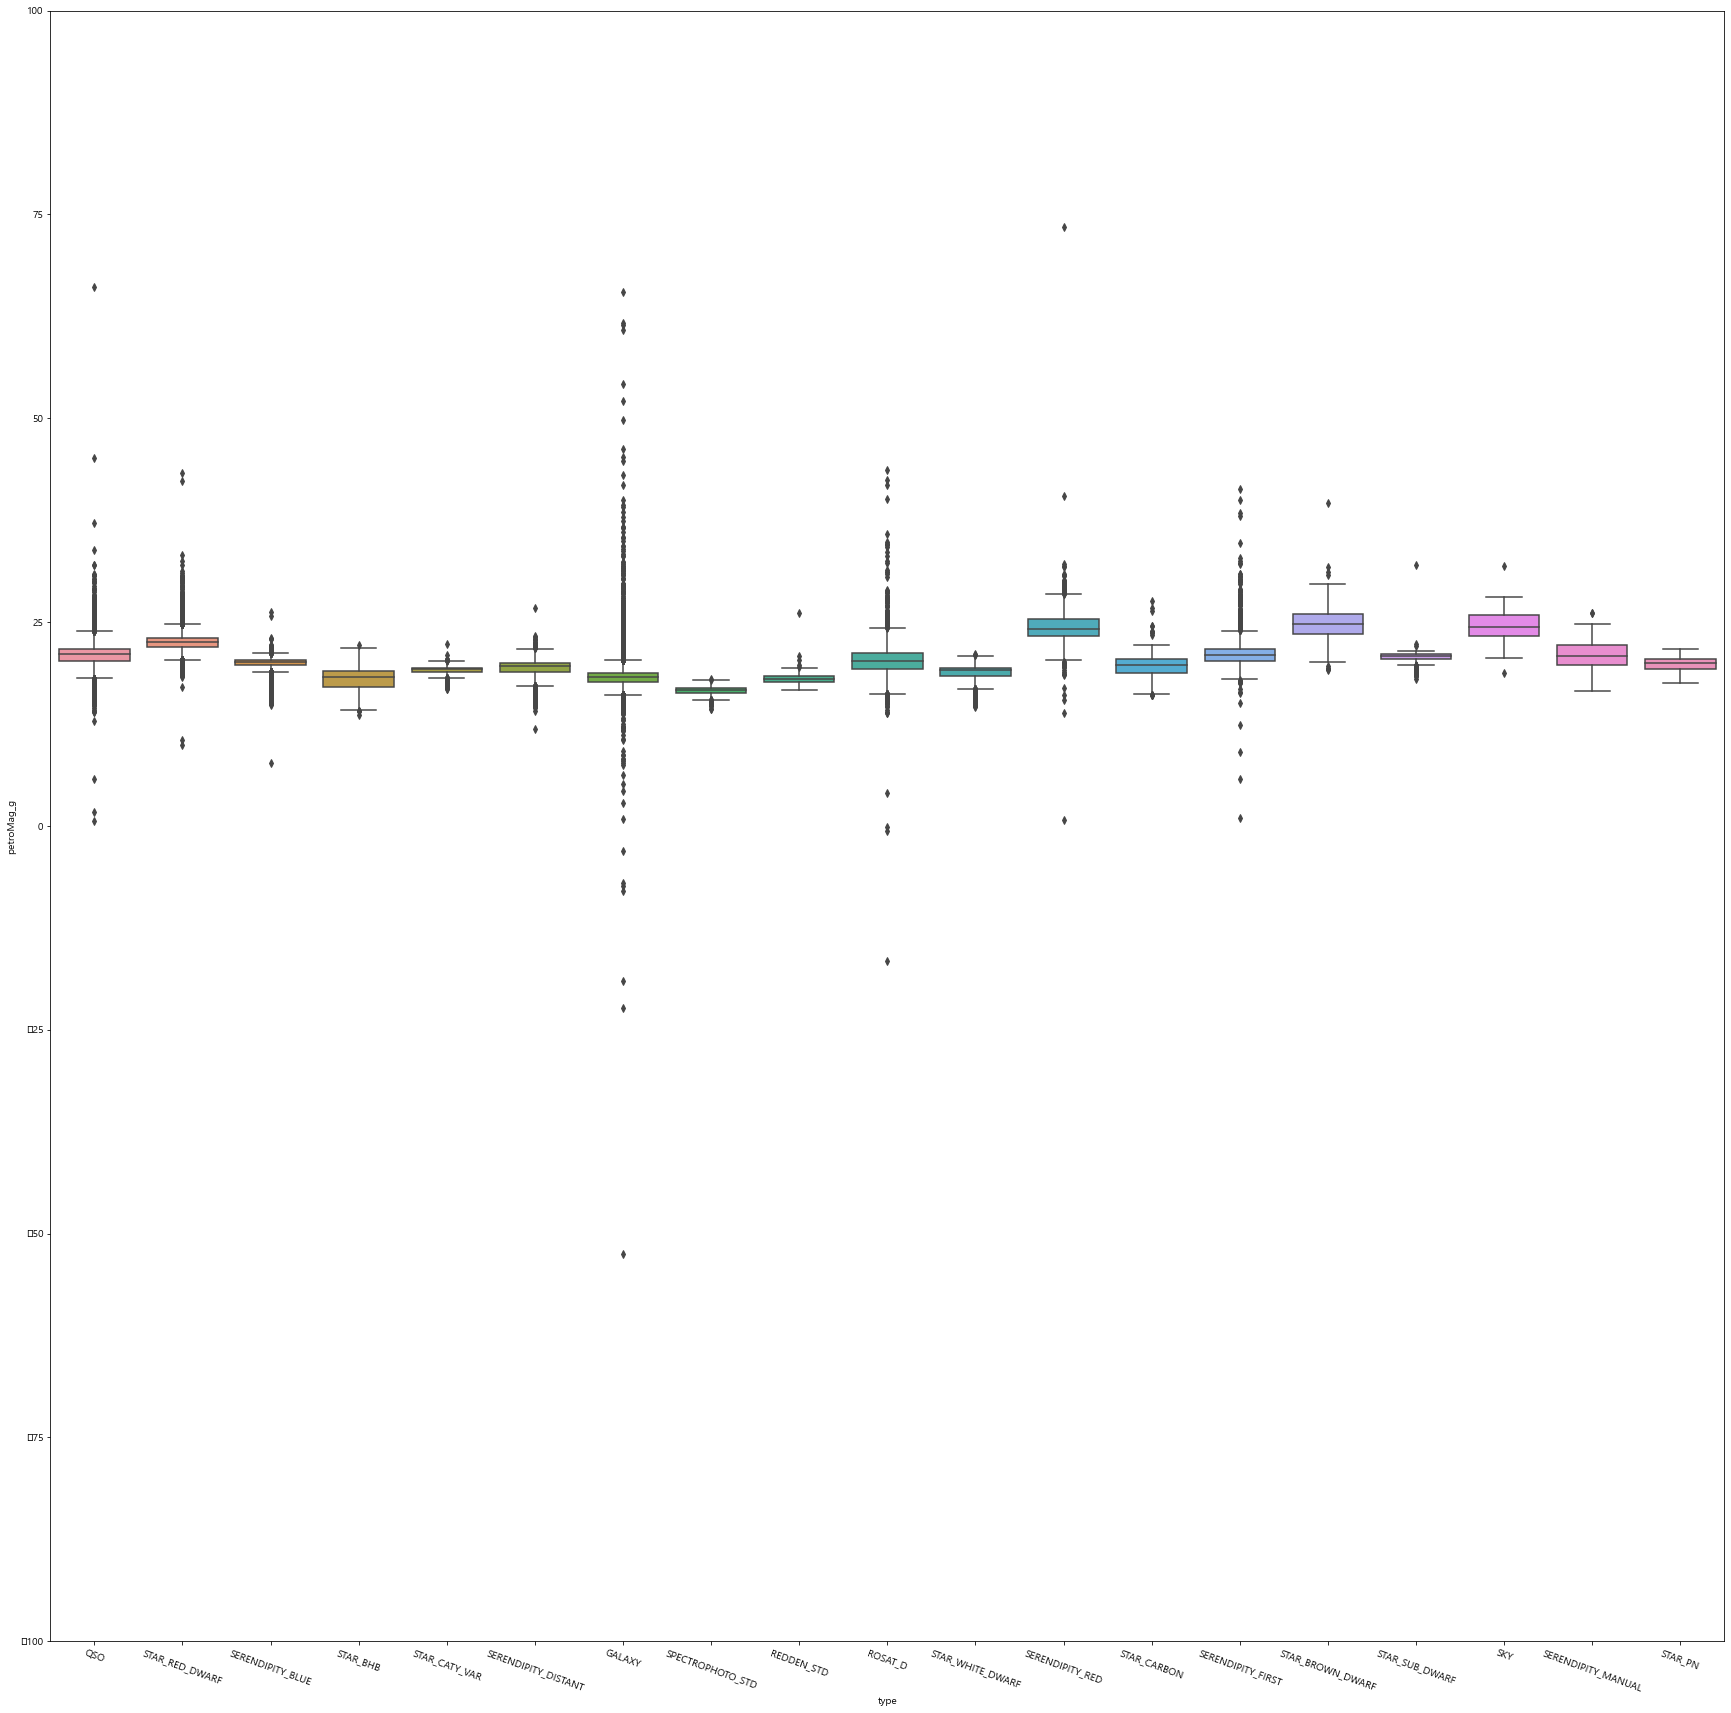

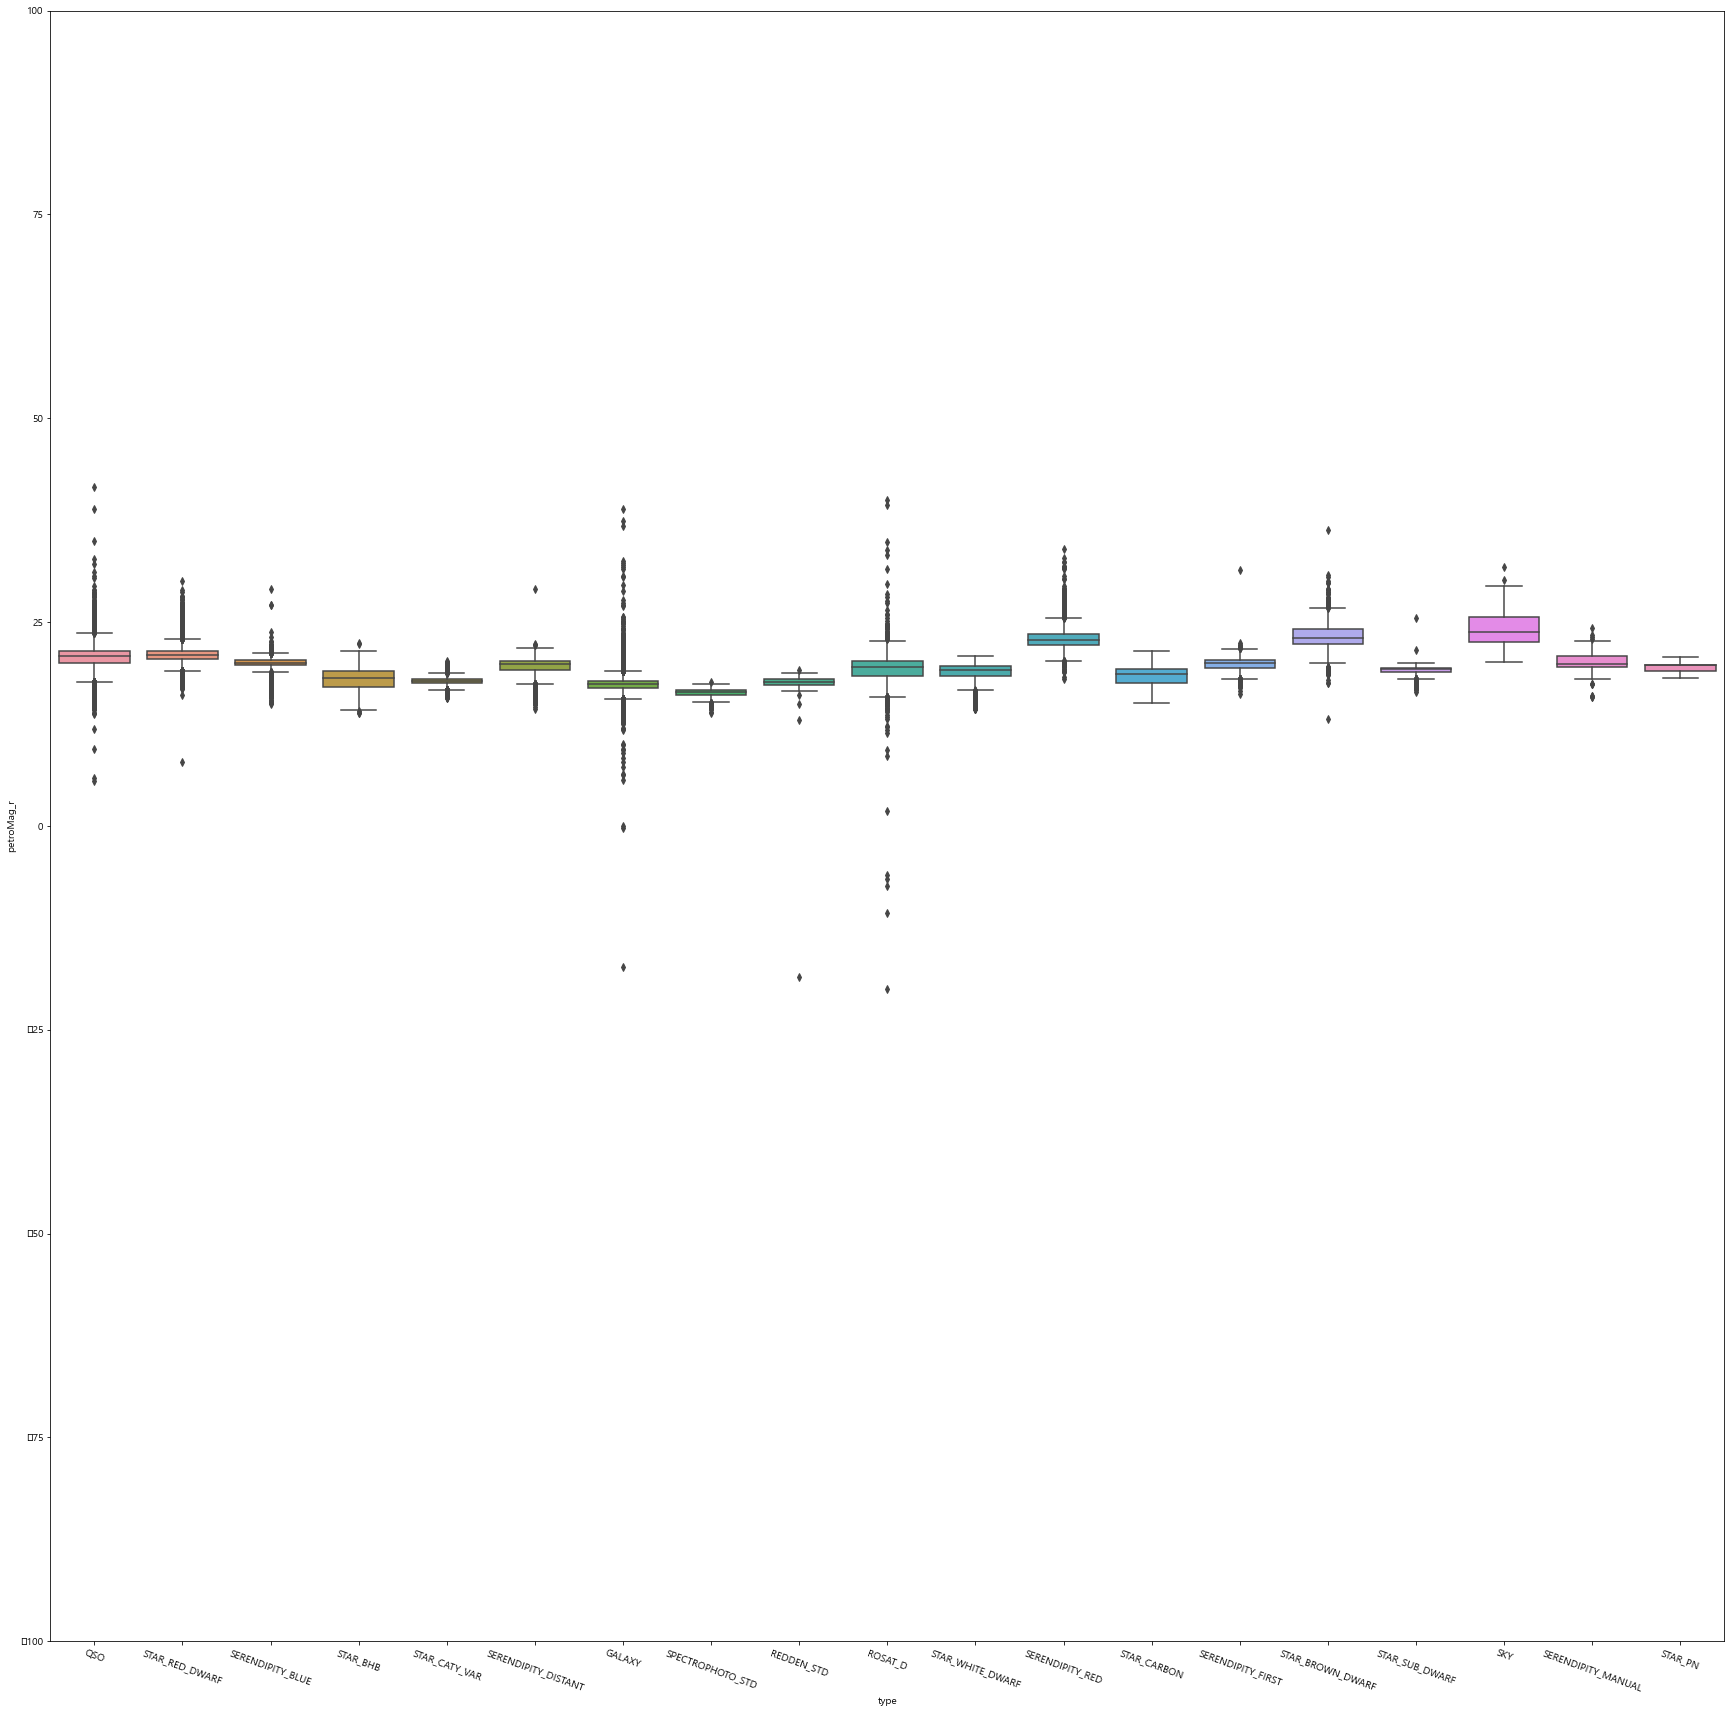

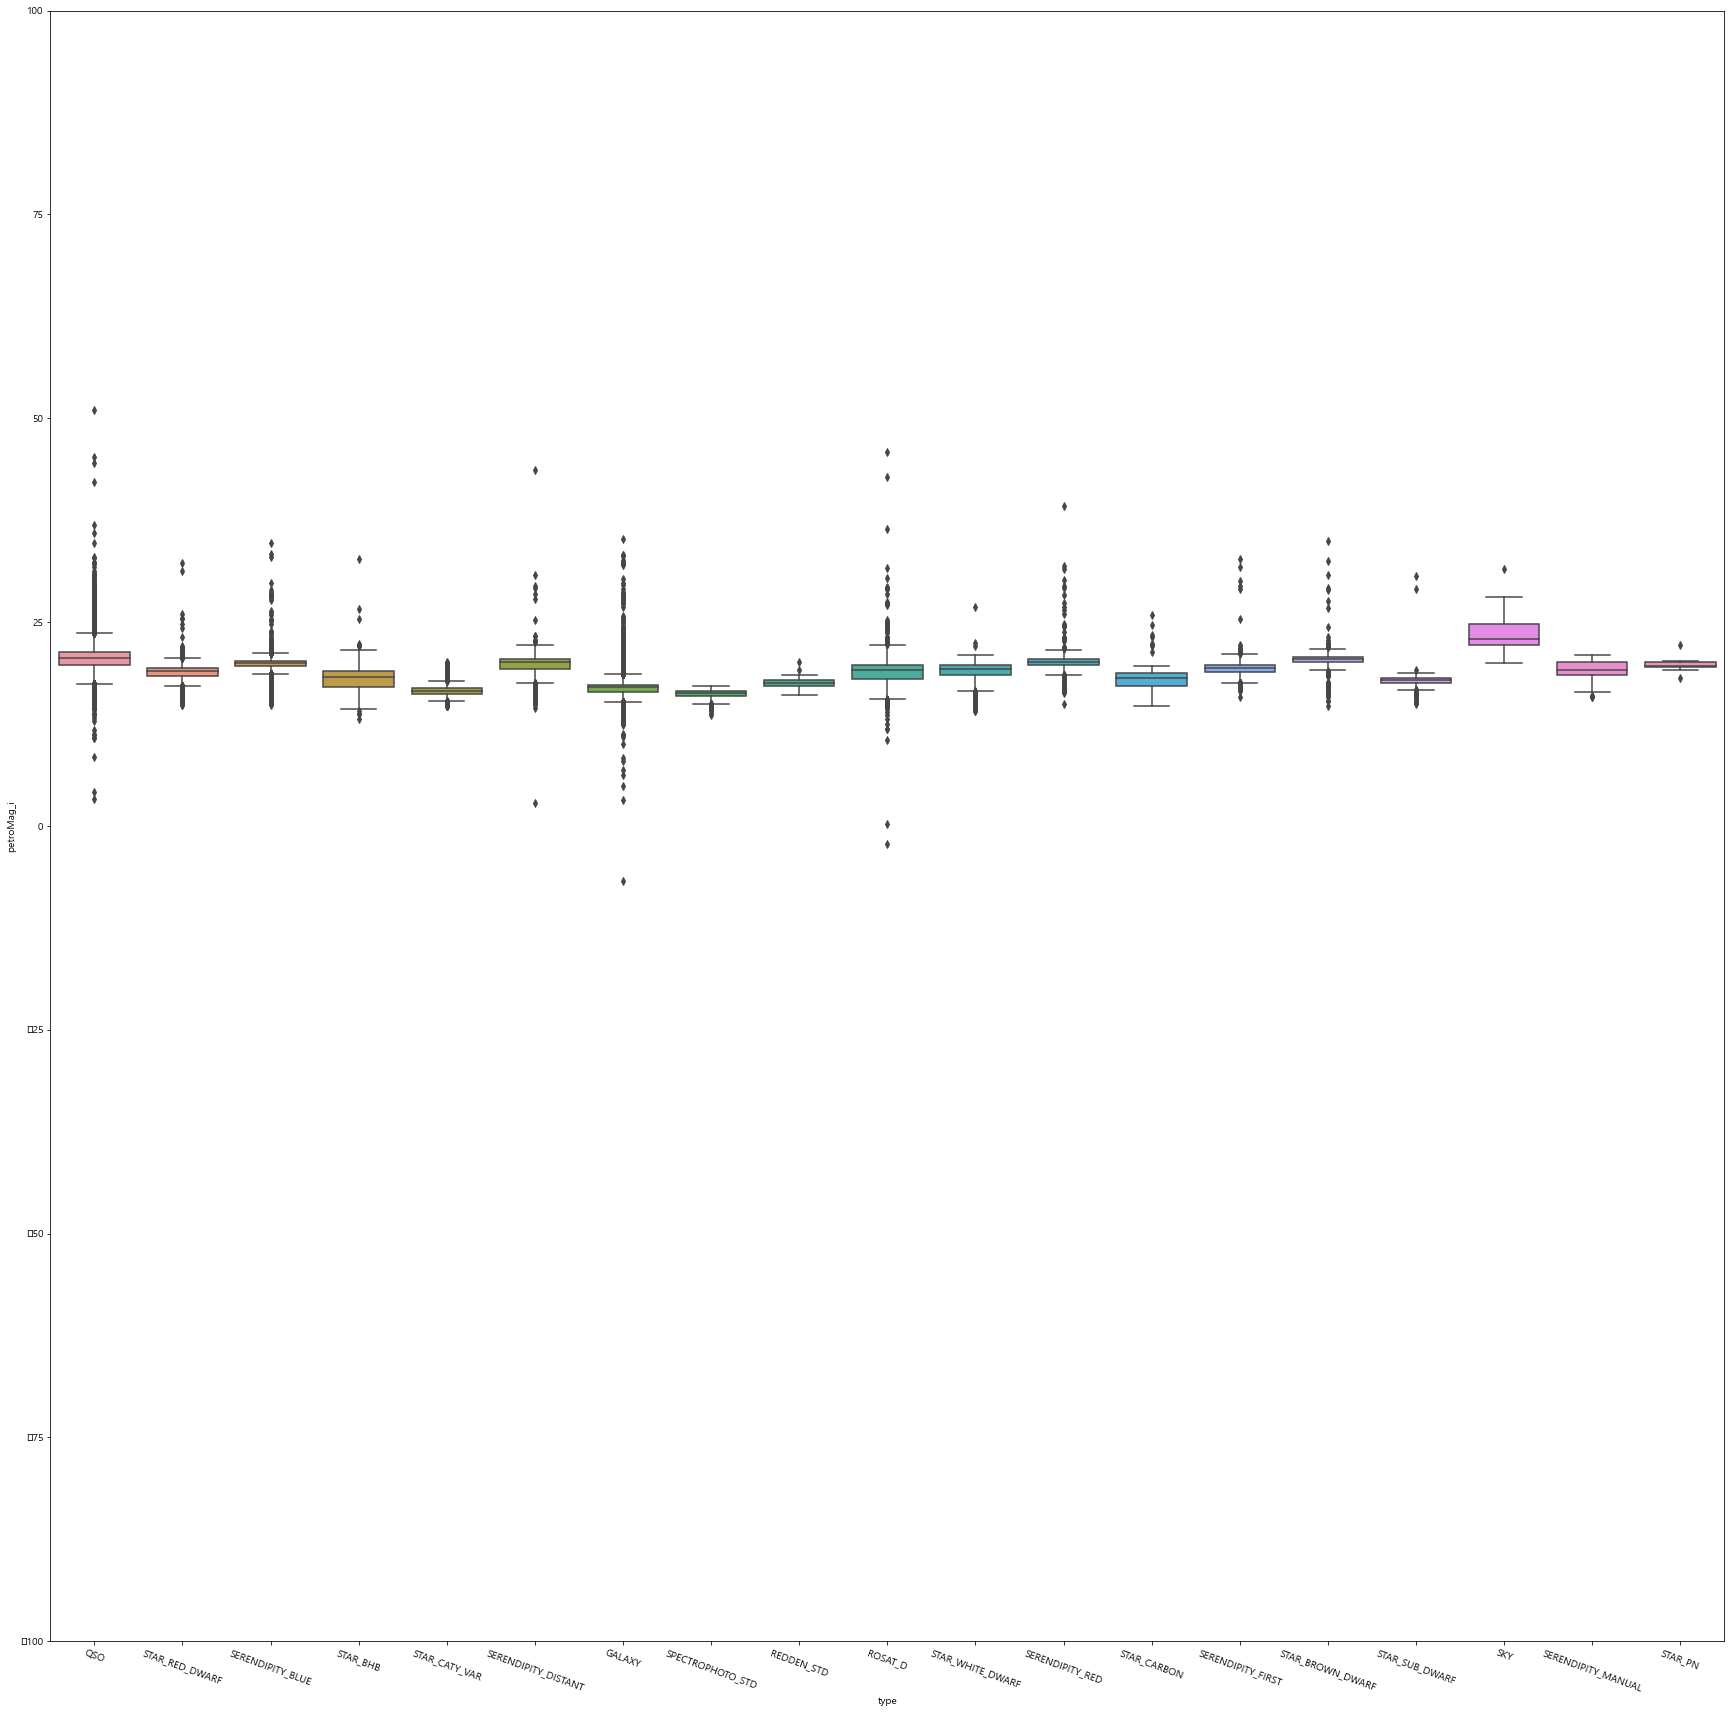

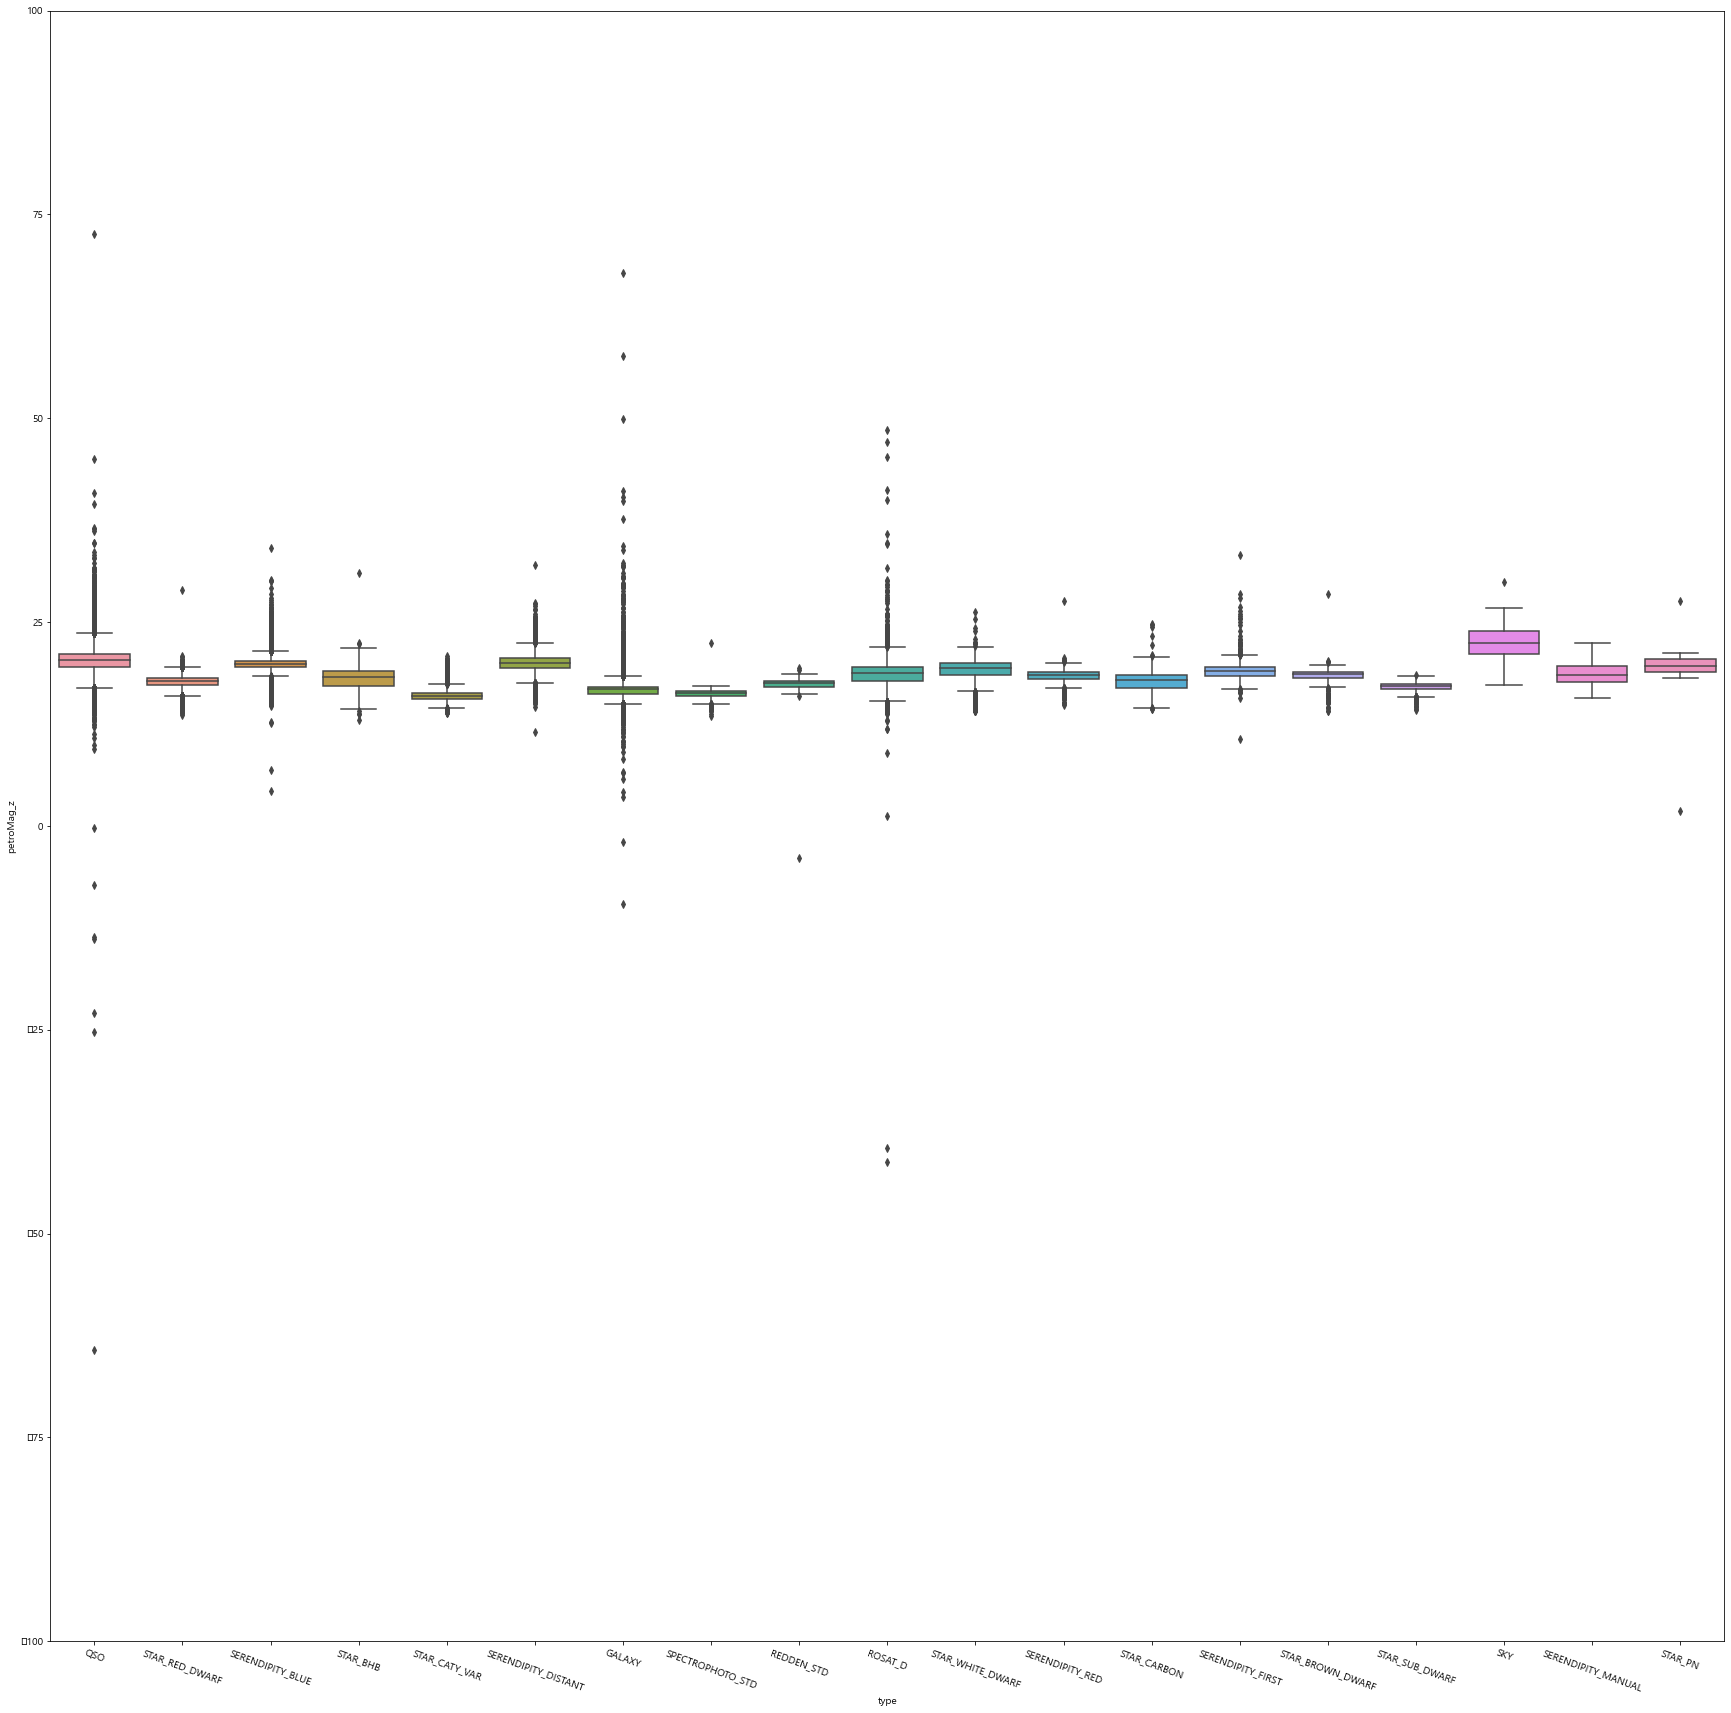

In [42]:
for col in petroMag_cols:
    plt.figure(figsize=(30, 30))
    plt.xticks(rotation=340)
    plt.ylim((-100, 100))
    sns.boxplot(data=train, x='type', y=col)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


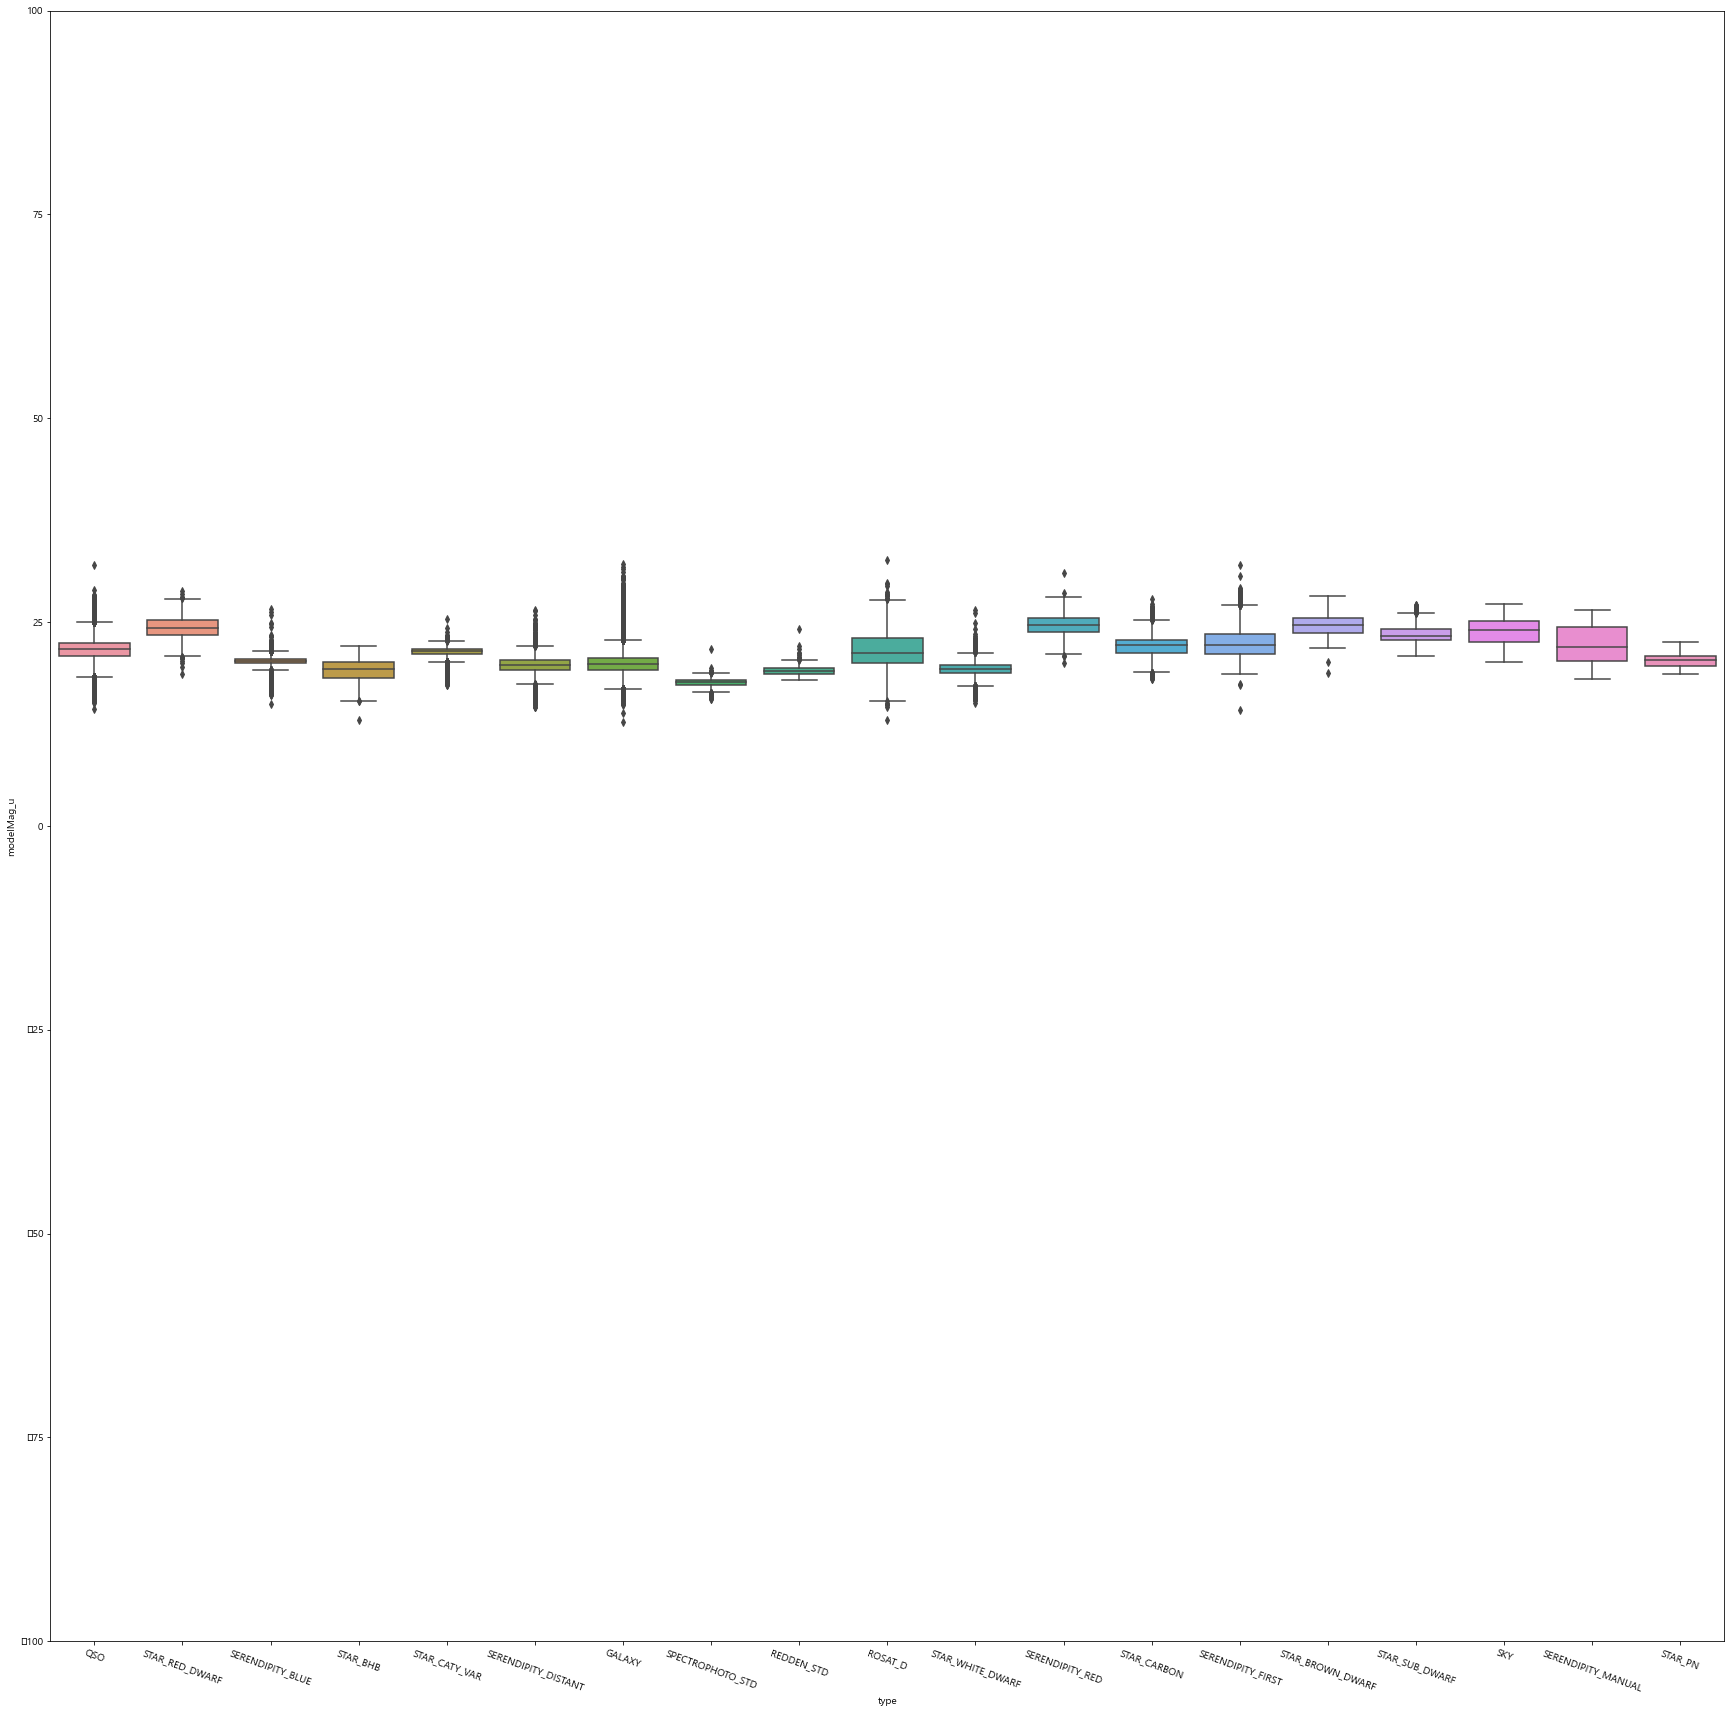

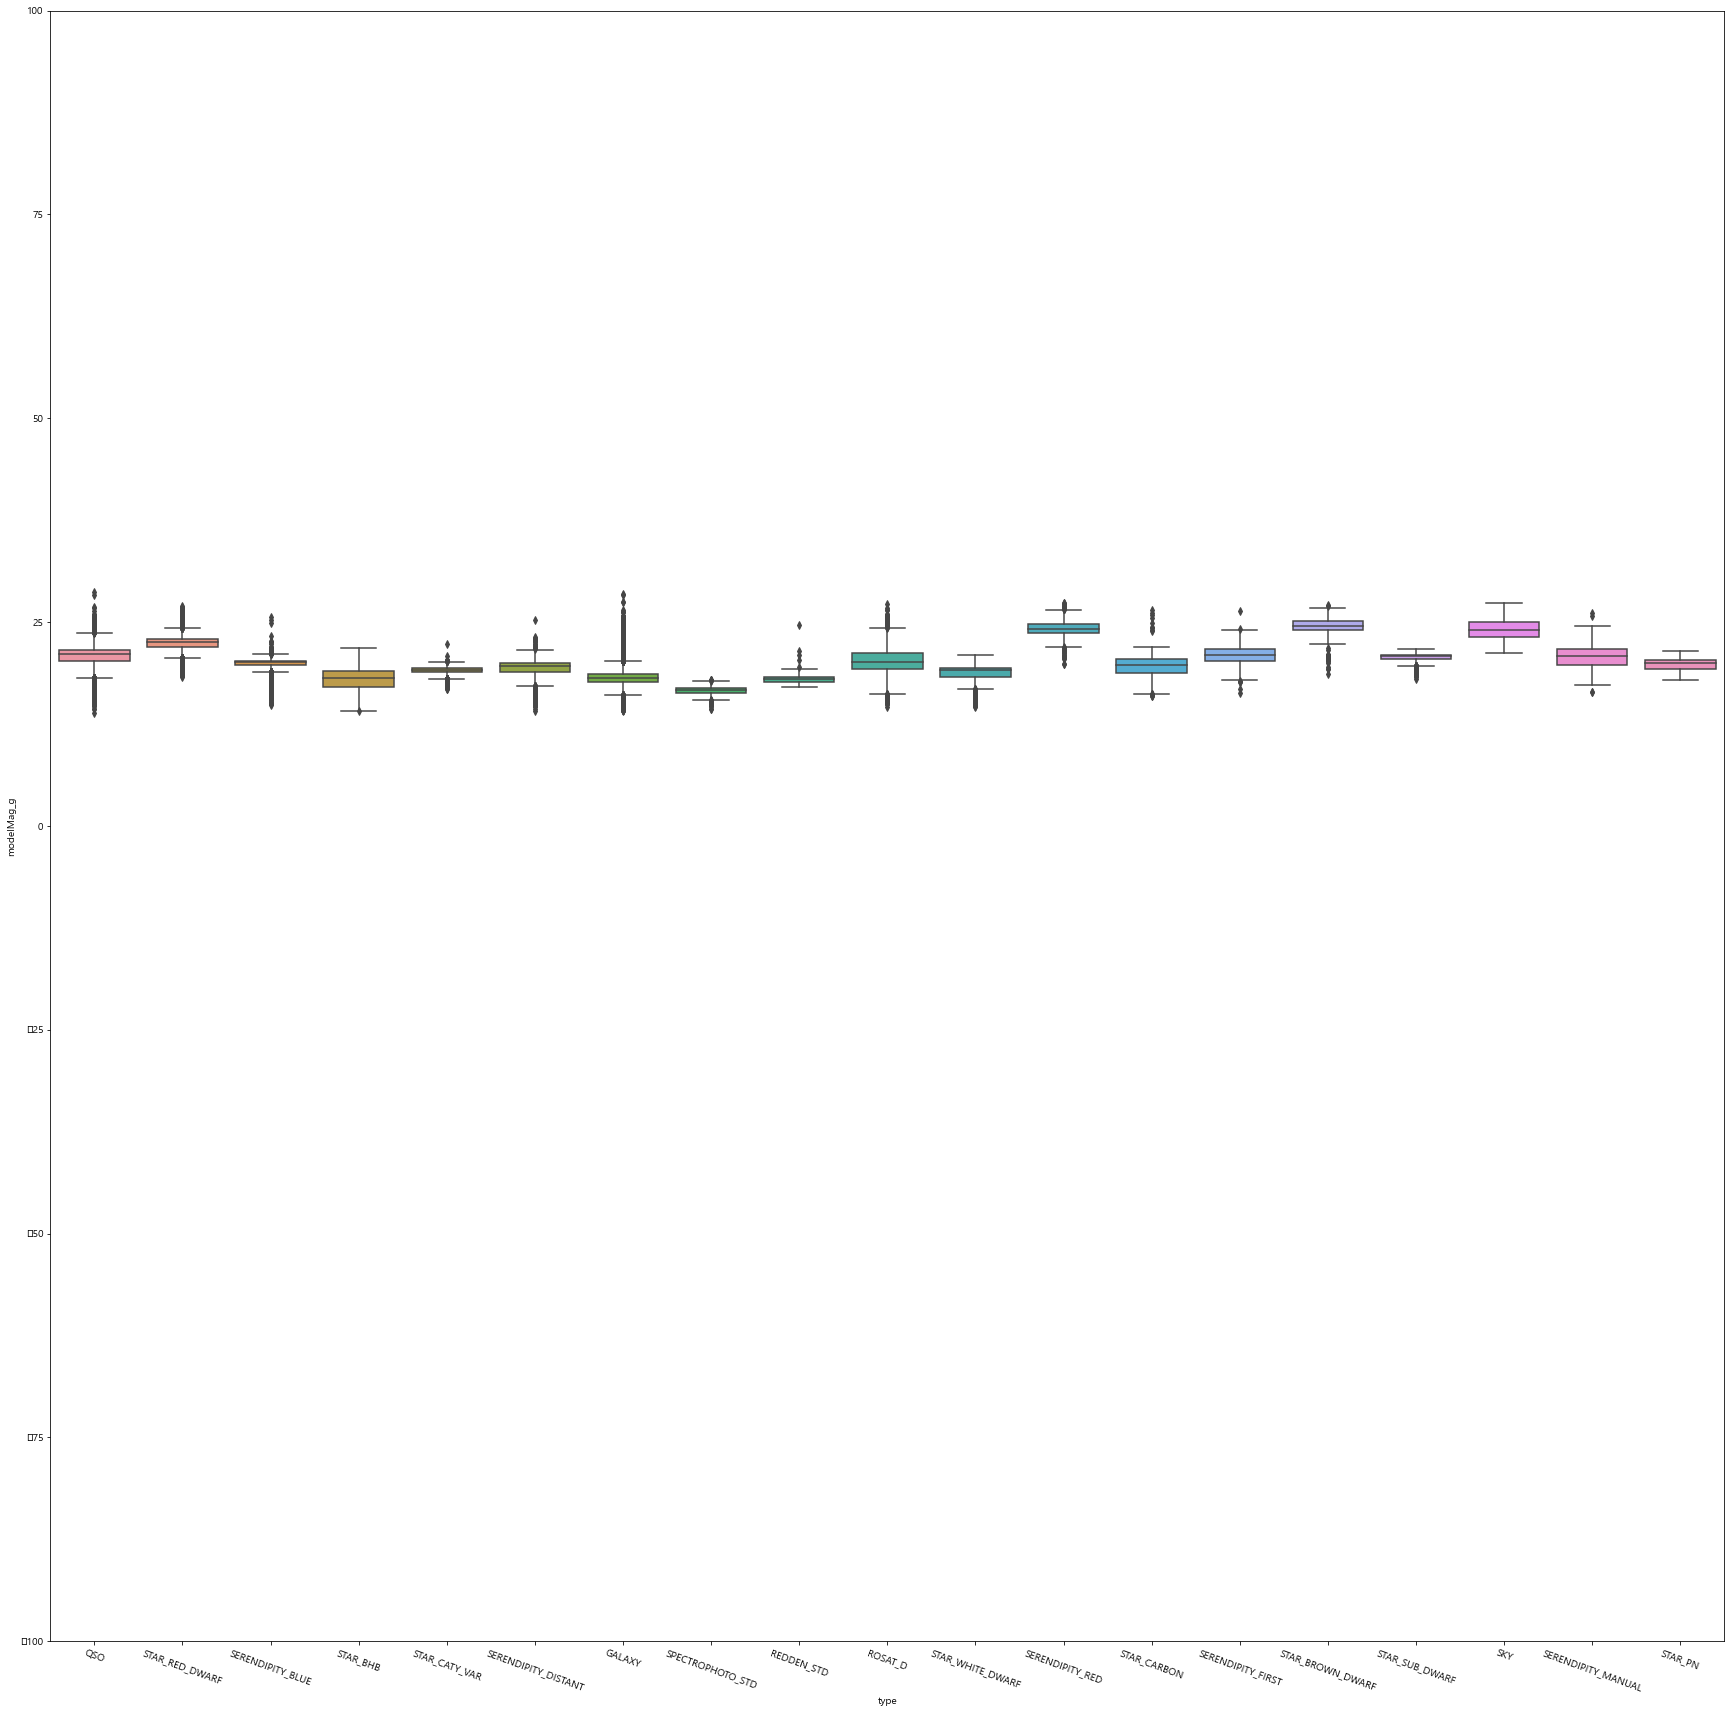

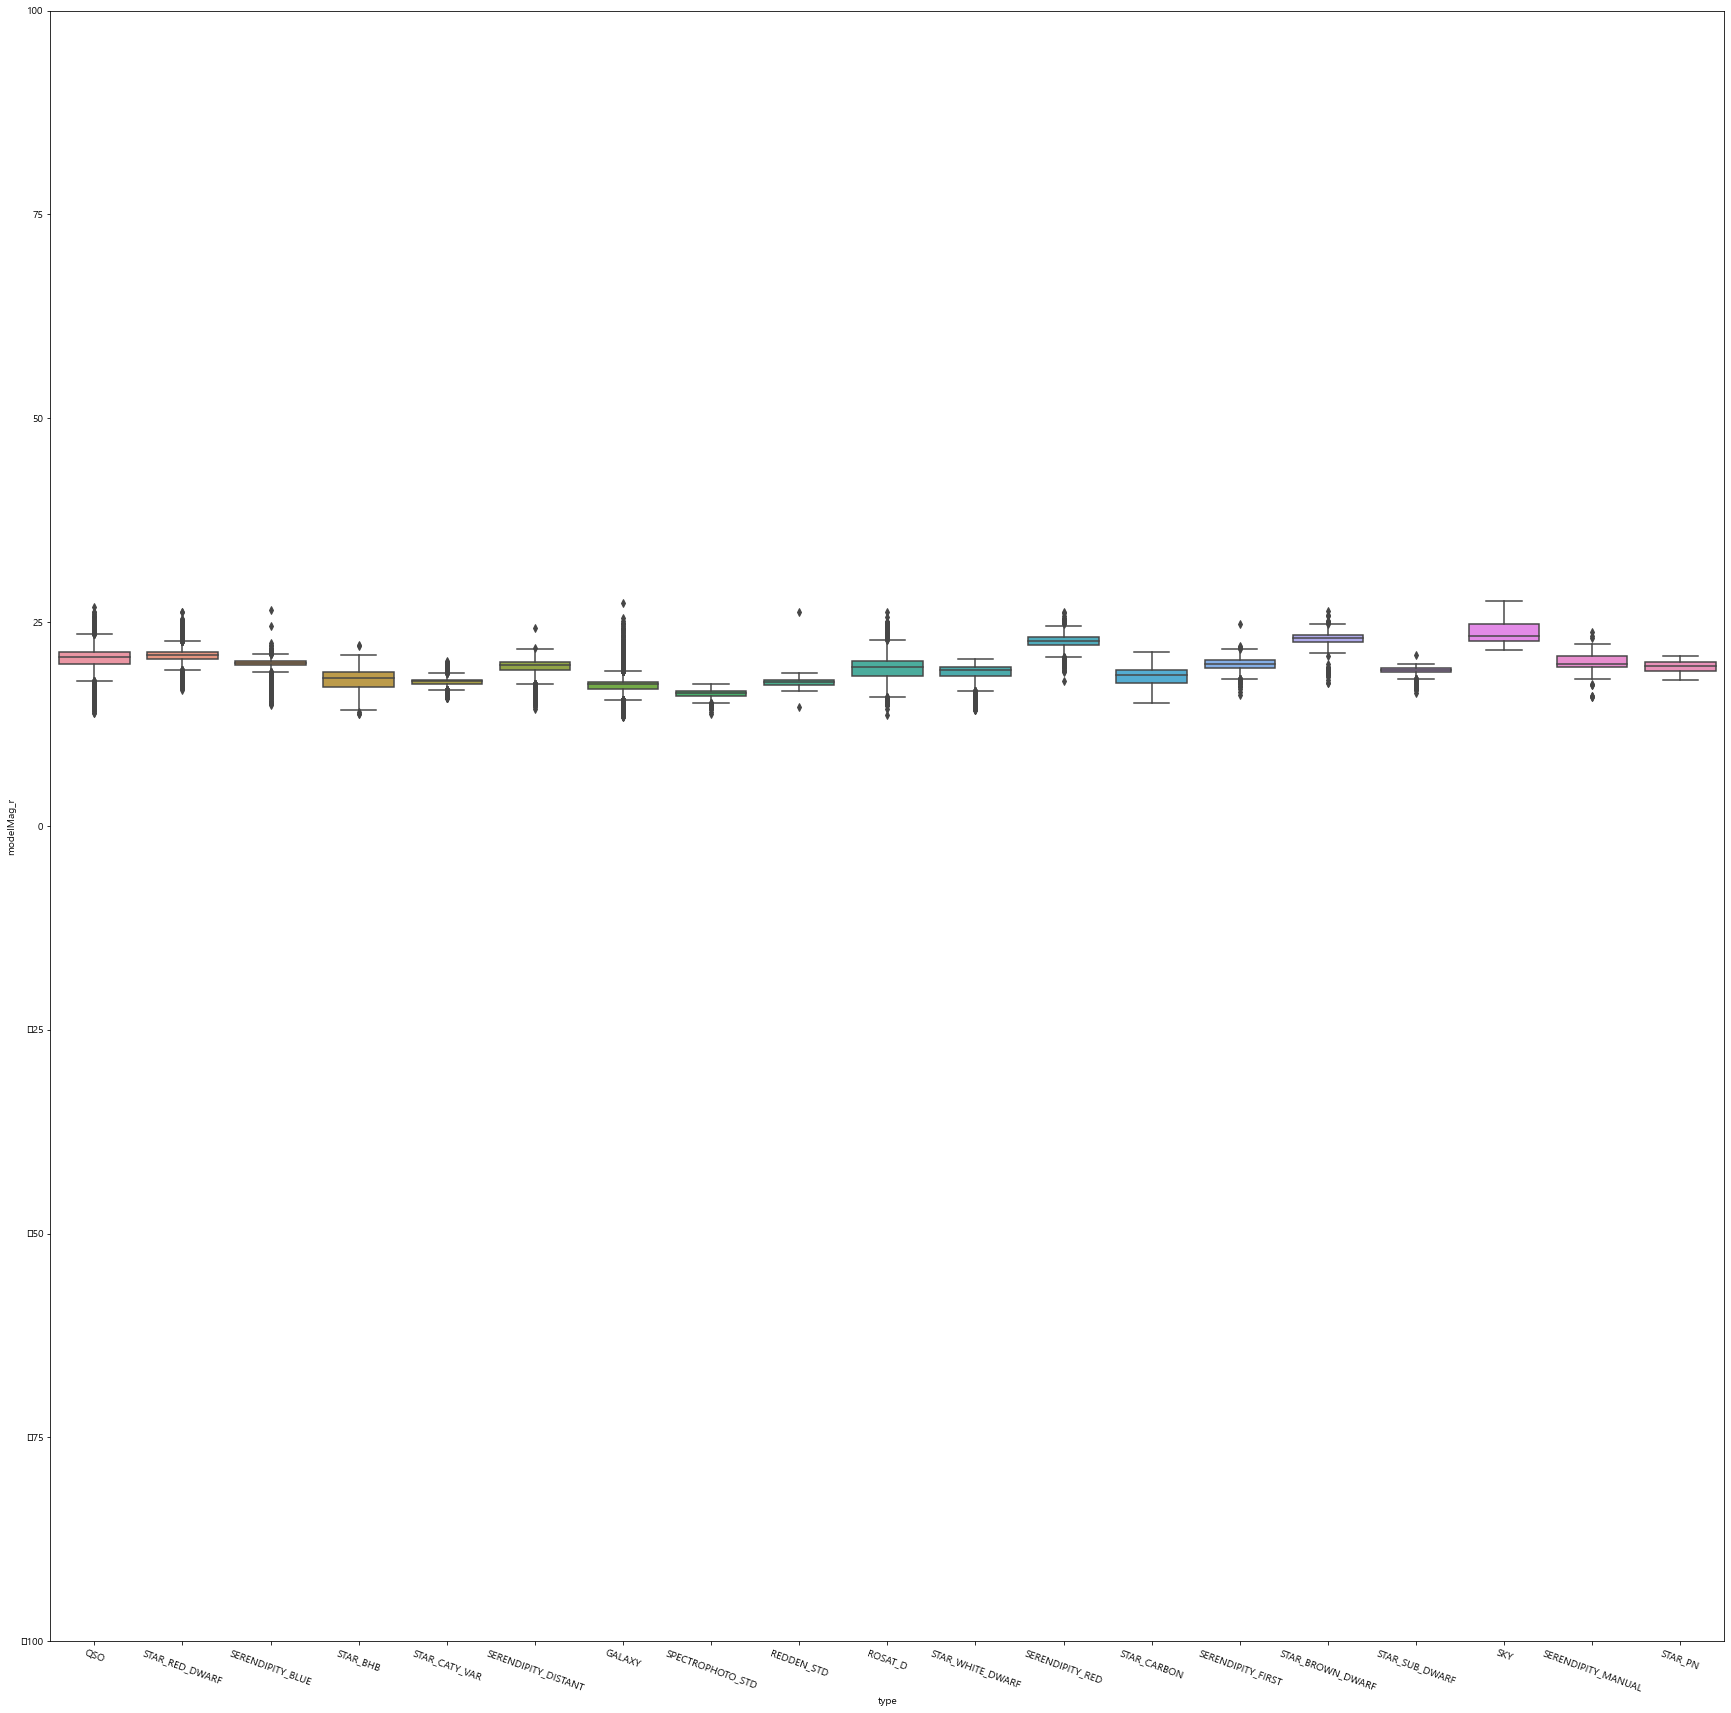

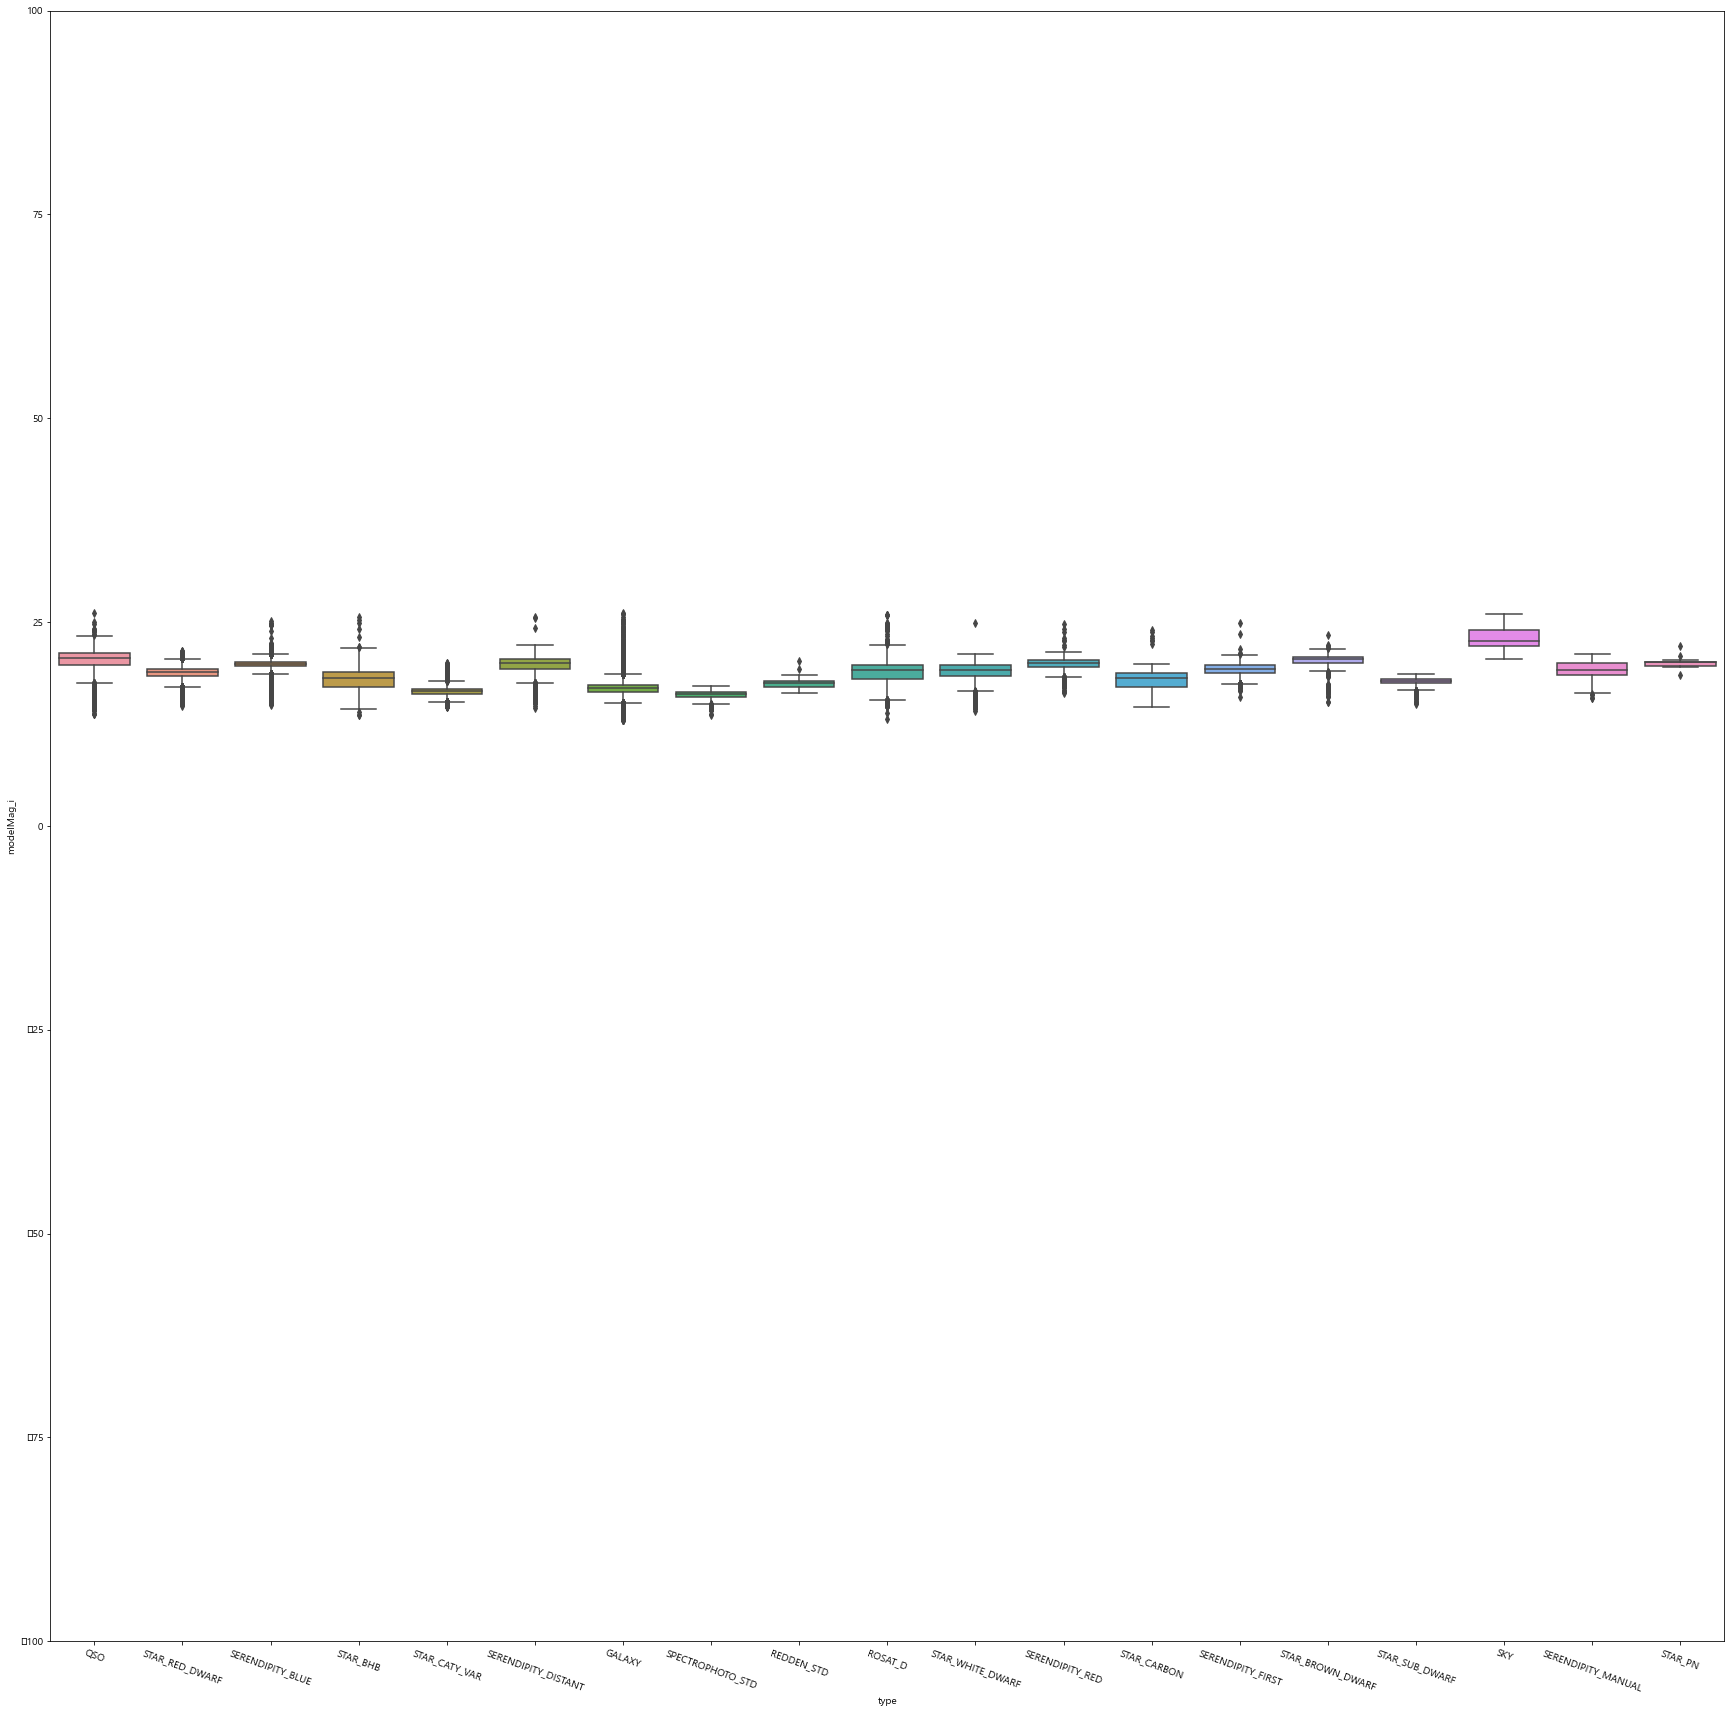

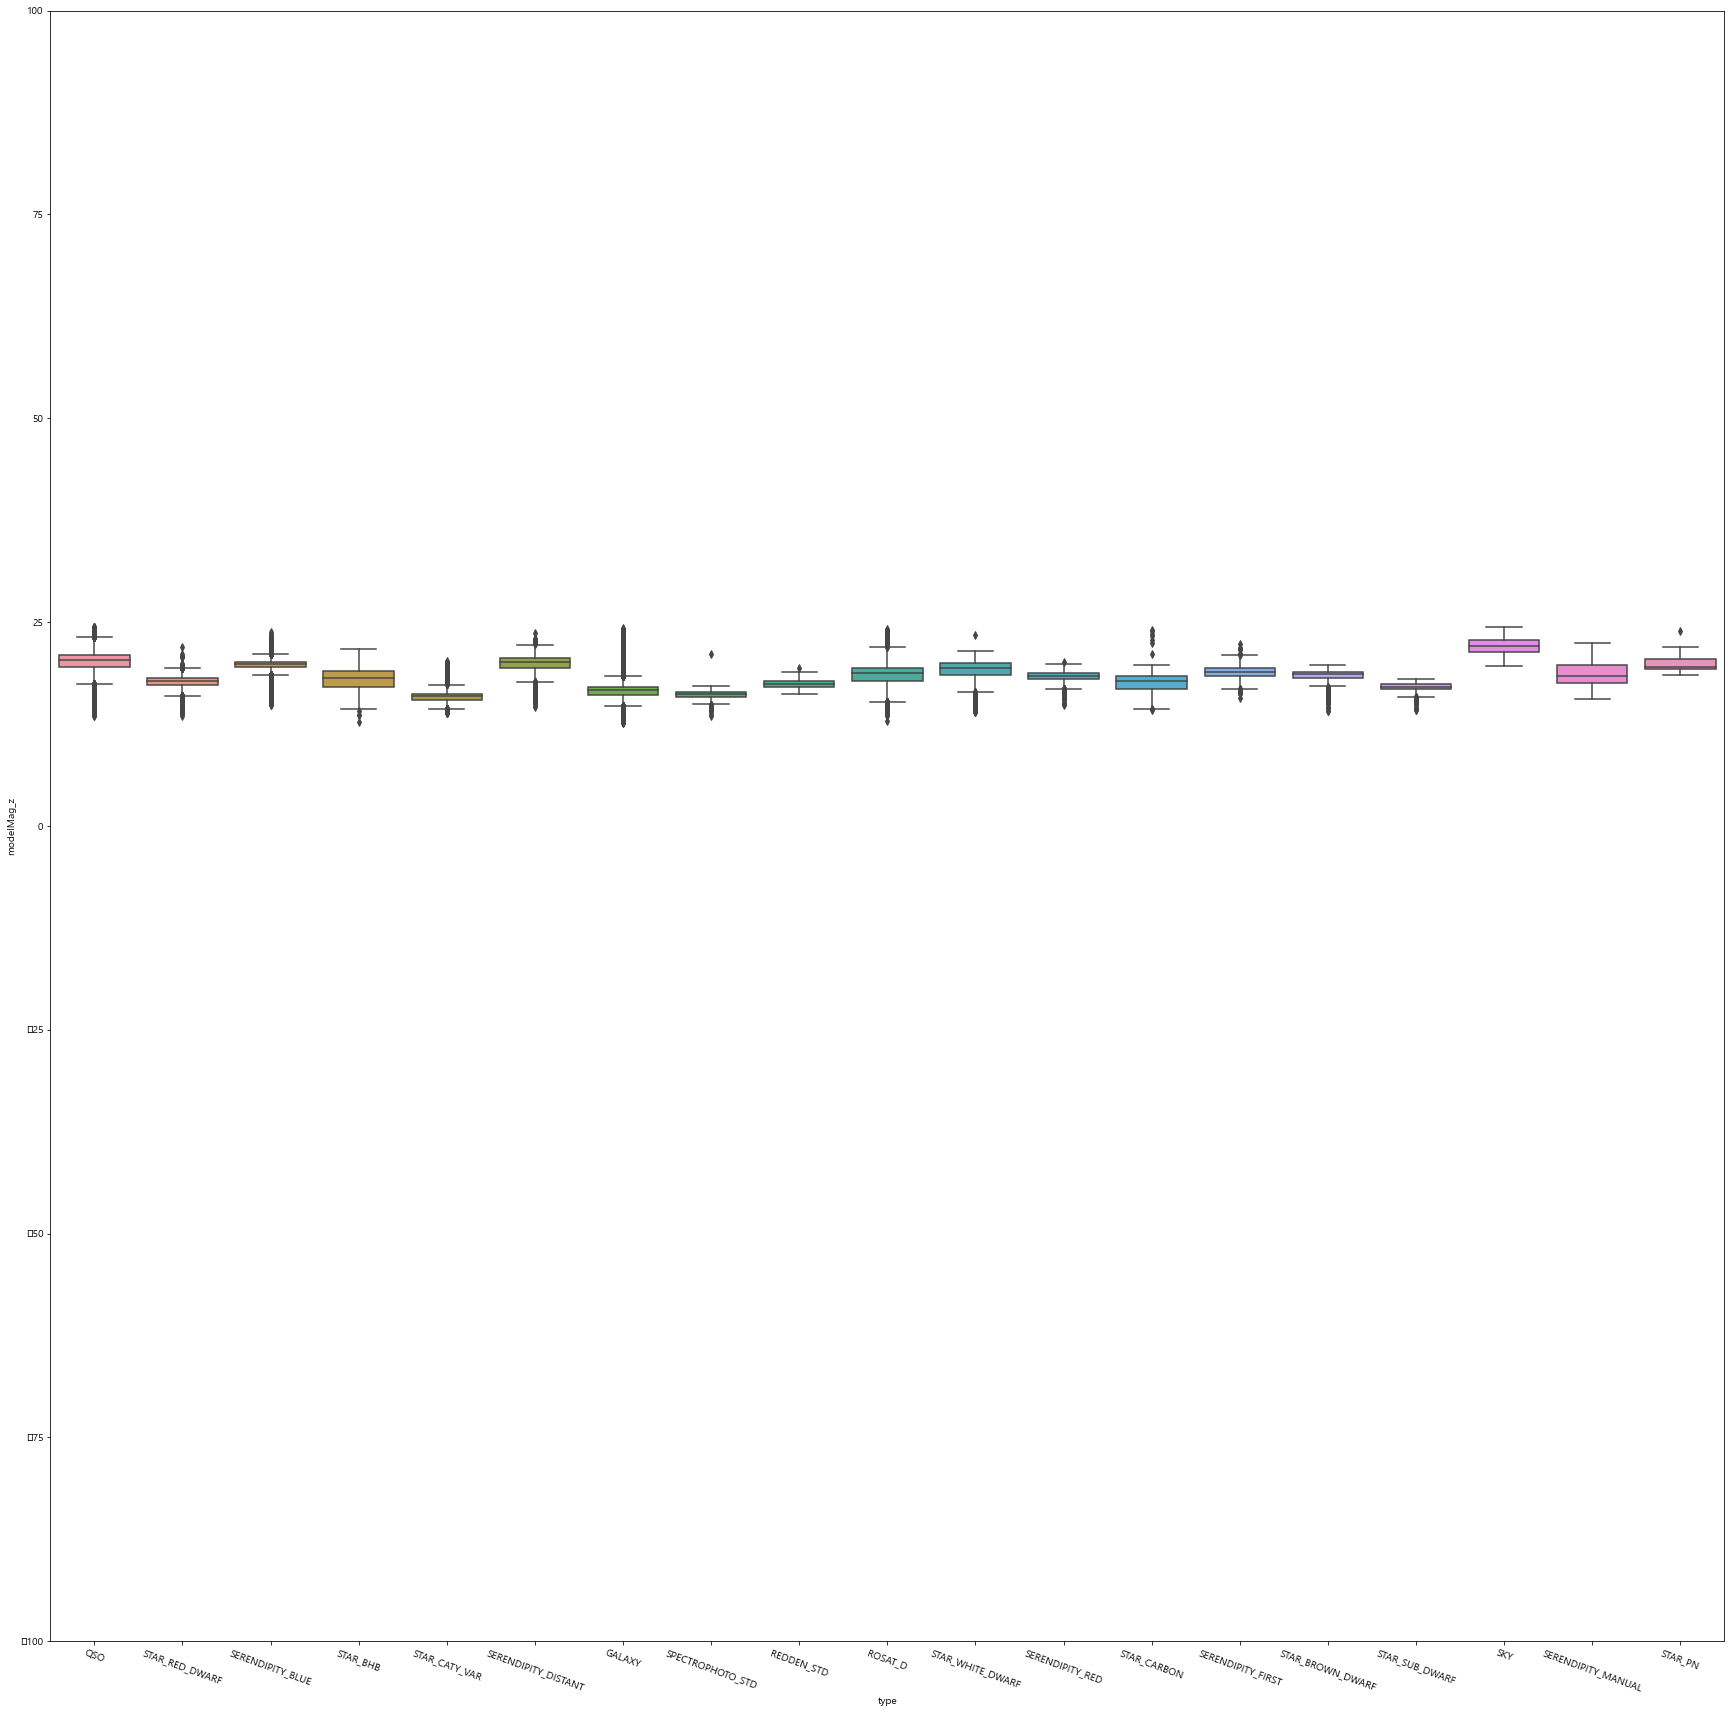

In [43]:
for col in modelMag_cols:
    plt.figure(figsize=(30, 30))
    plt.xticks(rotation=340)
    plt.ylim((-100, 100))
    sns.boxplot(data=train, x='type', y=col)

#### type 컬럼 시각화

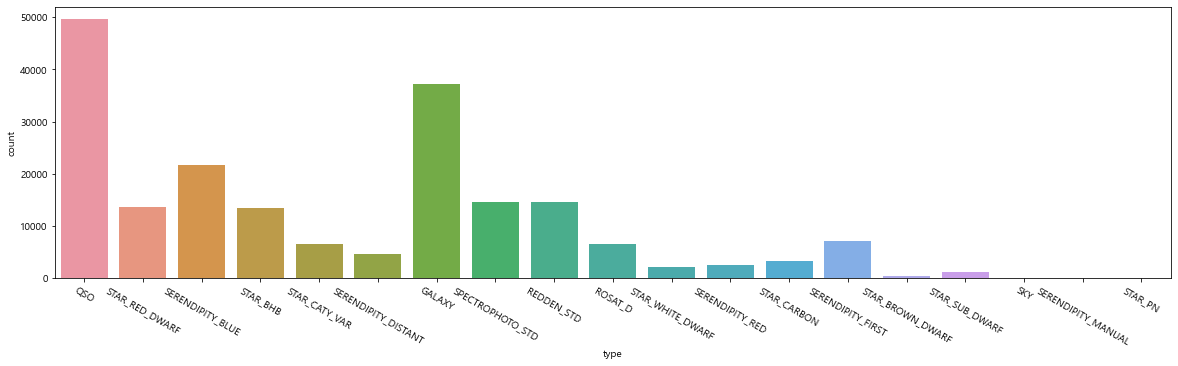

In [44]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=330)
sns.countplot(data=train, x='type')

특정 type의 개수가 매우 적어 분포가 불균형하므로 데이터를 학습할 때 stratified K 폴드를 활용하겠습니다.   

### 4. 상관계수 시각화

먼저 같은 특성을 나타내는 컬럼들끼리 상관계수를 구해서 시각화해보겠습니다.

Text(0.5, 1.0, "psfMag data's correlation")

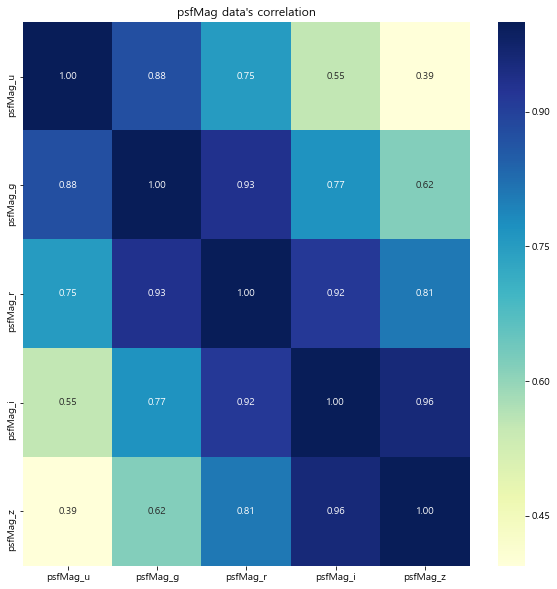

In [45]:
temp_df = train[psfMag_cols]

plt.figure(figsize=(10,10))
sns.heatmap(temp_df.corr(), fmt='.2f', annot=True, cmap='YlGnBu')
plt.title('psfMag data\'s correlation')

Text(0.5, 1.0, "fiberMag data's correlation")

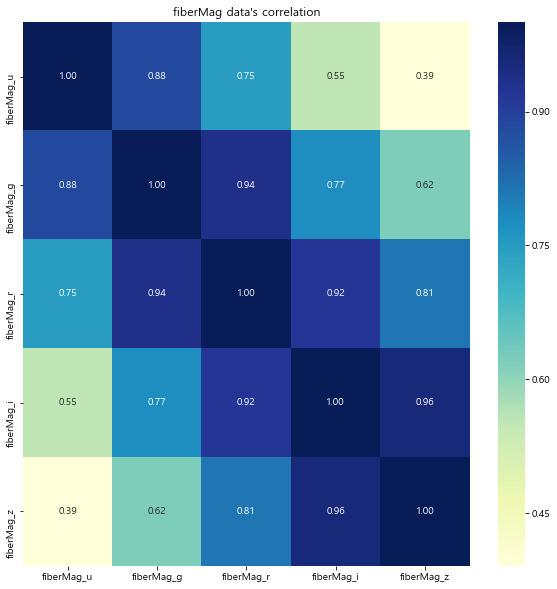

In [46]:
temp_df = train[fiberMag_cols]

plt.figure(figsize=(10,10))
sns.heatmap(temp_df.corr(), fmt='.2f', annot=True, cmap='YlGnBu')
plt.title('fiberMag data\'s correlation')

Text(0.5, 1.0, "petroMag data's correlation")

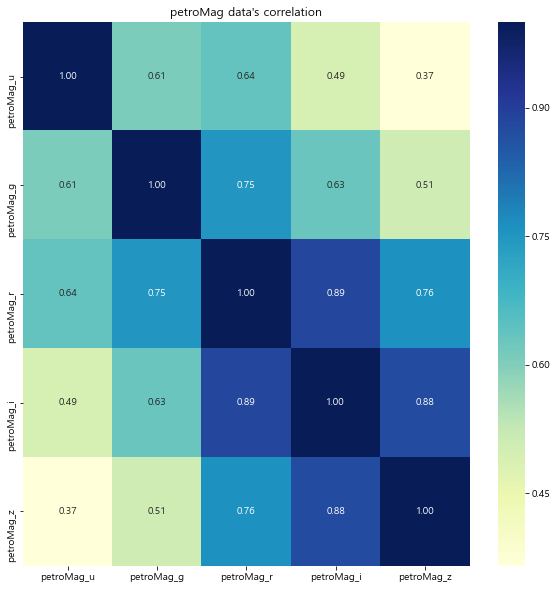

In [47]:
temp_df = train[petroMag_cols]

plt.figure(figsize=(10,10))
sns.heatmap(temp_df.corr(), fmt='.2f', annot=True, cmap='YlGnBu')
plt.title('petroMag data\'s correlation')

Text(0.5, 1.0, "modelMag data's correlation")

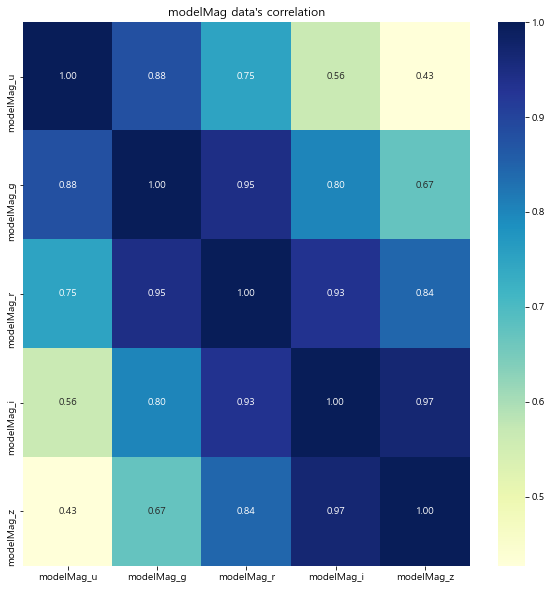

In [48]:
temp_df = train[modelMag_cols]

plt.figure(figsize=(10,10))
sns.heatmap(temp_df.corr(), fmt='.2f', annot=True, cmap='YlGnBu')
plt.title('modelMag data\'s correlation')

위의 상관계수 그래프를 통해 컬렁명 맨 뒤에 붙은 알파벳에 따라 서로 상관관계가 높은 컬럼이 달라짐을 알 수 있습니다.  
특히, _i와 _z가 붙은 컬럼들의 상관계수가 매우 높은데, 이 두 컬럼의 평균값을 저장한 컬럼을 새로 만들어서 학습용 피처의 개수를 줄일 수도 있을 것 같습니다.

In [51]:
prefix_col = ['psfMag', 'fiberMag', 'petroMag', 'modelMag']

for col in prefix_col:
    train[col + '_iz_mean'] = (train[col + '_i'] + train[col + '_z']) / 2
    test[col + '_iz_mean'] = (test[col + '_i'] + test[col + '_z']) / 2
    
train.head()

,id,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,is_over_640,psfMag_iz_mean,fiberMag_iz_mean,petroMag_iz_mean,modelMag_iz_mean
0,0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,21.387653,21.572827,22.504317,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,False,21.173999,21.480240,20.783927,21.083972
1,1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,20.937731,21.063646,21.360701,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,True,20.588324,21.000688,20.643236,20.602851
2,2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,17.095999,17.076449,17.867253,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,False,16.668214,17.086224,16.776108,16.674553
3,3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,20.073852,19.794505,20.433907,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,True,19.653555,19.934179,19.603017,19.655484
4,4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,19.861718,18.810375,25.859229,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,False,18.947029,19.336047,18.993076,18.931492


In [52]:
test.head()

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,is_over_640,psfMag_iz_mean,fiberMag_iz_mean,petroMag_iz_mean,modelMag_iz_mean
0,199991,251,23.817399,22.508963,20.981106,18.517316,17.076079,25.053890,23.167848,21.335901,18.835858,17.434384,22.246697,22.796239,21.195315,18.584486,17.154284,25.391534,22.499435,21.011918,18.499341,17.091474,False,17.796697,18.135121,17.869385,17.795408
1,199992,386,22.806983,21.937111,20.335770,20.000512,19.527369,22.498565,22.186000,20.618879,20.301204,20.030078,21.729831,21.837511,20.196128,19.967204,19.683671,22.475338,21.853442,20.173169,19.796757,19.567372,False,19.763940,20.165641,19.825437,19.682065
2,199993,232,21.024250,19.235669,18.304061,17.808608,17.380113,21.205546,19.439533,18.344433,17.909690,17.538164,20.722629,18.710223,17.611851,17.158519,16.843986,20.579314,18.653338,17.562108,17.120529,16.708748,False,17.594360,17.723927,17.001253,16.914639
3,199994,557,20.503424,20.286261,20.197204,20.162419,20.059832,20.976132,20.611498,20.567262,20.479318,20.277472,20.329269,20.385262,20.129157,20.206574,20.212342,20.479879,20.280943,20.150499,20.206221,20.092909,False,20.111125,20.378395,20.209458,20.149565
4,199995,75,24.244851,22.668237,21.239333,19.284777,18.235939,25.681860,22.935289,21.642456,19.624926,18.591749,22.308298,22.957496,21.285033,19.299120,18.307526,25.489360,22.857290,21.191862,19.237964,18.280368,False,18.760358,19.108337,18.803323,18.759166


다음으로 전체 train의 컬럼 간 상관계수를 보겠습니다.

Text(0.5, 1.0, "train's correlation")

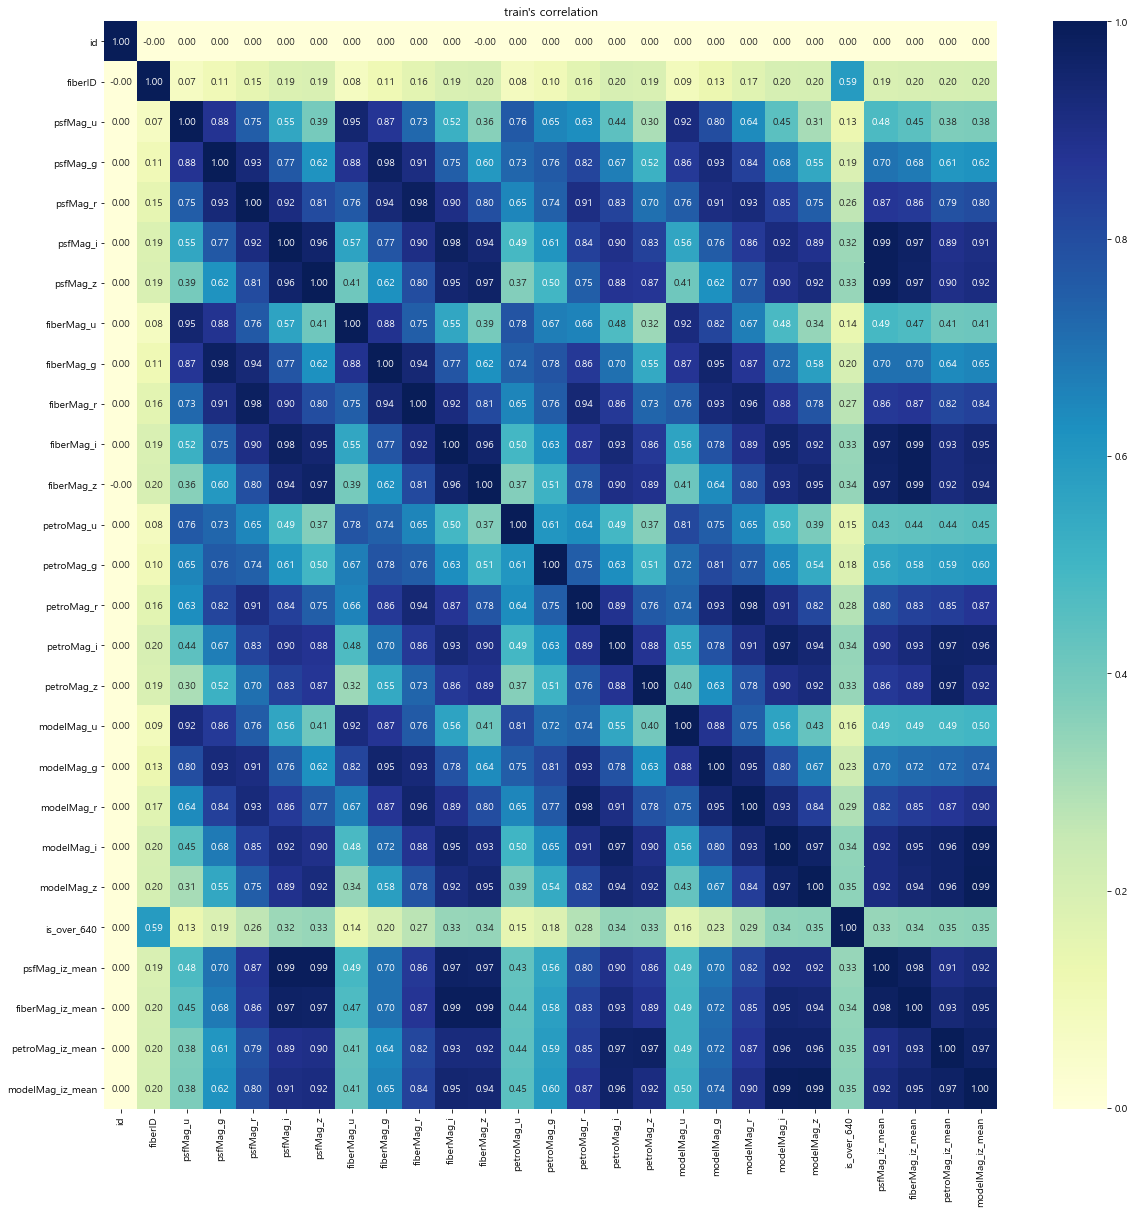

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), fmt='.2f', annot=True, cmap='YlGnBu')
plt.title('train\'s correlation')

컬럼명 맨 뒤에 붙은 알파벳(suffix)이 같은 컬럼들끼리 상관계수가 높은 것을 알 수 있습니다.
suffix가 동일한 컬럼들끼리의 평균을 저장한 컬럼을 생성해서 효과적인 학습을 할 수 있을 것 같습니다.
- **유의미한 score 향상이 없어서 제외(코드는 주석 처리)**

In [ ]:
'''
suffix_col = ['_u', '_g', '_r', '_i', '_z']
prefix_col = ['psfMag', 'fiberMag', 'petroMag', 'modelMag']

for suffix in suffix_col:
    train[suffix +'_mean'] = 0
    test[suffix +'_mean'] = 0
    for prefix in prefix_col:
        train[suffix +'_mean'] += train[prefix + suffix]
        test[suffix + '_mean'] += test[prefix + suffix]
    
    train[suffix +'_mean'] /= len(prefix_col)
    test[suffix+'_mean'] /= len(prefix_col)
'''

train 데이터의 type 컬럼을 sample_submission.csv의 컬럼 순서에 맞추기 위해 type_num 컬럼을 생성합니다.  
그리고 type_num 컬럼과 다른 컬럼 간의 상관계수를 살펴봅니다.

In [54]:
# sample_submission.csv 파일의 양식에 맞추기 위해 컬럼 순서를 맞춰줍니다
sample_df = pd.read_csv("./data/sample_submission.csv", index_col=0)
type_dict = {}
for i, column in enumerate(sample_df.columns):
    type_dict[column] = i

train['type_num'] = train['type'].map(type_dict)

train[['type', 'type_num']].head()

,type,type_num
0,QSO,8
1,QSO,8
2,QSO,8
3,QSO,8
4,STAR_RED_DWARF,10


Text(0.5, 1.0, "train's correlation")

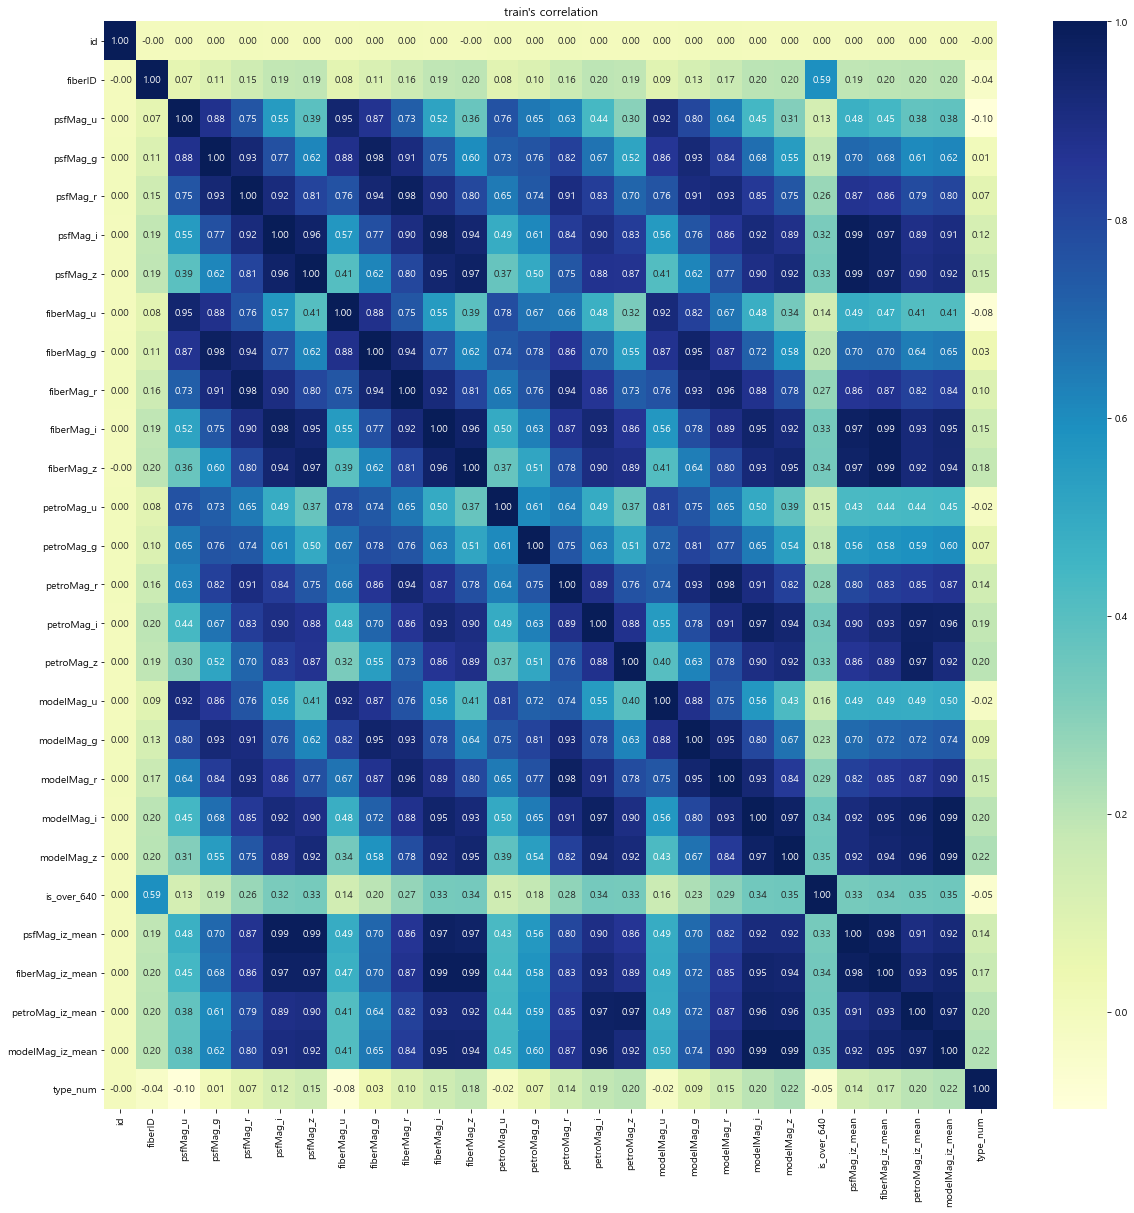

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), fmt='.2f', annot=True, cmap='YlGnBu')
plt.title('train\'s correlation')

In [60]:
# type_num 컬럼과의 상관계수들의 절댓값 비교
corr_series = train.corr()['type_num']
corr_series[corr_series < 0] = corr_series[corr_series < 0] * (-1)
corr_series.sort_values(ascending=False)

type_num       1.000000
modelMag_z     0.224684
modelMag_i     0.202166
petroMag_z     0.199902
petroMag_i     0.189439
fiberMag_z     0.183510
psfMag_z       0.154795
modelMag_r     0.154487
fiberMag_i     0.153964
petroMag_r     0.143275
psfMag_i       0.123576
fiberMag_r     0.101544
psfMag_u       0.097621
modelMag_g     0.088531
fiberMag_u     0.084112
psfMag_r       0.074135
petroMag_g     0.069056
is_over_640    0.054872
fiberID        0.035208
fiberMag_g     0.032256
modelMag_u     0.023410
petroMag_u     0.019573
psfMag_g       0.009527
id             0.001320
Name: type_num, dtype: float64

일부 컬럼들의 상관계수가 매우 낮은 것을 볼 수 있습니다.  
상관계수가 0.05 미만인 컬럼들을 피처에서 제외하는 것을 고려해봐야겠습니다.
- **유의미한 score 향상이 없어서 제외(코드는 주석 처리)**

In [63]:
#low_corr_col = list(corr_series[corr_series < 0.05].index)
#low_corr_col

['id', 'fiberID', 'psfMag_g', 'fiberMag_g', 'petroMag_u', 'modelMag_u']

# 학습 / 예측 

학습용 데이터를 저장합니다.

In [56]:
X_data = train.drop(['id', 'type', 'type_num'], axis=1) 
#X_data = train.drop(['type', 'type_num'], axis=1) 
#X_data = X_data[features]
#X_data = train.drop(drop_features, axis=1)
y_data = train['type_num']

In [57]:
X_data.columns

Index(['fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z',
       'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i', 'fiberMag_z',
       'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z',
       'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z',
       'is_over_640', 'psfMag_iz_mean', 'fiberMag_iz_mean', 'petroMag_iz_mean',
       'modelMag_iz_mean'],
      dtype='object')

### stratified k fold 이용해서 학습

In [58]:
import numpy as np
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate

# StratifiedKFold 이용
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import log_loss

# 트리의 갯수
n_estimators = 300

# 랜덤 서치 반복할 횟수
num_loop = 10

# early stopping 횟수
early_stopping_rounds = 30

# 하이퍼파라미터 탐색 결과를 리스트로 저장
hyperparameters_list = []

# stratified K fold
skfold = StratifiedKFold(n_splits=3)

# K fold를 위해 학습 데이터를 numpy형으로 변환
X_data_numpy = X_data.to_numpy()
y_data_numpy = y_data.to_numpy()

# 랜덤 서치를 반복
for loop in range(num_loop):
    #n_estimators = np.random.randint(68, 90)
    learning_rate = 10 ** np.random.uniform(low = -2, high = 1)
    num_leaves = np.random.randint(80, 380)
    max_bin = np.random.randint(105, 480)
    min_child_samples = np.random.randint(130, 400) 
    subsample = np.random.uniform(low = 0.4, high = 0.8)
    colsample_bytree = np.random.uniform(low = 0.3, high = 0.95)
    
    lc = LGBMClassifier(   n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 0)
    
    cv_log_loss = []
    
    # 모델 학습
    for train_index, test_index in skfold.split(X_data, y_data):
        X_train, X_test = X_data_numpy[train_index], X_data_numpy[test_index]
        y_train, y_test = y_data_numpy[train_index], y_data_numpy[test_index]
        lc.fit(X_train, y_train,
              eval_set = [(X_test, y_test)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds,
              eval_metric='logloss')
        
        cv_log_loss.append(lc.best_score_['valid_0']['multi_logloss'])
        
    
    #  하이퍼파라미터 결과를 리스트에 저장
    score = np.mean(cv_log_loss)
    
    hyperparameters_list.append({
        'loop': loop,
        'n_estimators': n_estimators, ###
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 0,
        'score': score,
    })

    
    print(f"{loop:2} Score = {score:.5f}")
    
hyperparameters_list = pd.DataFrame(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by = "score")

hyperparameters_list.head()

 0 Score = 1.20845
 1 Score = 0.52310
 2 Score = 1.66849
 3 Score = 0.37116
 4 Score = 0.59685
 5 Score = 1.49824
 6 Score = 1.83768
 7 Score = 0.99759
 8 Score = 2.50539
 9 Score = 0.37057


,loop,n_estimators,learning_rate,num_leaves,max_bin,min_child_samples,subsample,subsample_freq,colsample_bytree,class_type,random_state,score
9,9,300,0.062106,299,354,202,0.455821,1,0.571882,balanced,0,0.370573
3,3,300,0.079250,223,444,254,0.624435,1,0.730195,balanced,0,0.371155
1,1,300,0.146789,256,418,190,0.464253,1,0.575783,balanced,0,0.523102
4,4,300,0.207118,307,381,157,0.659534,1,0.943955,balanced,0,0.596848
7,7,300,0.359307,216,459,130,0.728517,1,0.715748,balanced,0,0.997587


In [59]:
best_hyperparameters = hyperparameters_list.iloc[0] 

best_hyperparameters

loop                        9
n_estimators              300
learning_rate        0.062106
num_leaves                299
max_bin                   354
min_child_samples         202
subsample            0.455821
subsample_freq              1
colsample_bytree     0.571882
class_type           balanced
random_state                0
score                0.370573
Name: 9, dtype: object

In [60]:
from lightgbm import LGBMClassifier

# 가장 좋은 하이퍼파러미터로 LGBMClassifier를 만듭니다.
final_lc = LGBMClassifier(#n_estimators = best_hyperparameters['n_estimators'],
                       n_estimators = 300,
                        learning_rate = best_hyperparameters['learning_rate'],
                       num_leaves = best_hyperparameters['num_leaves'],
                       max_bin = best_hyperparameters['max_bin'],
                       min_child_samples = best_hyperparameters['min_child_samples'],
                       subsample = best_hyperparameters['subsample'],
                       subsample_freq = best_hyperparameters['subsample_freq'],
                       colsample_bytree = best_hyperparameters['colsample_bytree'],
                       class_type = best_hyperparameters['class_type'],
                       random_state = best_hyperparameters['random_state'])

final_lc

LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
               colsample_bytree=0.5718824879561544, importance_type='split',
               learning_rate=0.062106026162250604, max_bin=354, max_depth=-1,
               min_child_samples=202, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=300, n_jobs=-1, num_leaves=299,
               objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.45582096719763177,
               subsample_for_bin=200000, subsample_freq=1)

In [61]:
# stratified 이용해서 가장 좋은 모델로 재학습
import numpy as np


from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

scores = []
early_stopping_rounds = 50

for i, (train_index, test_index) in enumerate(skfold.split(X_data, y_data)):
    X_train, X_test = X_data_numpy[train_index], X_data_numpy[test_index]
    y_train, y_test = y_data_numpy[train_index], y_data_numpy[test_index]
    final_lc.fit(X_train, y_train,
              eval_set = [(X_test, y_test)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds,
              eval_metric='logloss')
    best_iteration = final_lc.best_iteration_
    score = final_lc.best_score_['valid_0']['multi_logloss']
    scores.append(score)
    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    

 9 best iteration = 209 Score = 0.37208
 9 best iteration = 201 Score = 0.37112
 9 best iteration = 217 Score = 0.36851


In [62]:
# 제출 데이터로 쓰기 위한 예측

X_test = test.drop(['id'], axis=1)
#X_test = test
#X_test_numpy = X_test
submission_pred = final_lc.predict_proba(X_test)


# 제출 파일 생성

In [63]:
submission = pd.DataFrame(data=submission_pred, columns=sample_df.columns, index=sample_df.index)
submission.to_csv('./data/submission.csv', index=True)

### 결과
- **public score : 0.3785**